In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torchvision
from torch import nn
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# folder_dir = './cifar-10-batches-py/'
folder_dir = 'cifar-10-batches-py/'

### Load CIFAR Data

(50000, 3, 32, 32)


TypeError: Invalid shape (3, 32, 32) for image data

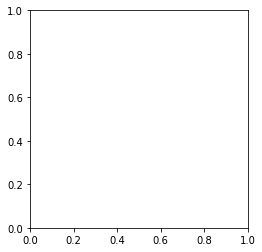

In [121]:
import numpy as np
folder_dir = 'cifar-10-batches-py/' 
# Python dictionary, 10-element list, gives names to the numeric labels in the labels array
metadata_dict = unpickle(folder_dir+"batches.meta") 
label_names = np.array([label.decode('ascii') for label in metadata_dict[b'label_names']])

cifar_train_data = None # x train
cifar_train_filenames = []
cifar_train_labels = [] # y train

# each file: 10000 IMAGES
#    DATA:
# 10000x3072 np array
# Each row of the np array stores a 32x32 colour image
# The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue
# first 32 entries of the array are the red channel values of the first row of the image
#    LABELS:
# list of 10000 numbers in the range 0-9
# index i indicates the label of the ith image in the array data

# TRAIN DATA
for i in range(1,6):
    cifar_train_data_dict = unpickle(folder_dir + "data_batch_" + str(i)) # contains labels and data
    if i == 1:
        cifar_train_data = cifar_train_data_dict[b'data']
    else:
        cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
    cifar_train_labels += cifar_train_data_dict[b'labels']

cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
print(cifar_train_data.shape)
# frog
plt.imshow(cifar_train_data[0])
plt.imshow(cifar_train_data[0].transpose(1,2,0))

# cifar_train_data_rolled = np.rollaxis(cifar_train_data, 1, 4) # only if plt.imshow()
# print(cifar_train_data_rolled.shape)
# plt.imshow(cifar_train_data_rolled[0])

# TEST DATA
cifar_test_data_dict = unpickle(folder_dir + "test_batch") # x test
cifar_test_data = cifar_test_data_dict[b'data']
cifar_test_filenames = cifar_test_data_dict[b'filenames'] # file name of each jpeg image
cifar_test_labels = cifar_test_data_dict[b'labels'] # y test

cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
# cifar_test_data_rolled = np.rollaxis(cifar_test_data, 1, 4) # only if plt.imshow()

print("Train", cifar_train_data.shape)
print("Test",cifar_test_data.shape)

In [ ]:
# NOTES ON DATA
# <1 x label><3072 x pixel>
# ...
# <1 x label><3072 x pixel>

# In other words, the first byte is the label of the first image, which is a number in the range 0-9. 
# The next 3072 bytes are the values of the pixels of the image. 
# The first 1024 bytes are the red channel values, the next 1024 the green, and the final 1024 the blue. 
# The values are stored in row-major order, so the first 32 bytes are the red channel values of the first row of the image.


rescaling from [0,255] to [-1,1]

In [23]:
# tensor is like numpy array for torch
# 255/2 = 127.5 , range is 0-2, -1 results in shifting range from -1 to 1
X_train = torch.Tensor(cifar_train_data/127.5-1).float()
X_test = torch.Tensor(cifar_test_data/127.5-1).float()
y_train = torch.Tensor(cifar_train_labels).type(torch.LongTensor) # longTensor is a long integer
y_test = torch.Tensor(cifar_test_labels).type(torch.LongTensor)
print("Before scalled",cifar_train_data[0][0])
print()
print("After scalled", X_train[0][0])
print()
print()
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)
print("y_train.shape", y_train.shape)

Before scalled [[ 59  43  50 ... 158 152 148]
 [ 16   0  18 ... 123 119 122]
 [ 25  16  49 ... 118 120 109]
 ...
 [208 201 198 ... 160  56  53]
 [180 173 186 ... 184  97  83]
 [177 168 179 ... 216 151 123]]
After scalled tensor([[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
        [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
        [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
        ...,
        [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
        [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
        [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]])

X_train.shape torch.Size([50000, 3, 32, 32])
X_test.shape torch.Size([10000, 3, 32, 32])
y_test.shape torch.Size([10000])
y_train.shape torch.Size([50000])


### Data Augmentation

In [85]:
tran = torchvision.transforms.RandomRotation(50,expand=False)
transformed = tran(X_train)

In [117]:
print(transformed.shape)
print(X_train.shape)
# print(transformed[0].shape)
# arr = np.array(transformed)
# print(arr.shape)
# print(arr[0].shape)
# roll = np.rollaxis(arr, 1, 4)
# print(roll[0].shape)
# plt.imshow(roll[0])

stackedx = np.vstack((X_train,transformed))
stackedx = torch.Tensor(stackedx)
print(stackedx.shape)

stackedy = np.tile(y_train,2)
stackedy = torch.Tensor(stackedy).type(torch.LongTensor)
print(stackedy.shape)

torch.Size([50000, 3, 32, 32])
torch.Size([50000, 3, 32, 32])
torch.Size([100000, 3, 32, 32])
torch.Size([100000])


### Creating CNN Class

In [118]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # picking values we see fit
        filter_size=5
        padding=filter_size//2 # floor integer division (if filter is an odd number its always -1 then /2)
        num_filter=4 # were passing 4, 5x5 filters on each image
        stride=1
        maxpool_size=2 # 2x2
        maxpool_stride=1

        # shape is 3x32x32
        # in_channels to begin with is 3
        # out_channels num of filters: the number of stacks coming out
        self.model = torch.nn.Sequential(
            # layer 1
            torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=filter_size, stride=stride, padding=padding ),
            # activation
            torch.nn.ReLU(),
            # layer 2
            torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=filter_size, stride=stride, padding=padding),
            # activation
            torch.nn.ReLU(),

            # layer 3, pool to regularize
            torch.nn.MaxPool2d(kernel_size=maxpool_size, stride=maxpool_stride),
           
#             # layer 4
#             torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=filter_size, stride=stride, padding=padding),
#             # activation
#             torch.nn.ReLU(),
            # layer 5
#             torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=filter_size, stride=stride, padding=padding),
#             # activation
#             torch.nn.ReLU(),
            
#             # layer 6
#             torch.nn.MaxPool2d(kernel_size=maxpool_size, stride=maxpool_stride),
            
#             # layer 7
#             torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=filter_size, stride=stride, padding=padding),
#             # activation
#             torch.nn.ReLU(),
#             # layer 7
#             torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=filter_size, stride=stride, padding=padding),
#             # activation
#             torch.nn.ReLU(),
#             # layer 8
#             torch.nn.MaxPool2d(kernel_size=maxpool_size, stride=maxpool_stride),

#             torch.nn.Flatten(),
#             torch.nn.Linear(in_features=256*29*29, out_features=10) # we have 3 max pools so 32-1-1-1 = 29
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=16*31*31, out_features=10) # we have 3 max pools so 32-1-1-1 = 29
        )


    def train(self, X_train, y_train, num_epoch=1, batch_size=100, learning_rate=0.01):
        loss = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=learning_rate, momentum=0.9)
        
        for epoch in range(num_epoch):
            epoch_loss = 0.0
            
            for i in range(0, len(X_train), batch_size):
                X = X_train[i:i+batch_size]  
                y = y_train[i:i+batch_size]   
                
                y_pred = self.model(X)
                
                l = loss(y_pred, y) # applies softmax and computes NLL
                
                self.model.zero_grad()
                l.backward()
                optimizer.step()

                # accumulate the loss and print 
                epoch_loss += l.item()
                # if i % batch_size == batch_size-1:
                if i % 5*batch_size == 0:
                    print('[epoch=%d, %5d batches] loss: %.3f' % (epoch + 1, i + 1, epoch_loss / batch_size))
                    epoch_loss = 0.0

        print('Training done')

    def test(self, X_test, y_test):
        num_total = 0
        num_correct = 0
    
        # testing entire batch
        y_pred = self.model(X_test)
        _, indices = torch.max(y_pred.data, 1)
        num_total += y_test.size(0)
        num_correct += (indices == y_test).sum().item()

            
        print('Test accuracy on entire batch: %.2f %%' % (100 * (num_correct / num_total)))


Instantiate the CNN model

In [119]:
cnn = CNN()

Train the cnn model

In [120]:
# cnn.train(X_train, y_train, num_epoch=25, batch_size=50, learning_rate=0.0005)
cnn.train(stackedx, stackedy, num_epoch=25, batch_size=50, learning_rate=0.0005)

[epoch=1,     1 batches] loss: 0.046
[epoch=1,    51 batches] loss: 0.046
[epoch=1,   101 batches] loss: 0.046
[epoch=1,   151 batches] loss: 0.046
[epoch=1,   201 batches] loss: 0.046
[epoch=1,   251 batches] loss: 0.046
[epoch=1,   301 batches] loss: 0.046
[epoch=1,   351 batches] loss: 0.046
[epoch=1,   401 batches] loss: 0.046
[epoch=1,   451 batches] loss: 0.046
[epoch=1,   501 batches] loss: 0.046
[epoch=1,   551 batches] loss: 0.045
[epoch=1,   601 batches] loss: 0.046
[epoch=1,   651 batches] loss: 0.046
[epoch=1,   701 batches] loss: 0.046
[epoch=1,   751 batches] loss: 0.046
[epoch=1,   801 batches] loss: 0.046
[epoch=1,   851 batches] loss: 0.045
[epoch=1,   901 batches] loss: 0.046
[epoch=1,   951 batches] loss: 0.046
[epoch=1,  1001 batches] loss: 0.046
[epoch=1,  1051 batches] loss: 0.046
[epoch=1,  1101 batches] loss: 0.045
[epoch=1,  1151 batches] loss: 0.046
[epoch=1,  1201 batches] loss: 0.045
[epoch=1,  1251 batches] loss: 0.045
[epoch=1,  1301 batches] loss: 0.046
[

[epoch=1, 11101 batches] loss: 0.039
[epoch=1, 11151 batches] loss: 0.038
[epoch=1, 11201 batches] loss: 0.037
[epoch=1, 11251 batches] loss: 0.038
[epoch=1, 11301 batches] loss: 0.039
[epoch=1, 11351 batches] loss: 0.039
[epoch=1, 11401 batches] loss: 0.040
[epoch=1, 11451 batches] loss: 0.039
[epoch=1, 11501 batches] loss: 0.038
[epoch=1, 11551 batches] loss: 0.036
[epoch=1, 11601 batches] loss: 0.038
[epoch=1, 11651 batches] loss: 0.037
[epoch=1, 11701 batches] loss: 0.035
[epoch=1, 11751 batches] loss: 0.040
[epoch=1, 11801 batches] loss: 0.041
[epoch=1, 11851 batches] loss: 0.041
[epoch=1, 11901 batches] loss: 0.037
[epoch=1, 11951 batches] loss: 0.040
[epoch=1, 12001 batches] loss: 0.036
[epoch=1, 12051 batches] loss: 0.041
[epoch=1, 12101 batches] loss: 0.039
[epoch=1, 12151 batches] loss: 0.034
[epoch=1, 12201 batches] loss: 0.037
[epoch=1, 12251 batches] loss: 0.040
[epoch=1, 12301 batches] loss: 0.037
[epoch=1, 12351 batches] loss: 0.035
[epoch=1, 12401 batches] loss: 0.038
[

[epoch=1, 22301 batches] loss: 0.032
[epoch=1, 22351 batches] loss: 0.034
[epoch=1, 22401 batches] loss: 0.035
[epoch=1, 22451 batches] loss: 0.035
[epoch=1, 22501 batches] loss: 0.033
[epoch=1, 22551 batches] loss: 0.033
[epoch=1, 22601 batches] loss: 0.038
[epoch=1, 22651 batches] loss: 0.029
[epoch=1, 22701 batches] loss: 0.038
[epoch=1, 22751 batches] loss: 0.034
[epoch=1, 22801 batches] loss: 0.035
[epoch=1, 22851 batches] loss: 0.036
[epoch=1, 22901 batches] loss: 0.034
[epoch=1, 22951 batches] loss: 0.038
[epoch=1, 23001 batches] loss: 0.035
[epoch=1, 23051 batches] loss: 0.035
[epoch=1, 23101 batches] loss: 0.033
[epoch=1, 23151 batches] loss: 0.033
[epoch=1, 23201 batches] loss: 0.037
[epoch=1, 23251 batches] loss: 0.032
[epoch=1, 23301 batches] loss: 0.029
[epoch=1, 23351 batches] loss: 0.030
[epoch=1, 23401 batches] loss: 0.032
[epoch=1, 23451 batches] loss: 0.037
[epoch=1, 23501 batches] loss: 0.037
[epoch=1, 23551 batches] loss: 0.030
[epoch=1, 23601 batches] loss: 0.030
[

[epoch=1, 33551 batches] loss: 0.035
[epoch=1, 33601 batches] loss: 0.038
[epoch=1, 33651 batches] loss: 0.037
[epoch=1, 33701 batches] loss: 0.036
[epoch=1, 33751 batches] loss: 0.030
[epoch=1, 33801 batches] loss: 0.033
[epoch=1, 33851 batches] loss: 0.033
[epoch=1, 33901 batches] loss: 0.035
[epoch=1, 33951 batches] loss: 0.034
[epoch=1, 34001 batches] loss: 0.036
[epoch=1, 34051 batches] loss: 0.034
[epoch=1, 34101 batches] loss: 0.030
[epoch=1, 34151 batches] loss: 0.029
[epoch=1, 34201 batches] loss: 0.033
[epoch=1, 34251 batches] loss: 0.029
[epoch=1, 34301 batches] loss: 0.032
[epoch=1, 34351 batches] loss: 0.035
[epoch=1, 34401 batches] loss: 0.032
[epoch=1, 34451 batches] loss: 0.035
[epoch=1, 34501 batches] loss: 0.030
[epoch=1, 34551 batches] loss: 0.034
[epoch=1, 34601 batches] loss: 0.031
[epoch=1, 34651 batches] loss: 0.032
[epoch=1, 34701 batches] loss: 0.033
[epoch=1, 34751 batches] loss: 0.033
[epoch=1, 34801 batches] loss: 0.030
[epoch=1, 34851 batches] loss: 0.035
[

[epoch=1, 44801 batches] loss: 0.033
[epoch=1, 44851 batches] loss: 0.030
[epoch=1, 44901 batches] loss: 0.036
[epoch=1, 44951 batches] loss: 0.031
[epoch=1, 45001 batches] loss: 0.025
[epoch=1, 45051 batches] loss: 0.027
[epoch=1, 45101 batches] loss: 0.038
[epoch=1, 45151 batches] loss: 0.030
[epoch=1, 45201 batches] loss: 0.034
[epoch=1, 45251 batches] loss: 0.033
[epoch=1, 45301 batches] loss: 0.028
[epoch=1, 45351 batches] loss: 0.033
[epoch=1, 45401 batches] loss: 0.028
[epoch=1, 45451 batches] loss: 0.034
[epoch=1, 45501 batches] loss: 0.029
[epoch=1, 45551 batches] loss: 0.029
[epoch=1, 45601 batches] loss: 0.030
[epoch=1, 45651 batches] loss: 0.031
[epoch=1, 45701 batches] loss: 0.031
[epoch=1, 45751 batches] loss: 0.035
[epoch=1, 45801 batches] loss: 0.028
[epoch=1, 45851 batches] loss: 0.032
[epoch=1, 45901 batches] loss: 0.032
[epoch=1, 45951 batches] loss: 0.036
[epoch=1, 46001 batches] loss: 0.028
[epoch=1, 46051 batches] loss: 0.030
[epoch=1, 46101 batches] loss: 0.028
[

[epoch=1, 55951 batches] loss: 0.031
[epoch=1, 56001 batches] loss: 0.030
[epoch=1, 56051 batches] loss: 0.031
[epoch=1, 56101 batches] loss: 0.032
[epoch=1, 56151 batches] loss: 0.028
[epoch=1, 56201 batches] loss: 0.031
[epoch=1, 56251 batches] loss: 0.034
[epoch=1, 56301 batches] loss: 0.027
[epoch=1, 56351 batches] loss: 0.032
[epoch=1, 56401 batches] loss: 0.031
[epoch=1, 56451 batches] loss: 0.031
[epoch=1, 56501 batches] loss: 0.028
[epoch=1, 56551 batches] loss: 0.032
[epoch=1, 56601 batches] loss: 0.034
[epoch=1, 56651 batches] loss: 0.030
[epoch=1, 56701 batches] loss: 0.032
[epoch=1, 56751 batches] loss: 0.028
[epoch=1, 56801 batches] loss: 0.031
[epoch=1, 56851 batches] loss: 0.034
[epoch=1, 56901 batches] loss: 0.033
[epoch=1, 56951 batches] loss: 0.030
[epoch=1, 57001 batches] loss: 0.028
[epoch=1, 57051 batches] loss: 0.036
[epoch=1, 57101 batches] loss: 0.031
[epoch=1, 57151 batches] loss: 0.032
[epoch=1, 57201 batches] loss: 0.031
[epoch=1, 57251 batches] loss: 0.028
[

[epoch=1, 67051 batches] loss: 0.031
[epoch=1, 67101 batches] loss: 0.032
[epoch=1, 67151 batches] loss: 0.030
[epoch=1, 67201 batches] loss: 0.029
[epoch=1, 67251 batches] loss: 0.037
[epoch=1, 67301 batches] loss: 0.030
[epoch=1, 67351 batches] loss: 0.032
[epoch=1, 67401 batches] loss: 0.033
[epoch=1, 67451 batches] loss: 0.029
[epoch=1, 67501 batches] loss: 0.028
[epoch=1, 67551 batches] loss: 0.031
[epoch=1, 67601 batches] loss: 0.031
[epoch=1, 67651 batches] loss: 0.034
[epoch=1, 67701 batches] loss: 0.031
[epoch=1, 67751 batches] loss: 0.033
[epoch=1, 67801 batches] loss: 0.030
[epoch=1, 67851 batches] loss: 0.026
[epoch=1, 67901 batches] loss: 0.030
[epoch=1, 67951 batches] loss: 0.028
[epoch=1, 68001 batches] loss: 0.029
[epoch=1, 68051 batches] loss: 0.029
[epoch=1, 68101 batches] loss: 0.029
[epoch=1, 68151 batches] loss: 0.035
[epoch=1, 68201 batches] loss: 0.026
[epoch=1, 68251 batches] loss: 0.031
[epoch=1, 68301 batches] loss: 0.034
[epoch=1, 68351 batches] loss: 0.029
[

[epoch=1, 78151 batches] loss: 0.037
[epoch=1, 78201 batches] loss: 0.030
[epoch=1, 78251 batches] loss: 0.030
[epoch=1, 78301 batches] loss: 0.032
[epoch=1, 78351 batches] loss: 0.026
[epoch=1, 78401 batches] loss: 0.031
[epoch=1, 78451 batches] loss: 0.030
[epoch=1, 78501 batches] loss: 0.032
[epoch=1, 78551 batches] loss: 0.033
[epoch=1, 78601 batches] loss: 0.030
[epoch=1, 78651 batches] loss: 0.026
[epoch=1, 78701 batches] loss: 0.030
[epoch=1, 78751 batches] loss: 0.031
[epoch=1, 78801 batches] loss: 0.027
[epoch=1, 78851 batches] loss: 0.028
[epoch=1, 78901 batches] loss: 0.026
[epoch=1, 78951 batches] loss: 0.026
[epoch=1, 79001 batches] loss: 0.031
[epoch=1, 79051 batches] loss: 0.031
[epoch=1, 79101 batches] loss: 0.033
[epoch=1, 79151 batches] loss: 0.032
[epoch=1, 79201 batches] loss: 0.029
[epoch=1, 79251 batches] loss: 0.027
[epoch=1, 79301 batches] loss: 0.027
[epoch=1, 79351 batches] loss: 0.030
[epoch=1, 79401 batches] loss: 0.029
[epoch=1, 79451 batches] loss: 0.029
[

[epoch=1, 89451 batches] loss: 0.031
[epoch=1, 89501 batches] loss: 0.027
[epoch=1, 89551 batches] loss: 0.030
[epoch=1, 89601 batches] loss: 0.031
[epoch=1, 89651 batches] loss: 0.036
[epoch=1, 89701 batches] loss: 0.029
[epoch=1, 89751 batches] loss: 0.032
[epoch=1, 89801 batches] loss: 0.025
[epoch=1, 89851 batches] loss: 0.034
[epoch=1, 89901 batches] loss: 0.029
[epoch=1, 89951 batches] loss: 0.026
[epoch=1, 90001 batches] loss: 0.026
[epoch=1, 90051 batches] loss: 0.022
[epoch=1, 90101 batches] loss: 0.031
[epoch=1, 90151 batches] loss: 0.030
[epoch=1, 90201 batches] loss: 0.036
[epoch=1, 90251 batches] loss: 0.026
[epoch=1, 90301 batches] loss: 0.026
[epoch=1, 90351 batches] loss: 0.038
[epoch=1, 90401 batches] loss: 0.036
[epoch=1, 90451 batches] loss: 0.030
[epoch=1, 90501 batches] loss: 0.025
[epoch=1, 90551 batches] loss: 0.025
[epoch=1, 90601 batches] loss: 0.031
[epoch=1, 90651 batches] loss: 0.026
[epoch=1, 90701 batches] loss: 0.030
[epoch=1, 90751 batches] loss: 0.034
[

[epoch=2,   701 batches] loss: 0.038
[epoch=2,   751 batches] loss: 0.028
[epoch=2,   801 batches] loss: 0.030
[epoch=2,   851 batches] loss: 0.034
[epoch=2,   901 batches] loss: 0.026
[epoch=2,   951 batches] loss: 0.029
[epoch=2,  1001 batches] loss: 0.029
[epoch=2,  1051 batches] loss: 0.030
[epoch=2,  1101 batches] loss: 0.027
[epoch=2,  1151 batches] loss: 0.030
[epoch=2,  1201 batches] loss: 0.026
[epoch=2,  1251 batches] loss: 0.031
[epoch=2,  1301 batches] loss: 0.033
[epoch=2,  1351 batches] loss: 0.025
[epoch=2,  1401 batches] loss: 0.030
[epoch=2,  1451 batches] loss: 0.033
[epoch=2,  1501 batches] loss: 0.031
[epoch=2,  1551 batches] loss: 0.027
[epoch=2,  1601 batches] loss: 0.026
[epoch=2,  1651 batches] loss: 0.033
[epoch=2,  1701 batches] loss: 0.029
[epoch=2,  1751 batches] loss: 0.032
[epoch=2,  1801 batches] loss: 0.026
[epoch=2,  1851 batches] loss: 0.027
[epoch=2,  1901 batches] loss: 0.035
[epoch=2,  1951 batches] loss: 0.034
[epoch=2,  2001 batches] loss: 0.036
[

[epoch=2, 11951 batches] loss: 0.034
[epoch=2, 12001 batches] loss: 0.024
[epoch=2, 12051 batches] loss: 0.032
[epoch=2, 12101 batches] loss: 0.030
[epoch=2, 12151 batches] loss: 0.025
[epoch=2, 12201 batches] loss: 0.031
[epoch=2, 12251 batches] loss: 0.033
[epoch=2, 12301 batches] loss: 0.031
[epoch=2, 12351 batches] loss: 0.026
[epoch=2, 12401 batches] loss: 0.028
[epoch=2, 12451 batches] loss: 0.028
[epoch=2, 12501 batches] loss: 0.032
[epoch=2, 12551 batches] loss: 0.029
[epoch=2, 12601 batches] loss: 0.030
[epoch=2, 12651 batches] loss: 0.033
[epoch=2, 12701 batches] loss: 0.029
[epoch=2, 12751 batches] loss: 0.030
[epoch=2, 12801 batches] loss: 0.023
[epoch=2, 12851 batches] loss: 0.030
[epoch=2, 12901 batches] loss: 0.029
[epoch=2, 12951 batches] loss: 0.031
[epoch=2, 13001 batches] loss: 0.032
[epoch=2, 13051 batches] loss: 0.028
[epoch=2, 13101 batches] loss: 0.028
[epoch=2, 13151 batches] loss: 0.033
[epoch=2, 13201 batches] loss: 0.025
[epoch=2, 13251 batches] loss: 0.029
[

[epoch=2, 23201 batches] loss: 0.029
[epoch=2, 23251 batches] loss: 0.025
[epoch=2, 23301 batches] loss: 0.022
[epoch=2, 23351 batches] loss: 0.024
[epoch=2, 23401 batches] loss: 0.024
[epoch=2, 23451 batches] loss: 0.031
[epoch=2, 23501 batches] loss: 0.029
[epoch=2, 23551 batches] loss: 0.025
[epoch=2, 23601 batches] loss: 0.025
[epoch=2, 23651 batches] loss: 0.023
[epoch=2, 23701 batches] loss: 0.020
[epoch=2, 23751 batches] loss: 0.031
[epoch=2, 23801 batches] loss: 0.027
[epoch=2, 23851 batches] loss: 0.024
[epoch=2, 23901 batches] loss: 0.029
[epoch=2, 23951 batches] loss: 0.031
[epoch=2, 24001 batches] loss: 0.025
[epoch=2, 24051 batches] loss: 0.026
[epoch=2, 24101 batches] loss: 0.023
[epoch=2, 24151 batches] loss: 0.027
[epoch=2, 24201 batches] loss: 0.024
[epoch=2, 24251 batches] loss: 0.031
[epoch=2, 24301 batches] loss: 0.021
[epoch=2, 24351 batches] loss: 0.030
[epoch=2, 24401 batches] loss: 0.023
[epoch=2, 24451 batches] loss: 0.027
[epoch=2, 24501 batches] loss: 0.025
[

[epoch=2, 34401 batches] loss: 0.029
[epoch=2, 34451 batches] loss: 0.028
[epoch=2, 34501 batches] loss: 0.024
[epoch=2, 34551 batches] loss: 0.029
[epoch=2, 34601 batches] loss: 0.023
[epoch=2, 34651 batches] loss: 0.027
[epoch=2, 34701 batches] loss: 0.028
[epoch=2, 34751 batches] loss: 0.029
[epoch=2, 34801 batches] loss: 0.024
[epoch=2, 34851 batches] loss: 0.030
[epoch=2, 34901 batches] loss: 0.024
[epoch=2, 34951 batches] loss: 0.032
[epoch=2, 35001 batches] loss: 0.025
[epoch=2, 35051 batches] loss: 0.028
[epoch=2, 35101 batches] loss: 0.030
[epoch=2, 35151 batches] loss: 0.031
[epoch=2, 35201 batches] loss: 0.027
[epoch=2, 35251 batches] loss: 0.028
[epoch=2, 35301 batches] loss: 0.033
[epoch=2, 35351 batches] loss: 0.024
[epoch=2, 35401 batches] loss: 0.030
[epoch=2, 35451 batches] loss: 0.024
[epoch=2, 35501 batches] loss: 0.026
[epoch=2, 35551 batches] loss: 0.022
[epoch=2, 35601 batches] loss: 0.032
[epoch=2, 35651 batches] loss: 0.027
[epoch=2, 35701 batches] loss: 0.029
[

[epoch=2, 45601 batches] loss: 0.026
[epoch=2, 45651 batches] loss: 0.026
[epoch=2, 45701 batches] loss: 0.028
[epoch=2, 45751 batches] loss: 0.029
[epoch=2, 45801 batches] loss: 0.022
[epoch=2, 45851 batches] loss: 0.026
[epoch=2, 45901 batches] loss: 0.027
[epoch=2, 45951 batches] loss: 0.029
[epoch=2, 46001 batches] loss: 0.022
[epoch=2, 46051 batches] loss: 0.027
[epoch=2, 46101 batches] loss: 0.024
[epoch=2, 46151 batches] loss: 0.024
[epoch=2, 46201 batches] loss: 0.025
[epoch=2, 46251 batches] loss: 0.027
[epoch=2, 46301 batches] loss: 0.029
[epoch=2, 46351 batches] loss: 0.027
[epoch=2, 46401 batches] loss: 0.024
[epoch=2, 46451 batches] loss: 0.029
[epoch=2, 46501 batches] loss: 0.031
[epoch=2, 46551 batches] loss: 0.029
[epoch=2, 46601 batches] loss: 0.026
[epoch=2, 46651 batches] loss: 0.026
[epoch=2, 46701 batches] loss: 0.025
[epoch=2, 46751 batches] loss: 0.022
[epoch=2, 46801 batches] loss: 0.025
[epoch=2, 46851 batches] loss: 0.024
[epoch=2, 46901 batches] loss: 0.029
[

[epoch=2, 56851 batches] loss: 0.030
[epoch=2, 56901 batches] loss: 0.028
[epoch=2, 56951 batches] loss: 0.026
[epoch=2, 57001 batches] loss: 0.026
[epoch=2, 57051 batches] loss: 0.032
[epoch=2, 57101 batches] loss: 0.029
[epoch=2, 57151 batches] loss: 0.027
[epoch=2, 57201 batches] loss: 0.026
[epoch=2, 57251 batches] loss: 0.026
[epoch=2, 57301 batches] loss: 0.021
[epoch=2, 57351 batches] loss: 0.032
[epoch=2, 57401 batches] loss: 0.024
[epoch=2, 57451 batches] loss: 0.030
[epoch=2, 57501 batches] loss: 0.029
[epoch=2, 57551 batches] loss: 0.032
[epoch=2, 57601 batches] loss: 0.030
[epoch=2, 57651 batches] loss: 0.030
[epoch=2, 57701 batches] loss: 0.032
[epoch=2, 57751 batches] loss: 0.026
[epoch=2, 57801 batches] loss: 0.032
[epoch=2, 57851 batches] loss: 0.028
[epoch=2, 57901 batches] loss: 0.025
[epoch=2, 57951 batches] loss: 0.031
[epoch=2, 58001 batches] loss: 0.030
[epoch=2, 58051 batches] loss: 0.029
[epoch=2, 58101 batches] loss: 0.024
[epoch=2, 58151 batches] loss: 0.029
[

[epoch=2, 68101 batches] loss: 0.026
[epoch=2, 68151 batches] loss: 0.034
[epoch=2, 68201 batches] loss: 0.022
[epoch=2, 68251 batches] loss: 0.027
[epoch=2, 68301 batches] loss: 0.030
[epoch=2, 68351 batches] loss: 0.026
[epoch=2, 68401 batches] loss: 0.025
[epoch=2, 68451 batches] loss: 0.033
[epoch=2, 68501 batches] loss: 0.027
[epoch=2, 68551 batches] loss: 0.031
[epoch=2, 68601 batches] loss: 0.019
[epoch=2, 68651 batches] loss: 0.031
[epoch=2, 68701 batches] loss: 0.025
[epoch=2, 68751 batches] loss: 0.028
[epoch=2, 68801 batches] loss: 0.021
[epoch=2, 68851 batches] loss: 0.027
[epoch=2, 68901 batches] loss: 0.026
[epoch=2, 68951 batches] loss: 0.027
[epoch=2, 69001 batches] loss: 0.027
[epoch=2, 69051 batches] loss: 0.029
[epoch=2, 69101 batches] loss: 0.025
[epoch=2, 69151 batches] loss: 0.028
[epoch=2, 69201 batches] loss: 0.029
[epoch=2, 69251 batches] loss: 0.027
[epoch=2, 69301 batches] loss: 0.029
[epoch=2, 69351 batches] loss: 0.025
[epoch=2, 69401 batches] loss: 0.023
[

[epoch=2, 79351 batches] loss: 0.026
[epoch=2, 79401 batches] loss: 0.024
[epoch=2, 79451 batches] loss: 0.024
[epoch=2, 79501 batches] loss: 0.026
[epoch=2, 79551 batches] loss: 0.024
[epoch=2, 79601 batches] loss: 0.031
[epoch=2, 79651 batches] loss: 0.026
[epoch=2, 79701 batches] loss: 0.032
[epoch=2, 79751 batches] loss: 0.021
[epoch=2, 79801 batches] loss: 0.023
[epoch=2, 79851 batches] loss: 0.030
[epoch=2, 79901 batches] loss: 0.023
[epoch=2, 79951 batches] loss: 0.023
[epoch=2, 80001 batches] loss: 0.026
[epoch=2, 80051 batches] loss: 0.027
[epoch=2, 80101 batches] loss: 0.027
[epoch=2, 80151 batches] loss: 0.026
[epoch=2, 80201 batches] loss: 0.025
[epoch=2, 80251 batches] loss: 0.027
[epoch=2, 80301 batches] loss: 0.028
[epoch=2, 80351 batches] loss: 0.020
[epoch=2, 80401 batches] loss: 0.030
[epoch=2, 80451 batches] loss: 0.024
[epoch=2, 80501 batches] loss: 0.027
[epoch=2, 80551 batches] loss: 0.026
[epoch=2, 80601 batches] loss: 0.031
[epoch=2, 80651 batches] loss: 0.026
[

[epoch=2, 90601 batches] loss: 0.028
[epoch=2, 90651 batches] loss: 0.022
[epoch=2, 90701 batches] loss: 0.026
[epoch=2, 90751 batches] loss: 0.028
[epoch=2, 90801 batches] loss: 0.025
[epoch=2, 90851 batches] loss: 0.026
[epoch=2, 90901 batches] loss: 0.033
[epoch=2, 90951 batches] loss: 0.031
[epoch=2, 91001 batches] loss: 0.026
[epoch=2, 91051 batches] loss: 0.029
[epoch=2, 91101 batches] loss: 0.031
[epoch=2, 91151 batches] loss: 0.026
[epoch=2, 91201 batches] loss: 0.023
[epoch=2, 91251 batches] loss: 0.029
[epoch=2, 91301 batches] loss: 0.029
[epoch=2, 91351 batches] loss: 0.023
[epoch=2, 91401 batches] loss: 0.026
[epoch=2, 91451 batches] loss: 0.028
[epoch=2, 91501 batches] loss: 0.027
[epoch=2, 91551 batches] loss: 0.031
[epoch=2, 91601 batches] loss: 0.027
[epoch=2, 91651 batches] loss: 0.022
[epoch=2, 91701 batches] loss: 0.025
[epoch=2, 91751 batches] loss: 0.025
[epoch=2, 91801 batches] loss: 0.025
[epoch=2, 91851 batches] loss: 0.025
[epoch=2, 91901 batches] loss: 0.026
[

[epoch=3,  1851 batches] loss: 0.022
[epoch=3,  1901 batches] loss: 0.032
[epoch=3,  1951 batches] loss: 0.033
[epoch=3,  2001 batches] loss: 0.034
[epoch=3,  2051 batches] loss: 0.029
[epoch=3,  2101 batches] loss: 0.024
[epoch=3,  2151 batches] loss: 0.023
[epoch=3,  2201 batches] loss: 0.028
[epoch=3,  2251 batches] loss: 0.026
[epoch=3,  2301 batches] loss: 0.026
[epoch=3,  2351 batches] loss: 0.024
[epoch=3,  2401 batches] loss: 0.027
[epoch=3,  2451 batches] loss: 0.021
[epoch=3,  2501 batches] loss: 0.029
[epoch=3,  2551 batches] loss: 0.026
[epoch=3,  2601 batches] loss: 0.027
[epoch=3,  2651 batches] loss: 0.025
[epoch=3,  2701 batches] loss: 0.026
[epoch=3,  2751 batches] loss: 0.031
[epoch=3,  2801 batches] loss: 0.026
[epoch=3,  2851 batches] loss: 0.024
[epoch=3,  2901 batches] loss: 0.027
[epoch=3,  2951 batches] loss: 0.028
[epoch=3,  3001 batches] loss: 0.031
[epoch=3,  3051 batches] loss: 0.026
[epoch=3,  3101 batches] loss: 0.032
[epoch=3,  3151 batches] loss: 0.029
[

[epoch=3, 13051 batches] loss: 0.028
[epoch=3, 13101 batches] loss: 0.024
[epoch=3, 13151 batches] loss: 0.030
[epoch=3, 13201 batches] loss: 0.022
[epoch=3, 13251 batches] loss: 0.028
[epoch=3, 13301 batches] loss: 0.029
[epoch=3, 13351 batches] loss: 0.026
[epoch=3, 13401 batches] loss: 0.029
[epoch=3, 13451 batches] loss: 0.024
[epoch=3, 13501 batches] loss: 0.024
[epoch=3, 13551 batches] loss: 0.021
[epoch=3, 13601 batches] loss: 0.025
[epoch=3, 13651 batches] loss: 0.026
[epoch=3, 13701 batches] loss: 0.028
[epoch=3, 13751 batches] loss: 0.027
[epoch=3, 13801 batches] loss: 0.026
[epoch=3, 13851 batches] loss: 0.022
[epoch=3, 13901 batches] loss: 0.025
[epoch=3, 13951 batches] loss: 0.022
[epoch=3, 14001 batches] loss: 0.024
[epoch=3, 14051 batches] loss: 0.026
[epoch=3, 14101 batches] loss: 0.027
[epoch=3, 14151 batches] loss: 0.026
[epoch=3, 14201 batches] loss: 0.023
[epoch=3, 14251 batches] loss: 0.027
[epoch=3, 14301 batches] loss: 0.031
[epoch=3, 14351 batches] loss: 0.027
[

[epoch=3, 24301 batches] loss: 0.019
[epoch=3, 24351 batches] loss: 0.028
[epoch=3, 24401 batches] loss: 0.021
[epoch=3, 24451 batches] loss: 0.025
[epoch=3, 24501 batches] loss: 0.023
[epoch=3, 24551 batches] loss: 0.024
[epoch=3, 24601 batches] loss: 0.020
[epoch=3, 24651 batches] loss: 0.025
[epoch=3, 24701 batches] loss: 0.027
[epoch=3, 24751 batches] loss: 0.024
[epoch=3, 24801 batches] loss: 0.029
[epoch=3, 24851 batches] loss: 0.028
[epoch=3, 24901 batches] loss: 0.020
[epoch=3, 24951 batches] loss: 0.023
[epoch=3, 25001 batches] loss: 0.021
[epoch=3, 25051 batches] loss: 0.024
[epoch=3, 25101 batches] loss: 0.026
[epoch=3, 25151 batches] loss: 0.026
[epoch=3, 25201 batches] loss: 0.028
[epoch=3, 25251 batches] loss: 0.025
[epoch=3, 25301 batches] loss: 0.024
[epoch=3, 25351 batches] loss: 0.024
[epoch=3, 25401 batches] loss: 0.030
[epoch=3, 25451 batches] loss: 0.025
[epoch=3, 25501 batches] loss: 0.022
[epoch=3, 25551 batches] loss: 0.019
[epoch=3, 25601 batches] loss: 0.022
[

[epoch=3, 35551 batches] loss: 0.020
[epoch=3, 35601 batches] loss: 0.028
[epoch=3, 35651 batches] loss: 0.024
[epoch=3, 35701 batches] loss: 0.028
[epoch=3, 35751 batches] loss: 0.026
[epoch=3, 35801 batches] loss: 0.025
[epoch=3, 35851 batches] loss: 0.025
[epoch=3, 35901 batches] loss: 0.027
[epoch=3, 35951 batches] loss: 0.028
[epoch=3, 36001 batches] loss: 0.025
[epoch=3, 36051 batches] loss: 0.022
[epoch=3, 36101 batches] loss: 0.025
[epoch=3, 36151 batches] loss: 0.029
[epoch=3, 36201 batches] loss: 0.026
[epoch=3, 36251 batches] loss: 0.023
[epoch=3, 36301 batches] loss: 0.026
[epoch=3, 36351 batches] loss: 0.019
[epoch=3, 36401 batches] loss: 0.027
[epoch=3, 36451 batches] loss: 0.020
[epoch=3, 36501 batches] loss: 0.026
[epoch=3, 36551 batches] loss: 0.022
[epoch=3, 36601 batches] loss: 0.024
[epoch=3, 36651 batches] loss: 0.025
[epoch=3, 36701 batches] loss: 0.023
[epoch=3, 36751 batches] loss: 0.024
[epoch=3, 36801 batches] loss: 0.023
[epoch=3, 36851 batches] loss: 0.026
[

[epoch=3, 46801 batches] loss: 0.024
[epoch=3, 46851 batches] loss: 0.023
[epoch=3, 46901 batches] loss: 0.028
[epoch=3, 46951 batches] loss: 0.021
[epoch=3, 47001 batches] loss: 0.022
[epoch=3, 47051 batches] loss: 0.030
[epoch=3, 47101 batches] loss: 0.020
[epoch=3, 47151 batches] loss: 0.021
[epoch=3, 47201 batches] loss: 0.026
[epoch=3, 47251 batches] loss: 0.023
[epoch=3, 47301 batches] loss: 0.024
[epoch=3, 47351 batches] loss: 0.023
[epoch=3, 47401 batches] loss: 0.022
[epoch=3, 47451 batches] loss: 0.031
[epoch=3, 47501 batches] loss: 0.028
[epoch=3, 47551 batches] loss: 0.018
[epoch=3, 47601 batches] loss: 0.018
[epoch=3, 47651 batches] loss: 0.022
[epoch=3, 47701 batches] loss: 0.023
[epoch=3, 47751 batches] loss: 0.023
[epoch=3, 47801 batches] loss: 0.027
[epoch=3, 47851 batches] loss: 0.028
[epoch=3, 47901 batches] loss: 0.026
[epoch=3, 47951 batches] loss: 0.023
[epoch=3, 48001 batches] loss: 0.034
[epoch=3, 48051 batches] loss: 0.029
[epoch=3, 48101 batches] loss: 0.022
[

[epoch=3, 58051 batches] loss: 0.026
[epoch=3, 58101 batches] loss: 0.022
[epoch=3, 58151 batches] loss: 0.026
[epoch=3, 58201 batches] loss: 0.028
[epoch=3, 58251 batches] loss: 0.026
[epoch=3, 58301 batches] loss: 0.024
[epoch=3, 58351 batches] loss: 0.026
[epoch=3, 58401 batches] loss: 0.023
[epoch=3, 58451 batches] loss: 0.033
[epoch=3, 58501 batches] loss: 0.026
[epoch=3, 58551 batches] loss: 0.027
[epoch=3, 58601 batches] loss: 0.028
[epoch=3, 58651 batches] loss: 0.023
[epoch=3, 58701 batches] loss: 0.026
[epoch=3, 58751 batches] loss: 0.029
[epoch=3, 58801 batches] loss: 0.028
[epoch=3, 58851 batches] loss: 0.023
[epoch=3, 58901 batches] loss: 0.029
[epoch=3, 58951 batches] loss: 0.031
[epoch=3, 59001 batches] loss: 0.029
[epoch=3, 59051 batches] loss: 0.026
[epoch=3, 59101 batches] loss: 0.024
[epoch=3, 59151 batches] loss: 0.026
[epoch=3, 59201 batches] loss: 0.027
[epoch=3, 59251 batches] loss: 0.020
[epoch=3, 59301 batches] loss: 0.027
[epoch=3, 59351 batches] loss: 0.022
[

[epoch=3, 69301 batches] loss: 0.026
[epoch=3, 69351 batches] loss: 0.022
[epoch=3, 69401 batches] loss: 0.021
[epoch=3, 69451 batches] loss: 0.025
[epoch=3, 69501 batches] loss: 0.025
[epoch=3, 69551 batches] loss: 0.026
[epoch=3, 69601 batches] loss: 0.026
[epoch=3, 69651 batches] loss: 0.031
[epoch=3, 69701 batches] loss: 0.032
[epoch=3, 69751 batches] loss: 0.025
[epoch=3, 69801 batches] loss: 0.026
[epoch=3, 69851 batches] loss: 0.023
[epoch=3, 69901 batches] loss: 0.028
[epoch=3, 69951 batches] loss: 0.024
[epoch=3, 70001 batches] loss: 0.029
[epoch=3, 70051 batches] loss: 0.022
[epoch=3, 70101 batches] loss: 0.026
[epoch=3, 70151 batches] loss: 0.020
[epoch=3, 70201 batches] loss: 0.025
[epoch=3, 70251 batches] loss: 0.031
[epoch=3, 70301 batches] loss: 0.029
[epoch=3, 70351 batches] loss: 0.019
[epoch=3, 70401 batches] loss: 0.024
[epoch=3, 70451 batches] loss: 0.027
[epoch=3, 70501 batches] loss: 0.029
[epoch=3, 70551 batches] loss: 0.028
[epoch=3, 70601 batches] loss: 0.025
[

[epoch=3, 80501 batches] loss: 0.024
[epoch=3, 80551 batches] loss: 0.023
[epoch=3, 80601 batches] loss: 0.029
[epoch=3, 80651 batches] loss: 0.024
[epoch=3, 80701 batches] loss: 0.029
[epoch=3, 80751 batches] loss: 0.029
[epoch=3, 80801 batches] loss: 0.023
[epoch=3, 80851 batches] loss: 0.027
[epoch=3, 80901 batches] loss: 0.021
[epoch=3, 80951 batches] loss: 0.025
[epoch=3, 81001 batches] loss: 0.023
[epoch=3, 81051 batches] loss: 0.023
[epoch=3, 81101 batches] loss: 0.024
[epoch=3, 81151 batches] loss: 0.024
[epoch=3, 81201 batches] loss: 0.025
[epoch=3, 81251 batches] loss: 0.025
[epoch=3, 81301 batches] loss: 0.020
[epoch=3, 81351 batches] loss: 0.027
[epoch=3, 81401 batches] loss: 0.024
[epoch=3, 81451 batches] loss: 0.026
[epoch=3, 81501 batches] loss: 0.025
[epoch=3, 81551 batches] loss: 0.021
[epoch=3, 81601 batches] loss: 0.026
[epoch=3, 81651 batches] loss: 0.022
[epoch=3, 81701 batches] loss: 0.030
[epoch=3, 81751 batches] loss: 0.019
[epoch=3, 81801 batches] loss: 0.027
[

[epoch=3, 91751 batches] loss: 0.023
[epoch=3, 91801 batches] loss: 0.024
[epoch=3, 91851 batches] loss: 0.023
[epoch=3, 91901 batches] loss: 0.024
[epoch=3, 91951 batches] loss: 0.023
[epoch=3, 92001 batches] loss: 0.027
[epoch=3, 92051 batches] loss: 0.025
[epoch=3, 92101 batches] loss: 0.025
[epoch=3, 92151 batches] loss: 0.027
[epoch=3, 92201 batches] loss: 0.021
[epoch=3, 92251 batches] loss: 0.025
[epoch=3, 92301 batches] loss: 0.023
[epoch=3, 92351 batches] loss: 0.020
[epoch=3, 92401 batches] loss: 0.021
[epoch=3, 92451 batches] loss: 0.028
[epoch=3, 92501 batches] loss: 0.031
[epoch=3, 92551 batches] loss: 0.029
[epoch=3, 92601 batches] loss: 0.023
[epoch=3, 92651 batches] loss: 0.025
[epoch=3, 92701 batches] loss: 0.021
[epoch=3, 92751 batches] loss: 0.024
[epoch=3, 92801 batches] loss: 0.025
[epoch=3, 92851 batches] loss: 0.026
[epoch=3, 92901 batches] loss: 0.027
[epoch=3, 92951 batches] loss: 0.029
[epoch=3, 93001 batches] loss: 0.028
[epoch=3, 93051 batches] loss: 0.023
[

[epoch=4,  2901 batches] loss: 0.025
[epoch=4,  2951 batches] loss: 0.028
[epoch=4,  3001 batches] loss: 0.030
[epoch=4,  3051 batches] loss: 0.024
[epoch=4,  3101 batches] loss: 0.030
[epoch=4,  3151 batches] loss: 0.027
[epoch=4,  3201 batches] loss: 0.025
[epoch=4,  3251 batches] loss: 0.025
[epoch=4,  3301 batches] loss: 0.027
[epoch=4,  3351 batches] loss: 0.028
[epoch=4,  3401 batches] loss: 0.024
[epoch=4,  3451 batches] loss: 0.024
[epoch=4,  3501 batches] loss: 0.021
[epoch=4,  3551 batches] loss: 0.025
[epoch=4,  3601 batches] loss: 0.027
[epoch=4,  3651 batches] loss: 0.022
[epoch=4,  3701 batches] loss: 0.020
[epoch=4,  3751 batches] loss: 0.021
[epoch=4,  3801 batches] loss: 0.022
[epoch=4,  3851 batches] loss: 0.026
[epoch=4,  3901 batches] loss: 0.028
[epoch=4,  3951 batches] loss: 0.026
[epoch=4,  4001 batches] loss: 0.024
[epoch=4,  4051 batches] loss: 0.031
[epoch=4,  4101 batches] loss: 0.026
[epoch=4,  4151 batches] loss: 0.026
[epoch=4,  4201 batches] loss: 0.022
[

[epoch=4, 14101 batches] loss: 0.025
[epoch=4, 14151 batches] loss: 0.024
[epoch=4, 14201 batches] loss: 0.021
[epoch=4, 14251 batches] loss: 0.027
[epoch=4, 14301 batches] loss: 0.029
[epoch=4, 14351 batches] loss: 0.025
[epoch=4, 14401 batches] loss: 0.025
[epoch=4, 14451 batches] loss: 0.021
[epoch=4, 14501 batches] loss: 0.025
[epoch=4, 14551 batches] loss: 0.023
[epoch=4, 14601 batches] loss: 0.026
[epoch=4, 14651 batches] loss: 0.022
[epoch=4, 14701 batches] loss: 0.026
[epoch=4, 14751 batches] loss: 0.023
[epoch=4, 14801 batches] loss: 0.025
[epoch=4, 14851 batches] loss: 0.028
[epoch=4, 14901 batches] loss: 0.029
[epoch=4, 14951 batches] loss: 0.025
[epoch=4, 15001 batches] loss: 0.026
[epoch=4, 15051 batches] loss: 0.028
[epoch=4, 15101 batches] loss: 0.026
[epoch=4, 15151 batches] loss: 0.024
[epoch=4, 15201 batches] loss: 0.022
[epoch=4, 15251 batches] loss: 0.024
[epoch=4, 15301 batches] loss: 0.022
[epoch=4, 15351 batches] loss: 0.019
[epoch=4, 15401 batches] loss: 0.028
[

[epoch=4, 25351 batches] loss: 0.022
[epoch=4, 25401 batches] loss: 0.027
[epoch=4, 25451 batches] loss: 0.024
[epoch=4, 25501 batches] loss: 0.021
[epoch=4, 25551 batches] loss: 0.017
[epoch=4, 25601 batches] loss: 0.020
[epoch=4, 25651 batches] loss: 0.026
[epoch=4, 25701 batches] loss: 0.024
[epoch=4, 25751 batches] loss: 0.025
[epoch=4, 25801 batches] loss: 0.019
[epoch=4, 25851 batches] loss: 0.026
[epoch=4, 25901 batches] loss: 0.022
[epoch=4, 25951 batches] loss: 0.022
[epoch=4, 26001 batches] loss: 0.023
[epoch=4, 26051 batches] loss: 0.019
[epoch=4, 26101 batches] loss: 0.024
[epoch=4, 26151 batches] loss: 0.019
[epoch=4, 26201 batches] loss: 0.024
[epoch=4, 26251 batches] loss: 0.025
[epoch=4, 26301 batches] loss: 0.020
[epoch=4, 26351 batches] loss: 0.023
[epoch=4, 26401 batches] loss: 0.029
[epoch=4, 26451 batches] loss: 0.020
[epoch=4, 26501 batches] loss: 0.025
[epoch=4, 26551 batches] loss: 0.020
[epoch=4, 26601 batches] loss: 0.026
[epoch=4, 26651 batches] loss: 0.022
[

[epoch=4, 36601 batches] loss: 0.021
[epoch=4, 36651 batches] loss: 0.024
[epoch=4, 36701 batches] loss: 0.021
[epoch=4, 36751 batches] loss: 0.021
[epoch=4, 36801 batches] loss: 0.021
[epoch=4, 36851 batches] loss: 0.024
[epoch=4, 36901 batches] loss: 0.023
[epoch=4, 36951 batches] loss: 0.030
[epoch=4, 37001 batches] loss: 0.018
[epoch=4, 37051 batches] loss: 0.024
[epoch=4, 37101 batches] loss: 0.022
[epoch=4, 37151 batches] loss: 0.024
[epoch=4, 37201 batches] loss: 0.026
[epoch=4, 37251 batches] loss: 0.021
[epoch=4, 37301 batches] loss: 0.028
[epoch=4, 37351 batches] loss: 0.026
[epoch=4, 37401 batches] loss: 0.021
[epoch=4, 37451 batches] loss: 0.019
[epoch=4, 37501 batches] loss: 0.029
[epoch=4, 37551 batches] loss: 0.019
[epoch=4, 37601 batches] loss: 0.023
[epoch=4, 37651 batches] loss: 0.024
[epoch=4, 37701 batches] loss: 0.025
[epoch=4, 37751 batches] loss: 0.025
[epoch=4, 37801 batches] loss: 0.022
[epoch=4, 37851 batches] loss: 0.017
[epoch=4, 37901 batches] loss: 0.026
[

[epoch=4, 47851 batches] loss: 0.026
[epoch=4, 47901 batches] loss: 0.025
[epoch=4, 47951 batches] loss: 0.022
[epoch=4, 48001 batches] loss: 0.033
[epoch=4, 48051 batches] loss: 0.027
[epoch=4, 48101 batches] loss: 0.020
[epoch=4, 48151 batches] loss: 0.019
[epoch=4, 48201 batches] loss: 0.023
[epoch=4, 48251 batches] loss: 0.022
[epoch=4, 48301 batches] loss: 0.021
[epoch=4, 48351 batches] loss: 0.023
[epoch=4, 48401 batches] loss: 0.022
[epoch=4, 48451 batches] loss: 0.021
[epoch=4, 48501 batches] loss: 0.025
[epoch=4, 48551 batches] loss: 0.023
[epoch=4, 48601 batches] loss: 0.022
[epoch=4, 48651 batches] loss: 0.022
[epoch=4, 48701 batches] loss: 0.028
[epoch=4, 48751 batches] loss: 0.022
[epoch=4, 48801 batches] loss: 0.021
[epoch=4, 48851 batches] loss: 0.022
[epoch=4, 48901 batches] loss: 0.021
[epoch=4, 48951 batches] loss: 0.025
[epoch=4, 49001 batches] loss: 0.024
[epoch=4, 49051 batches] loss: 0.024
[epoch=4, 49101 batches] loss: 0.025
[epoch=4, 49151 batches] loss: 0.018
[

[epoch=4, 59101 batches] loss: 0.022
[epoch=4, 59151 batches] loss: 0.024
[epoch=4, 59201 batches] loss: 0.025
[epoch=4, 59251 batches] loss: 0.019
[epoch=4, 59301 batches] loss: 0.025
[epoch=4, 59351 batches] loss: 0.021
[epoch=4, 59401 batches] loss: 0.021
[epoch=4, 59451 batches] loss: 0.028
[epoch=4, 59501 batches] loss: 0.019
[epoch=4, 59551 batches] loss: 0.024
[epoch=4, 59601 batches] loss: 0.025
[epoch=4, 59651 batches] loss: 0.028
[epoch=4, 59701 batches] loss: 0.027
[epoch=4, 59751 batches] loss: 0.025
[epoch=4, 59801 batches] loss: 0.023
[epoch=4, 59851 batches] loss: 0.023
[epoch=4, 59901 batches] loss: 0.025
[epoch=4, 59951 batches] loss: 0.027
[epoch=4, 60001 batches] loss: 0.022
[epoch=4, 60051 batches] loss: 0.024
[epoch=4, 60101 batches] loss: 0.019
[epoch=4, 60151 batches] loss: 0.030
[epoch=4, 60201 batches] loss: 0.028
[epoch=4, 60251 batches] loss: 0.029
[epoch=4, 60301 batches] loss: 0.019
[epoch=4, 60351 batches] loss: 0.031
[epoch=4, 60401 batches] loss: 0.026
[

[epoch=4, 70351 batches] loss: 0.017
[epoch=4, 70401 batches] loss: 0.022
[epoch=4, 70451 batches] loss: 0.026
[epoch=4, 70501 batches] loss: 0.028
[epoch=4, 70551 batches] loss: 0.027
[epoch=4, 70601 batches] loss: 0.024
[epoch=4, 70651 batches] loss: 0.023
[epoch=4, 70701 batches] loss: 0.022
[epoch=4, 70751 batches] loss: 0.023
[epoch=4, 70801 batches] loss: 0.026
[epoch=4, 70851 batches] loss: 0.026
[epoch=4, 70901 batches] loss: 0.020
[epoch=4, 70951 batches] loss: 0.027
[epoch=4, 71001 batches] loss: 0.020
[epoch=4, 71051 batches] loss: 0.021
[epoch=4, 71101 batches] loss: 0.020
[epoch=4, 71151 batches] loss: 0.019
[epoch=4, 71201 batches] loss: 0.024
[epoch=4, 71251 batches] loss: 0.024
[epoch=4, 71301 batches] loss: 0.025
[epoch=4, 71351 batches] loss: 0.024
[epoch=4, 71401 batches] loss: 0.021
[epoch=4, 71451 batches] loss: 0.028
[epoch=4, 71501 batches] loss: 0.024
[epoch=4, 71551 batches] loss: 0.022
[epoch=4, 71601 batches] loss: 0.020
[epoch=4, 71651 batches] loss: 0.024
[

[epoch=4, 81601 batches] loss: 0.026
[epoch=4, 81651 batches] loss: 0.020
[epoch=4, 81701 batches] loss: 0.029
[epoch=4, 81751 batches] loss: 0.018
[epoch=4, 81801 batches] loss: 0.025
[epoch=4, 81851 batches] loss: 0.026
[epoch=4, 81901 batches] loss: 0.026
[epoch=4, 81951 batches] loss: 0.021
[epoch=4, 82001 batches] loss: 0.022
[epoch=4, 82051 batches] loss: 0.027
[epoch=4, 82101 batches] loss: 0.020
[epoch=4, 82151 batches] loss: 0.022
[epoch=4, 82201 batches] loss: 0.027
[epoch=4, 82251 batches] loss: 0.024
[epoch=4, 82301 batches] loss: 0.028
[epoch=4, 82351 batches] loss: 0.025
[epoch=4, 82401 batches] loss: 0.025
[epoch=4, 82451 batches] loss: 0.023
[epoch=4, 82501 batches] loss: 0.022
[epoch=4, 82551 batches] loss: 0.024
[epoch=4, 82601 batches] loss: 0.026
[epoch=4, 82651 batches] loss: 0.021
[epoch=4, 82701 batches] loss: 0.024
[epoch=4, 82751 batches] loss: 0.030
[epoch=4, 82801 batches] loss: 0.028
[epoch=4, 82851 batches] loss: 0.026
[epoch=4, 82901 batches] loss: 0.029
[

[epoch=4, 92851 batches] loss: 0.024
[epoch=4, 92901 batches] loss: 0.026
[epoch=4, 92951 batches] loss: 0.029
[epoch=4, 93001 batches] loss: 0.027
[epoch=4, 93051 batches] loss: 0.022
[epoch=4, 93101 batches] loss: 0.019
[epoch=4, 93151 batches] loss: 0.022
[epoch=4, 93201 batches] loss: 0.029
[epoch=4, 93251 batches] loss: 0.028
[epoch=4, 93301 batches] loss: 0.024
[epoch=4, 93351 batches] loss: 0.022
[epoch=4, 93401 batches] loss: 0.022
[epoch=4, 93451 batches] loss: 0.028
[epoch=4, 93501 batches] loss: 0.024
[epoch=4, 93551 batches] loss: 0.023
[epoch=4, 93601 batches] loss: 0.021
[epoch=4, 93651 batches] loss: 0.022
[epoch=4, 93701 batches] loss: 0.025
[epoch=4, 93751 batches] loss: 0.026
[epoch=4, 93801 batches] loss: 0.027
[epoch=4, 93851 batches] loss: 0.027
[epoch=4, 93901 batches] loss: 0.024
[epoch=4, 93951 batches] loss: 0.018
[epoch=4, 94001 batches] loss: 0.024
[epoch=4, 94051 batches] loss: 0.026
[epoch=4, 94101 batches] loss: 0.024
[epoch=4, 94151 batches] loss: 0.025
[

[epoch=5,  4101 batches] loss: 0.024
[epoch=5,  4151 batches] loss: 0.026
[epoch=5,  4201 batches] loss: 0.020
[epoch=5,  4251 batches] loss: 0.026
[epoch=5,  4301 batches] loss: 0.024
[epoch=5,  4351 batches] loss: 0.023
[epoch=5,  4401 batches] loss: 0.023
[epoch=5,  4451 batches] loss: 0.028
[epoch=5,  4501 batches] loss: 0.027
[epoch=5,  4551 batches] loss: 0.017
[epoch=5,  4601 batches] loss: 0.020
[epoch=5,  4651 batches] loss: 0.025
[epoch=5,  4701 batches] loss: 0.023
[epoch=5,  4751 batches] loss: 0.026
[epoch=5,  4801 batches] loss: 0.030
[epoch=5,  4851 batches] loss: 0.019
[epoch=5,  4901 batches] loss: 0.026
[epoch=5,  4951 batches] loss: 0.029
[epoch=5,  5001 batches] loss: 0.026
[epoch=5,  5051 batches] loss: 0.027
[epoch=5,  5101 batches] loss: 0.030
[epoch=5,  5151 batches] loss: 0.024
[epoch=5,  5201 batches] loss: 0.022
[epoch=5,  5251 batches] loss: 0.029
[epoch=5,  5301 batches] loss: 0.033
[epoch=5,  5351 batches] loss: 0.021
[epoch=5,  5401 batches] loss: 0.027
[

[epoch=5, 15351 batches] loss: 0.018
[epoch=5, 15401 batches] loss: 0.026
[epoch=5, 15451 batches] loss: 0.020
[epoch=5, 15501 batches] loss: 0.023
[epoch=5, 15551 batches] loss: 0.024
[epoch=5, 15601 batches] loss: 0.027
[epoch=5, 15651 batches] loss: 0.023
[epoch=5, 15701 batches] loss: 0.026
[epoch=5, 15751 batches] loss: 0.022
[epoch=5, 15801 batches] loss: 0.027
[epoch=5, 15851 batches] loss: 0.024
[epoch=5, 15901 batches] loss: 0.027
[epoch=5, 15951 batches] loss: 0.027
[epoch=5, 16001 batches] loss: 0.019
[epoch=5, 16051 batches] loss: 0.023
[epoch=5, 16101 batches] loss: 0.020
[epoch=5, 16151 batches] loss: 0.024
[epoch=5, 16201 batches] loss: 0.023
[epoch=5, 16251 batches] loss: 0.021
[epoch=5, 16301 batches] loss: 0.019
[epoch=5, 16351 batches] loss: 0.022
[epoch=5, 16401 batches] loss: 0.022
[epoch=5, 16451 batches] loss: 0.021
[epoch=5, 16501 batches] loss: 0.022
[epoch=5, 16551 batches] loss: 0.027
[epoch=5, 16601 batches] loss: 0.023
[epoch=5, 16651 batches] loss: 0.020
[

[epoch=5, 26451 batches] loss: 0.018
[epoch=5, 26501 batches] loss: 0.023
[epoch=5, 26551 batches] loss: 0.017
[epoch=5, 26601 batches] loss: 0.025
[epoch=5, 26651 batches] loss: 0.020
[epoch=5, 26701 batches] loss: 0.022
[epoch=5, 26751 batches] loss: 0.023
[epoch=5, 26801 batches] loss: 0.027
[epoch=5, 26851 batches] loss: 0.025
[epoch=5, 26901 batches] loss: 0.025
[epoch=5, 26951 batches] loss: 0.017
[epoch=5, 27001 batches] loss: 0.025
[epoch=5, 27051 batches] loss: 0.025
[epoch=5, 27101 batches] loss: 0.021
[epoch=5, 27151 batches] loss: 0.020
[epoch=5, 27201 batches] loss: 0.025
[epoch=5, 27251 batches] loss: 0.026
[epoch=5, 27301 batches] loss: 0.018
[epoch=5, 27351 batches] loss: 0.020
[epoch=5, 27401 batches] loss: 0.024
[epoch=5, 27451 batches] loss: 0.023
[epoch=5, 27501 batches] loss: 0.023
[epoch=5, 27551 batches] loss: 0.021
[epoch=5, 27601 batches] loss: 0.019
[epoch=5, 27651 batches] loss: 0.023
[epoch=5, 27701 batches] loss: 0.018
[epoch=5, 27751 batches] loss: 0.022
[

[epoch=5, 37701 batches] loss: 0.023
[epoch=5, 37751 batches] loss: 0.024
[epoch=5, 37801 batches] loss: 0.021
[epoch=5, 37851 batches] loss: 0.016
[epoch=5, 37901 batches] loss: 0.025
[epoch=5, 37951 batches] loss: 0.022
[epoch=5, 38001 batches] loss: 0.026
[epoch=5, 38051 batches] loss: 0.022
[epoch=5, 38101 batches] loss: 0.022
[epoch=5, 38151 batches] loss: 0.025
[epoch=5, 38201 batches] loss: 0.023
[epoch=5, 38251 batches] loss: 0.027
[epoch=5, 38301 batches] loss: 0.020
[epoch=5, 38351 batches] loss: 0.024
[epoch=5, 38401 batches] loss: 0.023
[epoch=5, 38451 batches] loss: 0.020
[epoch=5, 38501 batches] loss: 0.018
[epoch=5, 38551 batches] loss: 0.015
[epoch=5, 38601 batches] loss: 0.027
[epoch=5, 38651 batches] loss: 0.023
[epoch=5, 38701 batches] loss: 0.018
[epoch=5, 38751 batches] loss: 0.021
[epoch=5, 38801 batches] loss: 0.018
[epoch=5, 38851 batches] loss: 0.020
[epoch=5, 38901 batches] loss: 0.022
[epoch=5, 38951 batches] loss: 0.019
[epoch=5, 39001 batches] loss: 0.024
[

[epoch=5, 48951 batches] loss: 0.024
[epoch=5, 49001 batches] loss: 0.022
[epoch=5, 49051 batches] loss: 0.023
[epoch=5, 49101 batches] loss: 0.024
[epoch=5, 49151 batches] loss: 0.017
[epoch=5, 49201 batches] loss: 0.019
[epoch=5, 49251 batches] loss: 0.014
[epoch=5, 49301 batches] loss: 0.027
[epoch=5, 49351 batches] loss: 0.020
[epoch=5, 49401 batches] loss: 0.024
[epoch=5, 49451 batches] loss: 0.018
[epoch=5, 49501 batches] loss: 0.020
[epoch=5, 49551 batches] loss: 0.021
[epoch=5, 49601 batches] loss: 0.019
[epoch=5, 49651 batches] loss: 0.028
[epoch=5, 49701 batches] loss: 0.026
[epoch=5, 49751 batches] loss: 0.018
[epoch=5, 49801 batches] loss: 0.021
[epoch=5, 49851 batches] loss: 0.018
[epoch=5, 49901 batches] loss: 0.017
[epoch=5, 49951 batches] loss: 0.030
[epoch=5, 50001 batches] loss: 0.030
[epoch=5, 50051 batches] loss: 0.025
[epoch=5, 50101 batches] loss: 0.021
[epoch=5, 50151 batches] loss: 0.033
[epoch=5, 50201 batches] loss: 0.019
[epoch=5, 50251 batches] loss: 0.023
[

[epoch=5, 60201 batches] loss: 0.028
[epoch=5, 60251 batches] loss: 0.028
[epoch=5, 60301 batches] loss: 0.018
[epoch=5, 60351 batches] loss: 0.030
[epoch=5, 60401 batches] loss: 0.024
[epoch=5, 60451 batches] loss: 0.029
[epoch=5, 60501 batches] loss: 0.026
[epoch=5, 60551 batches] loss: 0.026
[epoch=5, 60601 batches] loss: 0.023
[epoch=5, 60651 batches] loss: 0.025
[epoch=5, 60701 batches] loss: 0.020
[epoch=5, 60751 batches] loss: 0.022
[epoch=5, 60801 batches] loss: 0.024
[epoch=5, 60851 batches] loss: 0.022
[epoch=5, 60901 batches] loss: 0.028
[epoch=5, 60951 batches] loss: 0.022
[epoch=5, 61001 batches] loss: 0.024
[epoch=5, 61051 batches] loss: 0.025
[epoch=5, 61101 batches] loss: 0.026
[epoch=5, 61151 batches] loss: 0.021
[epoch=5, 61201 batches] loss: 0.026
[epoch=5, 61251 batches] loss: 0.020
[epoch=5, 61301 batches] loss: 0.021
[epoch=5, 61351 batches] loss: 0.020
[epoch=5, 61401 batches] loss: 0.019
[epoch=5, 61451 batches] loss: 0.025
[epoch=5, 61501 batches] loss: 0.021
[

[epoch=5, 71451 batches] loss: 0.026
[epoch=5, 71501 batches] loss: 0.024
[epoch=5, 71551 batches] loss: 0.021
[epoch=5, 71601 batches] loss: 0.020
[epoch=5, 71651 batches] loss: 0.023
[epoch=5, 71701 batches] loss: 0.022
[epoch=5, 71751 batches] loss: 0.030
[epoch=5, 71801 batches] loss: 0.024
[epoch=5, 71851 batches] loss: 0.025
[epoch=5, 71901 batches] loss: 0.023
[epoch=5, 71951 batches] loss: 0.023
[epoch=5, 72001 batches] loss: 0.024
[epoch=5, 72051 batches] loss: 0.026
[epoch=5, 72101 batches] loss: 0.022
[epoch=5, 72151 batches] loss: 0.022
[epoch=5, 72201 batches] loss: 0.024
[epoch=5, 72251 batches] loss: 0.022
[epoch=5, 72301 batches] loss: 0.025
[epoch=5, 72351 batches] loss: 0.021
[epoch=5, 72401 batches] loss: 0.023
[epoch=5, 72451 batches] loss: 0.026
[epoch=5, 72501 batches] loss: 0.025
[epoch=5, 72551 batches] loss: 0.018
[epoch=5, 72601 batches] loss: 0.023
[epoch=5, 72651 batches] loss: 0.018
[epoch=5, 72701 batches] loss: 0.026
[epoch=5, 72751 batches] loss: 0.020
[

[epoch=5, 82601 batches] loss: 0.025
[epoch=5, 82651 batches] loss: 0.019
[epoch=5, 82701 batches] loss: 0.023
[epoch=5, 82751 batches] loss: 0.028
[epoch=5, 82801 batches] loss: 0.027
[epoch=5, 82851 batches] loss: 0.024
[epoch=5, 82901 batches] loss: 0.028
[epoch=5, 82951 batches] loss: 0.021
[epoch=5, 83001 batches] loss: 0.026
[epoch=5, 83051 batches] loss: 0.024
[epoch=5, 83101 batches] loss: 0.020
[epoch=5, 83151 batches] loss: 0.020
[epoch=5, 83201 batches] loss: 0.029
[epoch=5, 83251 batches] loss: 0.021
[epoch=5, 83301 batches] loss: 0.024
[epoch=5, 83351 batches] loss: 0.026
[epoch=5, 83401 batches] loss: 0.026
[epoch=5, 83451 batches] loss: 0.020
[epoch=5, 83501 batches] loss: 0.027
[epoch=5, 83551 batches] loss: 0.028
[epoch=5, 83601 batches] loss: 0.026
[epoch=5, 83651 batches] loss: 0.032
[epoch=5, 83701 batches] loss: 0.020
[epoch=5, 83751 batches] loss: 0.016
[epoch=5, 83801 batches] loss: 0.020
[epoch=5, 83851 batches] loss: 0.026
[epoch=5, 83901 batches] loss: 0.022
[

[epoch=5, 93701 batches] loss: 0.024
[epoch=5, 93751 batches] loss: 0.025
[epoch=5, 93801 batches] loss: 0.026
[epoch=5, 93851 batches] loss: 0.026
[epoch=5, 93901 batches] loss: 0.023
[epoch=5, 93951 batches] loss: 0.017
[epoch=5, 94001 batches] loss: 0.023
[epoch=5, 94051 batches] loss: 0.025
[epoch=5, 94101 batches] loss: 0.023
[epoch=5, 94151 batches] loss: 0.024
[epoch=5, 94201 batches] loss: 0.029
[epoch=5, 94251 batches] loss: 0.021
[epoch=5, 94301 batches] loss: 0.025
[epoch=5, 94351 batches] loss: 0.024
[epoch=5, 94401 batches] loss: 0.024
[epoch=5, 94451 batches] loss: 0.020
[epoch=5, 94501 batches] loss: 0.024
[epoch=5, 94551 batches] loss: 0.021
[epoch=5, 94601 batches] loss: 0.023
[epoch=5, 94651 batches] loss: 0.023
[epoch=5, 94701 batches] loss: 0.019
[epoch=5, 94751 batches] loss: 0.023
[epoch=5, 94801 batches] loss: 0.022
[epoch=5, 94851 batches] loss: 0.021
[epoch=5, 94901 batches] loss: 0.023
[epoch=5, 94951 batches] loss: 0.024
[epoch=5, 95001 batches] loss: 0.013
[

[epoch=6,  4901 batches] loss: 0.026
[epoch=6,  4951 batches] loss: 0.028
[epoch=6,  5001 batches] loss: 0.024
[epoch=6,  5051 batches] loss: 0.026
[epoch=6,  5101 batches] loss: 0.029
[epoch=6,  5151 batches] loss: 0.023
[epoch=6,  5201 batches] loss: 0.021
[epoch=6,  5251 batches] loss: 0.028
[epoch=6,  5301 batches] loss: 0.031
[epoch=6,  5351 batches] loss: 0.021
[epoch=6,  5401 batches] loss: 0.027
[epoch=6,  5451 batches] loss: 0.021
[epoch=6,  5501 batches] loss: 0.025
[epoch=6,  5551 batches] loss: 0.021
[epoch=6,  5601 batches] loss: 0.022
[epoch=6,  5651 batches] loss: 0.021
[epoch=6,  5701 batches] loss: 0.019
[epoch=6,  5751 batches] loss: 0.025
[epoch=6,  5801 batches] loss: 0.023
[epoch=6,  5851 batches] loss: 0.023
[epoch=6,  5901 batches] loss: 0.022
[epoch=6,  5951 batches] loss: 0.022
[epoch=6,  6001 batches] loss: 0.023
[epoch=6,  6051 batches] loss: 0.025
[epoch=6,  6101 batches] loss: 0.020
[epoch=6,  6151 batches] loss: 0.020
[epoch=6,  6201 batches] loss: 0.023
[

[epoch=6, 16151 batches] loss: 0.023
[epoch=6, 16201 batches] loss: 0.022
[epoch=6, 16251 batches] loss: 0.021
[epoch=6, 16301 batches] loss: 0.018
[epoch=6, 16351 batches] loss: 0.021
[epoch=6, 16401 batches] loss: 0.021
[epoch=6, 16451 batches] loss: 0.019
[epoch=6, 16501 batches] loss: 0.021
[epoch=6, 16551 batches] loss: 0.026
[epoch=6, 16601 batches] loss: 0.022
[epoch=6, 16651 batches] loss: 0.018
[epoch=6, 16701 batches] loss: 0.020
[epoch=6, 16751 batches] loss: 0.024
[epoch=6, 16801 batches] loss: 0.019
[epoch=6, 16851 batches] loss: 0.022
[epoch=6, 16901 batches] loss: 0.020
[epoch=6, 16951 batches] loss: 0.021
[epoch=6, 17001 batches] loss: 0.019
[epoch=6, 17051 batches] loss: 0.021
[epoch=6, 17101 batches] loss: 0.021
[epoch=6, 17151 batches] loss: 0.022
[epoch=6, 17201 batches] loss: 0.016
[epoch=6, 17251 batches] loss: 0.025
[epoch=6, 17301 batches] loss: 0.021
[epoch=6, 17351 batches] loss: 0.021
[epoch=6, 17401 batches] loss: 0.023
[epoch=6, 17451 batches] loss: 0.025
[

[epoch=6, 27401 batches] loss: 0.023
[epoch=6, 27451 batches] loss: 0.022
[epoch=6, 27501 batches] loss: 0.022
[epoch=6, 27551 batches] loss: 0.019
[epoch=6, 27601 batches] loss: 0.018
[epoch=6, 27651 batches] loss: 0.022
[epoch=6, 27701 batches] loss: 0.017
[epoch=6, 27751 batches] loss: 0.021
[epoch=6, 27801 batches] loss: 0.021
[epoch=6, 27851 batches] loss: 0.025
[epoch=6, 27901 batches] loss: 0.024
[epoch=6, 27951 batches] loss: 0.022
[epoch=6, 28001 batches] loss: 0.018
[epoch=6, 28051 batches] loss: 0.020
[epoch=6, 28101 batches] loss: 0.020
[epoch=6, 28151 batches] loss: 0.022
[epoch=6, 28201 batches] loss: 0.017
[epoch=6, 28251 batches] loss: 0.019
[epoch=6, 28301 batches] loss: 0.025
[epoch=6, 28351 batches] loss: 0.017
[epoch=6, 28401 batches] loss: 0.020
[epoch=6, 28451 batches] loss: 0.019
[epoch=6, 28501 batches] loss: 0.024
[epoch=6, 28551 batches] loss: 0.027
[epoch=6, 28601 batches] loss: 0.020
[epoch=6, 28651 batches] loss: 0.018
[epoch=6, 28701 batches] loss: 0.025
[

[epoch=6, 38651 batches] loss: 0.022
[epoch=6, 38701 batches] loss: 0.017
[epoch=6, 38751 batches] loss: 0.021
[epoch=6, 38801 batches] loss: 0.017
[epoch=6, 38851 batches] loss: 0.019
[epoch=6, 38901 batches] loss: 0.020
[epoch=6, 38951 batches] loss: 0.018
[epoch=6, 39001 batches] loss: 0.022
[epoch=6, 39051 batches] loss: 0.021
[epoch=6, 39101 batches] loss: 0.022
[epoch=6, 39151 batches] loss: 0.021
[epoch=6, 39201 batches] loss: 0.022
[epoch=6, 39251 batches] loss: 0.020
[epoch=6, 39301 batches] loss: 0.022
[epoch=6, 39351 batches] loss: 0.019
[epoch=6, 39401 batches] loss: 0.022
[epoch=6, 39451 batches] loss: 0.022
[epoch=6, 39501 batches] loss: 0.016
[epoch=6, 39551 batches] loss: 0.021
[epoch=6, 39601 batches] loss: 0.023
[epoch=6, 39651 batches] loss: 0.024
[epoch=6, 39701 batches] loss: 0.020
[epoch=6, 39751 batches] loss: 0.026
[epoch=6, 39801 batches] loss: 0.017
[epoch=6, 39851 batches] loss: 0.026
[epoch=6, 39901 batches] loss: 0.022
[epoch=6, 39951 batches] loss: 0.021
[

[epoch=6, 49901 batches] loss: 0.016
[epoch=6, 49951 batches] loss: 0.028
[epoch=6, 50001 batches] loss: 0.029
[epoch=6, 50051 batches] loss: 0.023
[epoch=6, 50101 batches] loss: 0.021
[epoch=6, 50151 batches] loss: 0.032
[epoch=6, 50201 batches] loss: 0.018
[epoch=6, 50251 batches] loss: 0.022
[epoch=6, 50301 batches] loss: 0.026
[epoch=6, 50351 batches] loss: 0.027
[epoch=6, 50401 batches] loss: 0.025
[epoch=6, 50451 batches] loss: 0.028
[epoch=6, 50501 batches] loss: 0.024
[epoch=6, 50551 batches] loss: 0.023
[epoch=6, 50601 batches] loss: 0.027
[epoch=6, 50651 batches] loss: 0.023
[epoch=6, 50701 batches] loss: 0.034
[epoch=6, 50751 batches] loss: 0.024
[epoch=6, 50801 batches] loss: 0.030
[epoch=6, 50851 batches] loss: 0.028
[epoch=6, 50901 batches] loss: 0.022
[epoch=6, 50951 batches] loss: 0.019
[epoch=6, 51001 batches] loss: 0.023
[epoch=6, 51051 batches] loss: 0.028
[epoch=6, 51101 batches] loss: 0.020
[epoch=6, 51151 batches] loss: 0.022
[epoch=6, 51201 batches] loss: 0.020
[

[epoch=6, 61101 batches] loss: 0.025
[epoch=6, 61151 batches] loss: 0.021
[epoch=6, 61201 batches] loss: 0.025
[epoch=6, 61251 batches] loss: 0.020
[epoch=6, 61301 batches] loss: 0.021
[epoch=6, 61351 batches] loss: 0.019
[epoch=6, 61401 batches] loss: 0.018
[epoch=6, 61451 batches] loss: 0.024
[epoch=6, 61501 batches] loss: 0.021
[epoch=6, 61551 batches] loss: 0.021
[epoch=6, 61601 batches] loss: 0.023
[epoch=6, 61651 batches] loss: 0.021
[epoch=6, 61701 batches] loss: 0.020
[epoch=6, 61751 batches] loss: 0.025
[epoch=6, 61801 batches] loss: 0.025
[epoch=6, 61851 batches] loss: 0.022
[epoch=6, 61901 batches] loss: 0.018
[epoch=6, 61951 batches] loss: 0.027
[epoch=6, 62001 batches] loss: 0.018
[epoch=6, 62051 batches] loss: 0.029
[epoch=6, 62101 batches] loss: 0.024
[epoch=6, 62151 batches] loss: 0.021
[epoch=6, 62201 batches] loss: 0.022
[epoch=6, 62251 batches] loss: 0.028
[epoch=6, 62301 batches] loss: 0.026
[epoch=6, 62351 batches] loss: 0.020
[epoch=6, 62401 batches] loss: 0.023
[

[epoch=6, 72301 batches] loss: 0.024
[epoch=6, 72351 batches] loss: 0.020
[epoch=6, 72401 batches] loss: 0.023
[epoch=6, 72451 batches] loss: 0.025
[epoch=6, 72501 batches] loss: 0.025
[epoch=6, 72551 batches] loss: 0.016
[epoch=6, 72601 batches] loss: 0.023
[epoch=6, 72651 batches] loss: 0.018
[epoch=6, 72701 batches] loss: 0.025
[epoch=6, 72751 batches] loss: 0.019
[epoch=6, 72801 batches] loss: 0.024
[epoch=6, 72851 batches] loss: 0.023
[epoch=6, 72901 batches] loss: 0.026
[epoch=6, 72951 batches] loss: 0.022
[epoch=6, 73001 batches] loss: 0.016
[epoch=6, 73051 batches] loss: 0.023
[epoch=6, 73101 batches] loss: 0.020
[epoch=6, 73151 batches] loss: 0.021
[epoch=6, 73201 batches] loss: 0.019
[epoch=6, 73251 batches] loss: 0.021
[epoch=6, 73301 batches] loss: 0.020
[epoch=6, 73351 batches] loss: 0.018
[epoch=6, 73401 batches] loss: 0.017
[epoch=6, 73451 batches] loss: 0.024
[epoch=6, 73501 batches] loss: 0.026
[epoch=6, 73551 batches] loss: 0.018
[epoch=6, 73601 batches] loss: 0.020
[

[epoch=6, 83601 batches] loss: 0.025
[epoch=6, 83651 batches] loss: 0.031
[epoch=6, 83701 batches] loss: 0.018
[epoch=6, 83751 batches] loss: 0.015
[epoch=6, 83801 batches] loss: 0.019
[epoch=6, 83851 batches] loss: 0.025
[epoch=6, 83901 batches] loss: 0.021
[epoch=6, 83951 batches] loss: 0.025
[epoch=6, 84001 batches] loss: 0.025
[epoch=6, 84051 batches] loss: 0.019
[epoch=6, 84101 batches] loss: 0.019
[epoch=6, 84151 batches] loss: 0.015
[epoch=6, 84201 batches] loss: 0.019
[epoch=6, 84251 batches] loss: 0.019
[epoch=6, 84301 batches] loss: 0.024
[epoch=6, 84351 batches] loss: 0.024
[epoch=6, 84401 batches] loss: 0.023
[epoch=6, 84451 batches] loss: 0.022
[epoch=6, 84501 batches] loss: 0.018
[epoch=6, 84551 batches] loss: 0.024
[epoch=6, 84601 batches] loss: 0.018
[epoch=6, 84651 batches] loss: 0.023
[epoch=6, 84701 batches] loss: 0.020
[epoch=6, 84751 batches] loss: 0.022
[epoch=6, 84801 batches] loss: 0.019
[epoch=6, 84851 batches] loss: 0.021
[epoch=6, 84901 batches] loss: 0.018
[

[epoch=6, 94801 batches] loss: 0.021
[epoch=6, 94851 batches] loss: 0.021
[epoch=6, 94901 batches] loss: 0.023
[epoch=6, 94951 batches] loss: 0.023
[epoch=6, 95001 batches] loss: 0.013
[epoch=6, 95051 batches] loss: 0.020
[epoch=6, 95101 batches] loss: 0.023
[epoch=6, 95151 batches] loss: 0.022
[epoch=6, 95201 batches] loss: 0.025
[epoch=6, 95251 batches] loss: 0.020
[epoch=6, 95301 batches] loss: 0.017
[epoch=6, 95351 batches] loss: 0.022
[epoch=6, 95401 batches] loss: 0.016
[epoch=6, 95451 batches] loss: 0.020
[epoch=6, 95501 batches] loss: 0.017
[epoch=6, 95551 batches] loss: 0.018
[epoch=6, 95601 batches] loss: 0.019
[epoch=6, 95651 batches] loss: 0.022
[epoch=6, 95701 batches] loss: 0.021
[epoch=6, 95751 batches] loss: 0.023
[epoch=6, 95801 batches] loss: 0.016
[epoch=6, 95851 batches] loss: 0.020
[epoch=6, 95901 batches] loss: 0.024
[epoch=6, 95951 batches] loss: 0.022
[epoch=6, 96001 batches] loss: 0.019
[epoch=6, 96051 batches] loss: 0.021
[epoch=6, 96101 batches] loss: 0.018
[

[epoch=7,  5901 batches] loss: 0.022
[epoch=7,  5951 batches] loss: 0.021
[epoch=7,  6001 batches] loss: 0.023
[epoch=7,  6051 batches] loss: 0.024
[epoch=7,  6101 batches] loss: 0.019
[epoch=7,  6151 batches] loss: 0.020
[epoch=7,  6201 batches] loss: 0.022
[epoch=7,  6251 batches] loss: 0.020
[epoch=7,  6301 batches] loss: 0.022
[epoch=7,  6351 batches] loss: 0.022
[epoch=7,  6401 batches] loss: 0.022
[epoch=7,  6451 batches] loss: 0.023
[epoch=7,  6501 batches] loss: 0.018
[epoch=7,  6551 batches] loss: 0.017
[epoch=7,  6601 batches] loss: 0.029
[epoch=7,  6651 batches] loss: 0.020
[epoch=7,  6701 batches] loss: 0.022
[epoch=7,  6751 batches] loss: 0.017
[epoch=7,  6801 batches] loss: 0.023
[epoch=7,  6851 batches] loss: 0.025
[epoch=7,  6901 batches] loss: 0.025
[epoch=7,  6951 batches] loss: 0.019
[epoch=7,  7001 batches] loss: 0.022
[epoch=7,  7051 batches] loss: 0.028
[epoch=7,  7101 batches] loss: 0.021
[epoch=7,  7151 batches] loss: 0.024
[epoch=7,  7201 batches] loss: 0.018
[

[epoch=7, 17151 batches] loss: 0.021
[epoch=7, 17201 batches] loss: 0.016
[epoch=7, 17251 batches] loss: 0.024
[epoch=7, 17301 batches] loss: 0.020
[epoch=7, 17351 batches] loss: 0.021
[epoch=7, 17401 batches] loss: 0.022
[epoch=7, 17451 batches] loss: 0.024
[epoch=7, 17501 batches] loss: 0.022
[epoch=7, 17551 batches] loss: 0.021
[epoch=7, 17601 batches] loss: 0.022
[epoch=7, 17651 batches] loss: 0.025
[epoch=7, 17701 batches] loss: 0.027
[epoch=7, 17751 batches] loss: 0.026
[epoch=7, 17801 batches] loss: 0.021
[epoch=7, 17851 batches] loss: 0.015
[epoch=7, 17901 batches] loss: 0.019
[epoch=7, 17951 batches] loss: 0.018
[epoch=7, 18001 batches] loss: 0.024
[epoch=7, 18051 batches] loss: 0.018
[epoch=7, 18101 batches] loss: 0.019
[epoch=7, 18151 batches] loss: 0.030
[epoch=7, 18201 batches] loss: 0.016
[epoch=7, 18251 batches] loss: 0.022
[epoch=7, 18301 batches] loss: 0.024
[epoch=7, 18351 batches] loss: 0.018
[epoch=7, 18401 batches] loss: 0.019
[epoch=7, 18451 batches] loss: 0.024
[

[epoch=7, 28301 batches] loss: 0.025
[epoch=7, 28351 batches] loss: 0.016
[epoch=7, 28401 batches] loss: 0.019
[epoch=7, 28451 batches] loss: 0.019
[epoch=7, 28501 batches] loss: 0.024
[epoch=7, 28551 batches] loss: 0.026
[epoch=7, 28601 batches] loss: 0.020
[epoch=7, 28651 batches] loss: 0.017
[epoch=7, 28701 batches] loss: 0.024
[epoch=7, 28751 batches] loss: 0.020
[epoch=7, 28801 batches] loss: 0.016
[epoch=7, 28851 batches] loss: 0.017
[epoch=7, 28901 batches] loss: 0.015
[epoch=7, 28951 batches] loss: 0.015
[epoch=7, 29001 batches] loss: 0.020
[epoch=7, 29051 batches] loss: 0.022
[epoch=7, 29101 batches] loss: 0.027
[epoch=7, 29151 batches] loss: 0.022
[epoch=7, 29201 batches] loss: 0.019
[epoch=7, 29251 batches] loss: 0.020
[epoch=7, 29301 batches] loss: 0.020
[epoch=7, 29351 batches] loss: 0.017
[epoch=7, 29401 batches] loss: 0.015
[epoch=7, 29451 batches] loss: 0.019
[epoch=7, 29501 batches] loss: 0.019
[epoch=7, 29551 batches] loss: 0.020
[epoch=7, 29601 batches] loss: 0.027
[

[epoch=7, 39401 batches] loss: 0.022
[epoch=7, 39451 batches] loss: 0.020
[epoch=7, 39501 batches] loss: 0.015
[epoch=7, 39551 batches] loss: 0.021
[epoch=7, 39601 batches] loss: 0.022
[epoch=7, 39651 batches] loss: 0.023
[epoch=7, 39701 batches] loss: 0.019
[epoch=7, 39751 batches] loss: 0.025
[epoch=7, 39801 batches] loss: 0.016
[epoch=7, 39851 batches] loss: 0.026
[epoch=7, 39901 batches] loss: 0.021
[epoch=7, 39951 batches] loss: 0.021
[epoch=7, 40001 batches] loss: 0.016
[epoch=7, 40051 batches] loss: 0.015
[epoch=7, 40101 batches] loss: 0.019
[epoch=7, 40151 batches] loss: 0.020
[epoch=7, 40201 batches] loss: 0.020
[epoch=7, 40251 batches] loss: 0.016
[epoch=7, 40301 batches] loss: 0.015
[epoch=7, 40351 batches] loss: 0.031
[epoch=7, 40401 batches] loss: 0.026
[epoch=7, 40451 batches] loss: 0.023
[epoch=7, 40501 batches] loss: 0.018
[epoch=7, 40551 batches] loss: 0.021
[epoch=7, 40601 batches] loss: 0.023
[epoch=7, 40651 batches] loss: 0.018
[epoch=7, 40701 batches] loss: 0.022
[

[epoch=7, 50601 batches] loss: 0.026
[epoch=7, 50651 batches] loss: 0.022
[epoch=7, 50701 batches] loss: 0.033
[epoch=7, 50751 batches] loss: 0.024
[epoch=7, 50801 batches] loss: 0.028
[epoch=7, 50851 batches] loss: 0.028
[epoch=7, 50901 batches] loss: 0.021
[epoch=7, 50951 batches] loss: 0.019
[epoch=7, 51001 batches] loss: 0.023
[epoch=7, 51051 batches] loss: 0.027
[epoch=7, 51101 batches] loss: 0.020
[epoch=7, 51151 batches] loss: 0.021
[epoch=7, 51201 batches] loss: 0.018
[epoch=7, 51251 batches] loss: 0.028
[epoch=7, 51301 batches] loss: 0.030
[epoch=7, 51351 batches] loss: 0.018
[epoch=7, 51401 batches] loss: 0.023
[epoch=7, 51451 batches] loss: 0.024
[epoch=7, 51501 batches] loss: 0.028
[epoch=7, 51551 batches] loss: 0.020
[epoch=7, 51601 batches] loss: 0.022
[epoch=7, 51651 batches] loss: 0.025
[epoch=7, 51701 batches] loss: 0.022
[epoch=7, 51751 batches] loss: 0.027
[epoch=7, 51801 batches] loss: 0.021
[epoch=7, 51851 batches] loss: 0.019
[epoch=7, 51901 batches] loss: 0.027
[

[epoch=7, 61851 batches] loss: 0.022
[epoch=7, 61901 batches] loss: 0.017
[epoch=7, 61951 batches] loss: 0.026
[epoch=7, 62001 batches] loss: 0.017
[epoch=7, 62051 batches] loss: 0.028
[epoch=7, 62101 batches] loss: 0.023
[epoch=7, 62151 batches] loss: 0.020
[epoch=7, 62201 batches] loss: 0.021
[epoch=7, 62251 batches] loss: 0.027
[epoch=7, 62301 batches] loss: 0.025
[epoch=7, 62351 batches] loss: 0.020
[epoch=7, 62401 batches] loss: 0.022
[epoch=7, 62451 batches] loss: 0.018
[epoch=7, 62501 batches] loss: 0.025
[epoch=7, 62551 batches] loss: 0.024
[epoch=7, 62601 batches] loss: 0.021
[epoch=7, 62651 batches] loss: 0.027
[epoch=7, 62701 batches] loss: 0.022
[epoch=7, 62751 batches] loss: 0.020
[epoch=7, 62801 batches] loss: 0.017
[epoch=7, 62851 batches] loss: 0.022
[epoch=7, 62901 batches] loss: 0.023
[epoch=7, 62951 batches] loss: 0.025
[epoch=7, 63001 batches] loss: 0.028
[epoch=7, 63051 batches] loss: 0.024
[epoch=7, 63101 batches] loss: 0.016
[epoch=7, 63151 batches] loss: 0.022
[

[epoch=7, 72951 batches] loss: 0.022
[epoch=7, 73001 batches] loss: 0.016
[epoch=7, 73051 batches] loss: 0.023
[epoch=7, 73101 batches] loss: 0.019
[epoch=7, 73151 batches] loss: 0.020
[epoch=7, 73201 batches] loss: 0.018
[epoch=7, 73251 batches] loss: 0.020
[epoch=7, 73301 batches] loss: 0.020
[epoch=7, 73351 batches] loss: 0.018
[epoch=7, 73401 batches] loss: 0.017
[epoch=7, 73451 batches] loss: 0.023
[epoch=7, 73501 batches] loss: 0.026
[epoch=7, 73551 batches] loss: 0.017
[epoch=7, 73601 batches] loss: 0.020
[epoch=7, 73651 batches] loss: 0.018
[epoch=7, 73701 batches] loss: 0.018
[epoch=7, 73751 batches] loss: 0.023
[epoch=7, 73801 batches] loss: 0.020
[epoch=7, 73851 batches] loss: 0.015
[epoch=7, 73901 batches] loss: 0.019
[epoch=7, 73951 batches] loss: 0.020
[epoch=7, 74001 batches] loss: 0.019
[epoch=7, 74051 batches] loss: 0.022
[epoch=7, 74101 batches] loss: 0.017
[epoch=7, 74151 batches] loss: 0.019
[epoch=7, 74201 batches] loss: 0.020
[epoch=7, 74251 batches] loss: 0.026
[

[epoch=7, 84201 batches] loss: 0.018
[epoch=7, 84251 batches] loss: 0.018
[epoch=7, 84301 batches] loss: 0.023
[epoch=7, 84351 batches] loss: 0.023
[epoch=7, 84401 batches] loss: 0.022
[epoch=7, 84451 batches] loss: 0.021
[epoch=7, 84501 batches] loss: 0.017
[epoch=7, 84551 batches] loss: 0.024
[epoch=7, 84601 batches] loss: 0.017
[epoch=7, 84651 batches] loss: 0.023
[epoch=7, 84701 batches] loss: 0.019
[epoch=7, 84751 batches] loss: 0.021
[epoch=7, 84801 batches] loss: 0.018
[epoch=7, 84851 batches] loss: 0.020
[epoch=7, 84901 batches] loss: 0.017
[epoch=7, 84951 batches] loss: 0.028
[epoch=7, 85001 batches] loss: 0.020
[epoch=7, 85051 batches] loss: 0.021
[epoch=7, 85101 batches] loss: 0.025
[epoch=7, 85151 batches] loss: 0.023
[epoch=7, 85201 batches] loss: 0.020
[epoch=7, 85251 batches] loss: 0.022
[epoch=7, 85301 batches] loss: 0.026
[epoch=7, 85351 batches] loss: 0.019
[epoch=7, 85401 batches] loss: 0.021
[epoch=7, 85451 batches] loss: 0.021
[epoch=7, 85501 batches] loss: 0.022
[

[epoch=7, 95301 batches] loss: 0.016
[epoch=7, 95351 batches] loss: 0.021
[epoch=7, 95401 batches] loss: 0.016
[epoch=7, 95451 batches] loss: 0.020
[epoch=7, 95501 batches] loss: 0.017
[epoch=7, 95551 batches] loss: 0.017
[epoch=7, 95601 batches] loss: 0.018
[epoch=7, 95651 batches] loss: 0.021
[epoch=7, 95701 batches] loss: 0.020
[epoch=7, 95751 batches] loss: 0.022
[epoch=7, 95801 batches] loss: 0.015
[epoch=7, 95851 batches] loss: 0.019
[epoch=7, 95901 batches] loss: 0.023
[epoch=7, 95951 batches] loss: 0.022
[epoch=7, 96001 batches] loss: 0.019
[epoch=7, 96051 batches] loss: 0.020
[epoch=7, 96101 batches] loss: 0.018
[epoch=7, 96151 batches] loss: 0.018
[epoch=7, 96201 batches] loss: 0.017
[epoch=7, 96251 batches] loss: 0.020
[epoch=7, 96301 batches] loss: 0.024
[epoch=7, 96351 batches] loss: 0.018
[epoch=7, 96401 batches] loss: 0.017
[epoch=7, 96451 batches] loss: 0.025
[epoch=7, 96501 batches] loss: 0.026
[epoch=7, 96551 batches] loss: 0.027
[epoch=7, 96601 batches] loss: 0.019
[

[epoch=8,  6551 batches] loss: 0.016
[epoch=8,  6601 batches] loss: 0.029
[epoch=8,  6651 batches] loss: 0.019
[epoch=8,  6701 batches] loss: 0.022
[epoch=8,  6751 batches] loss: 0.016
[epoch=8,  6801 batches] loss: 0.022
[epoch=8,  6851 batches] loss: 0.024
[epoch=8,  6901 batches] loss: 0.025
[epoch=8,  6951 batches] loss: 0.018
[epoch=8,  7001 batches] loss: 0.022
[epoch=8,  7051 batches] loss: 0.028
[epoch=8,  7101 batches] loss: 0.021
[epoch=8,  7151 batches] loss: 0.023
[epoch=8,  7201 batches] loss: 0.018
[epoch=8,  7251 batches] loss: 0.019
[epoch=8,  7301 batches] loss: 0.015
[epoch=8,  7351 batches] loss: 0.025
[epoch=8,  7401 batches] loss: 0.019
[epoch=8,  7451 batches] loss: 0.020
[epoch=8,  7501 batches] loss: 0.023
[epoch=8,  7551 batches] loss: 0.024
[epoch=8,  7601 batches] loss: 0.020
[epoch=8,  7651 batches] loss: 0.019
[epoch=8,  7701 batches] loss: 0.022
[epoch=8,  7751 batches] loss: 0.021
[epoch=8,  7801 batches] loss: 0.024
[epoch=8,  7851 batches] loss: 0.022
[

[epoch=8, 17801 batches] loss: 0.020
[epoch=8, 17851 batches] loss: 0.015
[epoch=8, 17901 batches] loss: 0.018
[epoch=8, 17951 batches] loss: 0.018
[epoch=8, 18001 batches] loss: 0.024
[epoch=8, 18051 batches] loss: 0.017
[epoch=8, 18101 batches] loss: 0.018
[epoch=8, 18151 batches] loss: 0.029
[epoch=8, 18201 batches] loss: 0.016
[epoch=8, 18251 batches] loss: 0.022
[epoch=8, 18301 batches] loss: 0.024
[epoch=8, 18351 batches] loss: 0.018
[epoch=8, 18401 batches] loss: 0.018
[epoch=8, 18451 batches] loss: 0.023
[epoch=8, 18501 batches] loss: 0.021
[epoch=8, 18551 batches] loss: 0.024
[epoch=8, 18601 batches] loss: 0.016
[epoch=8, 18651 batches] loss: 0.025
[epoch=8, 18701 batches] loss: 0.020
[epoch=8, 18751 batches] loss: 0.022
[epoch=8, 18801 batches] loss: 0.017
[epoch=8, 18851 batches] loss: 0.017
[epoch=8, 18901 batches] loss: 0.016
[epoch=8, 18951 batches] loss: 0.019
[epoch=8, 19001 batches] loss: 0.018
[epoch=8, 19051 batches] loss: 0.021
[epoch=8, 19101 batches] loss: 0.022
[

[epoch=8, 29051 batches] loss: 0.021
[epoch=8, 29101 batches] loss: 0.026
[epoch=8, 29151 batches] loss: 0.021
[epoch=8, 29201 batches] loss: 0.018
[epoch=8, 29251 batches] loss: 0.020
[epoch=8, 29301 batches] loss: 0.019
[epoch=8, 29351 batches] loss: 0.016
[epoch=8, 29401 batches] loss: 0.014
[epoch=8, 29451 batches] loss: 0.018
[epoch=8, 29501 batches] loss: 0.018
[epoch=8, 29551 batches] loss: 0.019
[epoch=8, 29601 batches] loss: 0.027
[epoch=8, 29651 batches] loss: 0.022
[epoch=8, 29701 batches] loss: 0.021
[epoch=8, 29751 batches] loss: 0.013
[epoch=8, 29801 batches] loss: 0.017
[epoch=8, 29851 batches] loss: 0.022
[epoch=8, 29901 batches] loss: 0.016
[epoch=8, 29951 batches] loss: 0.016
[epoch=8, 30001 batches] loss: 0.018
[epoch=8, 30051 batches] loss: 0.022
[epoch=8, 30101 batches] loss: 0.022
[epoch=8, 30151 batches] loss: 0.021
[epoch=8, 30201 batches] loss: 0.016
[epoch=8, 30251 batches] loss: 0.016
[epoch=8, 30301 batches] loss: 0.021
[epoch=8, 30351 batches] loss: 0.011
[

[epoch=8, 40151 batches] loss: 0.020
[epoch=8, 40201 batches] loss: 0.019
[epoch=8, 40251 batches] loss: 0.015
[epoch=8, 40301 batches] loss: 0.015
[epoch=8, 40351 batches] loss: 0.031
[epoch=8, 40401 batches] loss: 0.025
[epoch=8, 40451 batches] loss: 0.023
[epoch=8, 40501 batches] loss: 0.017
[epoch=8, 40551 batches] loss: 0.020
[epoch=8, 40601 batches] loss: 0.023
[epoch=8, 40651 batches] loss: 0.018
[epoch=8, 40701 batches] loss: 0.021
[epoch=8, 40751 batches] loss: 0.019
[epoch=8, 40801 batches] loss: 0.020
[epoch=8, 40851 batches] loss: 0.020
[epoch=8, 40901 batches] loss: 0.024
[epoch=8, 40951 batches] loss: 0.026
[epoch=8, 41001 batches] loss: 0.020
[epoch=8, 41051 batches] loss: 0.017
[epoch=8, 41101 batches] loss: 0.022
[epoch=8, 41151 batches] loss: 0.018
[epoch=8, 41201 batches] loss: 0.016
[epoch=8, 41251 batches] loss: 0.021
[epoch=8, 41301 batches] loss: 0.020
[epoch=8, 41351 batches] loss: 0.017
[epoch=8, 41401 batches] loss: 0.021
[epoch=8, 41451 batches] loss: 0.019
[

[epoch=8, 51401 batches] loss: 0.022
[epoch=8, 51451 batches] loss: 0.024
[epoch=8, 51501 batches] loss: 0.027
[epoch=8, 51551 batches] loss: 0.020
[epoch=8, 51601 batches] loss: 0.022
[epoch=8, 51651 batches] loss: 0.024
[epoch=8, 51701 batches] loss: 0.021
[epoch=8, 51751 batches] loss: 0.026
[epoch=8, 51801 batches] loss: 0.020
[epoch=8, 51851 batches] loss: 0.019
[epoch=8, 51901 batches] loss: 0.026
[epoch=8, 51951 batches] loss: 0.020
[epoch=8, 52001 batches] loss: 0.029
[epoch=8, 52051 batches] loss: 0.021
[epoch=8, 52101 batches] loss: 0.019
[epoch=8, 52151 batches] loss: 0.021
[epoch=8, 52201 batches] loss: 0.025
[epoch=8, 52251 batches] loss: 0.020
[epoch=8, 52301 batches] loss: 0.022
[epoch=8, 52351 batches] loss: 0.020
[epoch=8, 52401 batches] loss: 0.019
[epoch=8, 52451 batches] loss: 0.019
[epoch=8, 52501 batches] loss: 0.022
[epoch=8, 52551 batches] loss: 0.020
[epoch=8, 52601 batches] loss: 0.021
[epoch=8, 52651 batches] loss: 0.021
[epoch=8, 52701 batches] loss: 0.023
[

[epoch=8, 62701 batches] loss: 0.022
[epoch=8, 62751 batches] loss: 0.019
[epoch=8, 62801 batches] loss: 0.016
[epoch=8, 62851 batches] loss: 0.021
[epoch=8, 62901 batches] loss: 0.023
[epoch=8, 62951 batches] loss: 0.024
[epoch=8, 63001 batches] loss: 0.027
[epoch=8, 63051 batches] loss: 0.023
[epoch=8, 63101 batches] loss: 0.015
[epoch=8, 63151 batches] loss: 0.021
[epoch=8, 63201 batches] loss: 0.018
[epoch=8, 63251 batches] loss: 0.022
[epoch=8, 63301 batches] loss: 0.021
[epoch=8, 63351 batches] loss: 0.021
[epoch=8, 63401 batches] loss: 0.026
[epoch=8, 63451 batches] loss: 0.019
[epoch=8, 63501 batches] loss: 0.019
[epoch=8, 63551 batches] loss: 0.019
[epoch=8, 63601 batches] loss: 0.018
[epoch=8, 63651 batches] loss: 0.024
[epoch=8, 63701 batches] loss: 0.026
[epoch=8, 63751 batches] loss: 0.026
[epoch=8, 63801 batches] loss: 0.022
[epoch=8, 63851 batches] loss: 0.019
[epoch=8, 63901 batches] loss: 0.026
[epoch=8, 63951 batches] loss: 0.019
[epoch=8, 64001 batches] loss: 0.022
[

[epoch=8, 73951 batches] loss: 0.019
[epoch=8, 74001 batches] loss: 0.018
[epoch=8, 74051 batches] loss: 0.021
[epoch=8, 74101 batches] loss: 0.016
[epoch=8, 74151 batches] loss: 0.018
[epoch=8, 74201 batches] loss: 0.020
[epoch=8, 74251 batches] loss: 0.026
[epoch=8, 74301 batches] loss: 0.019
[epoch=8, 74351 batches] loss: 0.030
[epoch=8, 74401 batches] loss: 0.019
[epoch=8, 74451 batches] loss: 0.020
[epoch=8, 74501 batches] loss: 0.021
[epoch=8, 74551 batches] loss: 0.017
[epoch=8, 74601 batches] loss: 0.016
[epoch=8, 74651 batches] loss: 0.022
[epoch=8, 74701 batches] loss: 0.022
[epoch=8, 74751 batches] loss: 0.025
[epoch=8, 74801 batches] loss: 0.025
[epoch=8, 74851 batches] loss: 0.022
[epoch=8, 74901 batches] loss: 0.018
[epoch=8, 74951 batches] loss: 0.016
[epoch=8, 75001 batches] loss: 0.017
[epoch=8, 75051 batches] loss: 0.020
[epoch=8, 75101 batches] loss: 0.017
[epoch=8, 75151 batches] loss: 0.023
[epoch=8, 75201 batches] loss: 0.026
[epoch=8, 75251 batches] loss: 0.023
[

[epoch=8, 85201 batches] loss: 0.020
[epoch=8, 85251 batches] loss: 0.021
[epoch=8, 85301 batches] loss: 0.025
[epoch=8, 85351 batches] loss: 0.019
[epoch=8, 85401 batches] loss: 0.021
[epoch=8, 85451 batches] loss: 0.021
[epoch=8, 85501 batches] loss: 0.021
[epoch=8, 85551 batches] loss: 0.019
[epoch=8, 85601 batches] loss: 0.020
[epoch=8, 85651 batches] loss: 0.020
[epoch=8, 85701 batches] loss: 0.020
[epoch=8, 85751 batches] loss: 0.023
[epoch=8, 85801 batches] loss: 0.020
[epoch=8, 85851 batches] loss: 0.020
[epoch=8, 85901 batches] loss: 0.025
[epoch=8, 85951 batches] loss: 0.023
[epoch=8, 86001 batches] loss: 0.020
[epoch=8, 86051 batches] loss: 0.018
[epoch=8, 86101 batches] loss: 0.020
[epoch=8, 86151 batches] loss: 0.024
[epoch=8, 86201 batches] loss: 0.023
[epoch=8, 86251 batches] loss: 0.023
[epoch=8, 86301 batches] loss: 0.018
[epoch=8, 86351 batches] loss: 0.014
[epoch=8, 86401 batches] loss: 0.026
[epoch=8, 86451 batches] loss: 0.017
[epoch=8, 86501 batches] loss: 0.020
[

[epoch=8, 96451 batches] loss: 0.025
[epoch=8, 96501 batches] loss: 0.025
[epoch=8, 96551 batches] loss: 0.027
[epoch=8, 96601 batches] loss: 0.019
[epoch=8, 96651 batches] loss: 0.021
[epoch=8, 96701 batches] loss: 0.021
[epoch=8, 96751 batches] loss: 0.015
[epoch=8, 96801 batches] loss: 0.018
[epoch=8, 96851 batches] loss: 0.021
[epoch=8, 96901 batches] loss: 0.024
[epoch=8, 96951 batches] loss: 0.019
[epoch=8, 97001 batches] loss: 0.018
[epoch=8, 97051 batches] loss: 0.026
[epoch=8, 97101 batches] loss: 0.016
[epoch=8, 97151 batches] loss: 0.016
[epoch=8, 97201 batches] loss: 0.017
[epoch=8, 97251 batches] loss: 0.017
[epoch=8, 97301 batches] loss: 0.022
[epoch=8, 97351 batches] loss: 0.018
[epoch=8, 97401 batches] loss: 0.018
[epoch=8, 97451 batches] loss: 0.025
[epoch=8, 97501 batches] loss: 0.023
[epoch=8, 97551 batches] loss: 0.013
[epoch=8, 97601 batches] loss: 0.014
[epoch=8, 97651 batches] loss: 0.020
[epoch=8, 97701 batches] loss: 0.024
[epoch=8, 97751 batches] loss: 0.018
[

[epoch=9,  7751 batches] loss: 0.020
[epoch=9,  7801 batches] loss: 0.023
[epoch=9,  7851 batches] loss: 0.022
[epoch=9,  7901 batches] loss: 0.019
[epoch=9,  7951 batches] loss: 0.025
[epoch=9,  8001 batches] loss: 0.019
[epoch=9,  8051 batches] loss: 0.022
[epoch=9,  8101 batches] loss: 0.020
[epoch=9,  8151 batches] loss: 0.022
[epoch=9,  8201 batches] loss: 0.022
[epoch=9,  8251 batches] loss: 0.019
[epoch=9,  8301 batches] loss: 0.019
[epoch=9,  8351 batches] loss: 0.019
[epoch=9,  8401 batches] loss: 0.015
[epoch=9,  8451 batches] loss: 0.029
[epoch=9,  8501 batches] loss: 0.019
[epoch=9,  8551 batches] loss: 0.021
[epoch=9,  8601 batches] loss: 0.023
[epoch=9,  8651 batches] loss: 0.017
[epoch=9,  8701 batches] loss: 0.020
[epoch=9,  8751 batches] loss: 0.019
[epoch=9,  8801 batches] loss: 0.020
[epoch=9,  8851 batches] loss: 0.019
[epoch=9,  8901 batches] loss: 0.027
[epoch=9,  8951 batches] loss: 0.027
[epoch=9,  9001 batches] loss: 0.024
[epoch=9,  9051 batches] loss: 0.020
[

[epoch=9, 19001 batches] loss: 0.017
[epoch=9, 19051 batches] loss: 0.020
[epoch=9, 19101 batches] loss: 0.022
[epoch=9, 19151 batches] loss: 0.022
[epoch=9, 19201 batches] loss: 0.024
[epoch=9, 19251 batches] loss: 0.017
[epoch=9, 19301 batches] loss: 0.018
[epoch=9, 19351 batches] loss: 0.016
[epoch=9, 19401 batches] loss: 0.015
[epoch=9, 19451 batches] loss: 0.019
[epoch=9, 19501 batches] loss: 0.024
[epoch=9, 19551 batches] loss: 0.021
[epoch=9, 19601 batches] loss: 0.022
[epoch=9, 19651 batches] loss: 0.022
[epoch=9, 19701 batches] loss: 0.028
[epoch=9, 19751 batches] loss: 0.021
[epoch=9, 19801 batches] loss: 0.020
[epoch=9, 19851 batches] loss: 0.022
[epoch=9, 19901 batches] loss: 0.021
[epoch=9, 19951 batches] loss: 0.018
[epoch=9, 20001 batches] loss: 0.022
[epoch=9, 20051 batches] loss: 0.020
[epoch=9, 20101 batches] loss: 0.023
[epoch=9, 20151 batches] loss: 0.016
[epoch=9, 20201 batches] loss: 0.018
[epoch=9, 20251 batches] loss: 0.022
[epoch=9, 20301 batches] loss: 0.020
[

[epoch=9, 30201 batches] loss: 0.015
[epoch=9, 30251 batches] loss: 0.015
[epoch=9, 30301 batches] loss: 0.020
[epoch=9, 30351 batches] loss: 0.011
[epoch=9, 30401 batches] loss: 0.021
[epoch=9, 30451 batches] loss: 0.019
[epoch=9, 30501 batches] loss: 0.022
[epoch=9, 30551 batches] loss: 0.014
[epoch=9, 30601 batches] loss: 0.022
[epoch=9, 30651 batches] loss: 0.022
[epoch=9, 30701 batches] loss: 0.025
[epoch=9, 30751 batches] loss: 0.024
[epoch=9, 30801 batches] loss: 0.019
[epoch=9, 30851 batches] loss: 0.022
[epoch=9, 30901 batches] loss: 0.012
[epoch=9, 30951 batches] loss: 0.021
[epoch=9, 31001 batches] loss: 0.016
[epoch=9, 31051 batches] loss: 0.018
[epoch=9, 31101 batches] loss: 0.020
[epoch=9, 31151 batches] loss: 0.018
[epoch=9, 31201 batches] loss: 0.017
[epoch=9, 31251 batches] loss: 0.019
[epoch=9, 31301 batches] loss: 0.017
[epoch=9, 31351 batches] loss: 0.018
[epoch=9, 31401 batches] loss: 0.016
[epoch=9, 31451 batches] loss: 0.018
[epoch=9, 31501 batches] loss: 0.020
[

[epoch=9, 41351 batches] loss: 0.017
[epoch=9, 41401 batches] loss: 0.021
[epoch=9, 41451 batches] loss: 0.018
[epoch=9, 41501 batches] loss: 0.020
[epoch=9, 41551 batches] loss: 0.023
[epoch=9, 41601 batches] loss: 0.020
[epoch=9, 41651 batches] loss: 0.016
[epoch=9, 41701 batches] loss: 0.017
[epoch=9, 41751 batches] loss: 0.019
[epoch=9, 41801 batches] loss: 0.019
[epoch=9, 41851 batches] loss: 0.018
[epoch=9, 41901 batches] loss: 0.021
[epoch=9, 41951 batches] loss: 0.016
[epoch=9, 42001 batches] loss: 0.021
[epoch=9, 42051 batches] loss: 0.021
[epoch=9, 42101 batches] loss: 0.018
[epoch=9, 42151 batches] loss: 0.023
[epoch=9, 42201 batches] loss: 0.016
[epoch=9, 42251 batches] loss: 0.018
[epoch=9, 42301 batches] loss: 0.018
[epoch=9, 42351 batches] loss: 0.018
[epoch=9, 42401 batches] loss: 0.015
[epoch=9, 42451 batches] loss: 0.023
[epoch=9, 42501 batches] loss: 0.026
[epoch=9, 42551 batches] loss: 0.026
[epoch=9, 42601 batches] loss: 0.018
[epoch=9, 42651 batches] loss: 0.018
[

[epoch=9, 52601 batches] loss: 0.020
[epoch=9, 52651 batches] loss: 0.020
[epoch=9, 52701 batches] loss: 0.023
[epoch=9, 52751 batches] loss: 0.026
[epoch=9, 52801 batches] loss: 0.020
[epoch=9, 52851 batches] loss: 0.019
[epoch=9, 52901 batches] loss: 0.024
[epoch=9, 52951 batches] loss: 0.025
[epoch=9, 53001 batches] loss: 0.030
[epoch=9, 53051 batches] loss: 0.022
[epoch=9, 53101 batches] loss: 0.024
[epoch=9, 53151 batches] loss: 0.022
[epoch=9, 53201 batches] loss: 0.023
[epoch=9, 53251 batches] loss: 0.021
[epoch=9, 53301 batches] loss: 0.024
[epoch=9, 53351 batches] loss: 0.024
[epoch=9, 53401 batches] loss: 0.021
[epoch=9, 53451 batches] loss: 0.025
[epoch=9, 53501 batches] loss: 0.021
[epoch=9, 53551 batches] loss: 0.022
[epoch=9, 53601 batches] loss: 0.022
[epoch=9, 53651 batches] loss: 0.021
[epoch=9, 53701 batches] loss: 0.020
[epoch=9, 53751 batches] loss: 0.017
[epoch=9, 53801 batches] loss: 0.020
[epoch=9, 53851 batches] loss: 0.026
[epoch=9, 53901 batches] loss: 0.028
[

[epoch=9, 63701 batches] loss: 0.025
[epoch=9, 63751 batches] loss: 0.026
[epoch=9, 63801 batches] loss: 0.022
[epoch=9, 63851 batches] loss: 0.019
[epoch=9, 63901 batches] loss: 0.026
[epoch=9, 63951 batches] loss: 0.018
[epoch=9, 64001 batches] loss: 0.022
[epoch=9, 64051 batches] loss: 0.018
[epoch=9, 64101 batches] loss: 0.022
[epoch=9, 64151 batches] loss: 0.021
[epoch=9, 64201 batches] loss: 0.017
[epoch=9, 64251 batches] loss: 0.024
[epoch=9, 64301 batches] loss: 0.025
[epoch=9, 64351 batches] loss: 0.020
[epoch=9, 64401 batches] loss: 0.020
[epoch=9, 64451 batches] loss: 0.018
[epoch=9, 64501 batches] loss: 0.021
[epoch=9, 64551 batches] loss: 0.019
[epoch=9, 64601 batches] loss: 0.022
[epoch=9, 64651 batches] loss: 0.020
[epoch=9, 64701 batches] loss: 0.023
[epoch=9, 64751 batches] loss: 0.020
[epoch=9, 64801 batches] loss: 0.021
[epoch=9, 64851 batches] loss: 0.021
[epoch=9, 64901 batches] loss: 0.023
[epoch=9, 64951 batches] loss: 0.021
[epoch=9, 65001 batches] loss: 0.018
[

[epoch=9, 74951 batches] loss: 0.015
[epoch=9, 75001 batches] loss: 0.017
[epoch=9, 75051 batches] loss: 0.019
[epoch=9, 75101 batches] loss: 0.016
[epoch=9, 75151 batches] loss: 0.022
[epoch=9, 75201 batches] loss: 0.025
[epoch=9, 75251 batches] loss: 0.022
[epoch=9, 75301 batches] loss: 0.019
[epoch=9, 75351 batches] loss: 0.015
[epoch=9, 75401 batches] loss: 0.023
[epoch=9, 75451 batches] loss: 0.024
[epoch=9, 75501 batches] loss: 0.019
[epoch=9, 75551 batches] loss: 0.015
[epoch=9, 75601 batches] loss: 0.017
[epoch=9, 75651 batches] loss: 0.025
[epoch=9, 75701 batches] loss: 0.021
[epoch=9, 75751 batches] loss: 0.024
[epoch=9, 75801 batches] loss: 0.015
[epoch=9, 75851 batches] loss: 0.022
[epoch=9, 75901 batches] loss: 0.019
[epoch=9, 75951 batches] loss: 0.020
[epoch=9, 76001 batches] loss: 0.020
[epoch=9, 76051 batches] loss: 0.014
[epoch=9, 76101 batches] loss: 0.021
[epoch=9, 76151 batches] loss: 0.015
[epoch=9, 76201 batches] loss: 0.020
[epoch=9, 76251 batches] loss: 0.019
[

[epoch=9, 86101 batches] loss: 0.019
[epoch=9, 86151 batches] loss: 0.023
[epoch=9, 86201 batches] loss: 0.022
[epoch=9, 86251 batches] loss: 0.023
[epoch=9, 86301 batches] loss: 0.017
[epoch=9, 86351 batches] loss: 0.013
[epoch=9, 86401 batches] loss: 0.025
[epoch=9, 86451 batches] loss: 0.017
[epoch=9, 86501 batches] loss: 0.020
[epoch=9, 86551 batches] loss: 0.021
[epoch=9, 86601 batches] loss: 0.019
[epoch=9, 86651 batches] loss: 0.018
[epoch=9, 86701 batches] loss: 0.016
[epoch=9, 86751 batches] loss: 0.019
[epoch=9, 86801 batches] loss: 0.022
[epoch=9, 86851 batches] loss: 0.021
[epoch=9, 86901 batches] loss: 0.019
[epoch=9, 86951 batches] loss: 0.025
[epoch=9, 87001 batches] loss: 0.018
[epoch=9, 87051 batches] loss: 0.019
[epoch=9, 87101 batches] loss: 0.017
[epoch=9, 87151 batches] loss: 0.024
[epoch=9, 87201 batches] loss: 0.021
[epoch=9, 87251 batches] loss: 0.019
[epoch=9, 87301 batches] loss: 0.025
[epoch=9, 87351 batches] loss: 0.021
[epoch=9, 87401 batches] loss: 0.020
[

[epoch=9, 97401 batches] loss: 0.017
[epoch=9, 97451 batches] loss: 0.024
[epoch=9, 97501 batches] loss: 0.022
[epoch=9, 97551 batches] loss: 0.012
[epoch=9, 97601 batches] loss: 0.013
[epoch=9, 97651 batches] loss: 0.019
[epoch=9, 97701 batches] loss: 0.024
[epoch=9, 97751 batches] loss: 0.018
[epoch=9, 97801 batches] loss: 0.023
[epoch=9, 97851 batches] loss: 0.022
[epoch=9, 97901 batches] loss: 0.022
[epoch=9, 97951 batches] loss: 0.017
[epoch=9, 98001 batches] loss: 0.029
[epoch=9, 98051 batches] loss: 0.023
[epoch=9, 98101 batches] loss: 0.019
[epoch=9, 98151 batches] loss: 0.017
[epoch=9, 98201 batches] loss: 0.020
[epoch=9, 98251 batches] loss: 0.020
[epoch=9, 98301 batches] loss: 0.019
[epoch=9, 98351 batches] loss: 0.019
[epoch=9, 98401 batches] loss: 0.018
[epoch=9, 98451 batches] loss: 0.016
[epoch=9, 98501 batches] loss: 0.023
[epoch=9, 98551 batches] loss: 0.018
[epoch=9, 98601 batches] loss: 0.018
[epoch=9, 98651 batches] loss: 0.021
[epoch=9, 98701 batches] loss: 0.020
[

[epoch=10,  8251 batches] loss: 0.019
[epoch=10,  8301 batches] loss: 0.019
[epoch=10,  8351 batches] loss: 0.018
[epoch=10,  8401 batches] loss: 0.014
[epoch=10,  8451 batches] loss: 0.029
[epoch=10,  8501 batches] loss: 0.018
[epoch=10,  8551 batches] loss: 0.021
[epoch=10,  8601 batches] loss: 0.023
[epoch=10,  8651 batches] loss: 0.017
[epoch=10,  8701 batches] loss: 0.019
[epoch=10,  8751 batches] loss: 0.018
[epoch=10,  8801 batches] loss: 0.019
[epoch=10,  8851 batches] loss: 0.018
[epoch=10,  8901 batches] loss: 0.026
[epoch=10,  8951 batches] loss: 0.026
[epoch=10,  9001 batches] loss: 0.023
[epoch=10,  9051 batches] loss: 0.020
[epoch=10,  9101 batches] loss: 0.017
[epoch=10,  9151 batches] loss: 0.021
[epoch=10,  9201 batches] loss: 0.024
[epoch=10,  9251 batches] loss: 0.017
[epoch=10,  9301 batches] loss: 0.019
[epoch=10,  9351 batches] loss: 0.017
[epoch=10,  9401 batches] loss: 0.015
[epoch=10,  9451 batches] loss: 0.023
[epoch=10,  9501 batches] loss: 0.013
[epoch=10,  

[epoch=10, 19201 batches] loss: 0.024
[epoch=10, 19251 batches] loss: 0.017
[epoch=10, 19301 batches] loss: 0.017
[epoch=10, 19351 batches] loss: 0.016
[epoch=10, 19401 batches] loss: 0.015
[epoch=10, 19451 batches] loss: 0.019
[epoch=10, 19501 batches] loss: 0.023
[epoch=10, 19551 batches] loss: 0.020
[epoch=10, 19601 batches] loss: 0.021
[epoch=10, 19651 batches] loss: 0.022
[epoch=10, 19701 batches] loss: 0.027
[epoch=10, 19751 batches] loss: 0.020
[epoch=10, 19801 batches] loss: 0.019
[epoch=10, 19851 batches] loss: 0.022
[epoch=10, 19901 batches] loss: 0.020
[epoch=10, 19951 batches] loss: 0.018
[epoch=10, 20001 batches] loss: 0.021
[epoch=10, 20051 batches] loss: 0.020
[epoch=10, 20101 batches] loss: 0.022
[epoch=10, 20151 batches] loss: 0.015
[epoch=10, 20201 batches] loss: 0.017
[epoch=10, 20251 batches] loss: 0.021
[epoch=10, 20301 batches] loss: 0.019
[epoch=10, 20351 batches] loss: 0.014
[epoch=10, 20401 batches] loss: 0.019
[epoch=10, 20451 batches] loss: 0.019
[epoch=10, 2

[epoch=10, 30201 batches] loss: 0.015
[epoch=10, 30251 batches] loss: 0.014
[epoch=10, 30301 batches] loss: 0.020
[epoch=10, 30351 batches] loss: 0.011
[epoch=10, 30401 batches] loss: 0.021
[epoch=10, 30451 batches] loss: 0.018
[epoch=10, 30501 batches] loss: 0.022
[epoch=10, 30551 batches] loss: 0.014
[epoch=10, 30601 batches] loss: 0.021
[epoch=10, 30651 batches] loss: 0.021
[epoch=10, 30701 batches] loss: 0.024
[epoch=10, 30751 batches] loss: 0.023
[epoch=10, 30801 batches] loss: 0.018
[epoch=10, 30851 batches] loss: 0.022
[epoch=10, 30901 batches] loss: 0.012
[epoch=10, 30951 batches] loss: 0.021
[epoch=10, 31001 batches] loss: 0.016
[epoch=10, 31051 batches] loss: 0.017
[epoch=10, 31101 batches] loss: 0.020
[epoch=10, 31151 batches] loss: 0.017
[epoch=10, 31201 batches] loss: 0.017
[epoch=10, 31251 batches] loss: 0.018
[epoch=10, 31301 batches] loss: 0.016
[epoch=10, 31351 batches] loss: 0.018
[epoch=10, 31401 batches] loss: 0.016
[epoch=10, 31451 batches] loss: 0.017
[epoch=10, 3

[epoch=10, 41201 batches] loss: 0.015
[epoch=10, 41251 batches] loss: 0.021
[epoch=10, 41301 batches] loss: 0.019
[epoch=10, 41351 batches] loss: 0.016
[epoch=10, 41401 batches] loss: 0.021
[epoch=10, 41451 batches] loss: 0.017
[epoch=10, 41501 batches] loss: 0.019
[epoch=10, 41551 batches] loss: 0.023
[epoch=10, 41601 batches] loss: 0.019
[epoch=10, 41651 batches] loss: 0.016
[epoch=10, 41701 batches] loss: 0.017
[epoch=10, 41751 batches] loss: 0.019
[epoch=10, 41801 batches] loss: 0.019
[epoch=10, 41851 batches] loss: 0.018
[epoch=10, 41901 batches] loss: 0.021
[epoch=10, 41951 batches] loss: 0.016
[epoch=10, 42001 batches] loss: 0.021
[epoch=10, 42051 batches] loss: 0.021
[epoch=10, 42101 batches] loss: 0.017
[epoch=10, 42151 batches] loss: 0.022
[epoch=10, 42201 batches] loss: 0.016
[epoch=10, 42251 batches] loss: 0.017
[epoch=10, 42301 batches] loss: 0.017
[epoch=10, 42351 batches] loss: 0.018
[epoch=10, 42401 batches] loss: 0.015
[epoch=10, 42451 batches] loss: 0.023
[epoch=10, 4

[epoch=10, 52101 batches] loss: 0.018
[epoch=10, 52151 batches] loss: 0.020
[epoch=10, 52201 batches] loss: 0.025
[epoch=10, 52251 batches] loss: 0.019
[epoch=10, 52301 batches] loss: 0.021
[epoch=10, 52351 batches] loss: 0.020
[epoch=10, 52401 batches] loss: 0.018
[epoch=10, 52451 batches] loss: 0.018
[epoch=10, 52501 batches] loss: 0.021
[epoch=10, 52551 batches] loss: 0.019
[epoch=10, 52601 batches] loss: 0.020
[epoch=10, 52651 batches] loss: 0.020
[epoch=10, 52701 batches] loss: 0.023
[epoch=10, 52751 batches] loss: 0.026
[epoch=10, 52801 batches] loss: 0.019
[epoch=10, 52851 batches] loss: 0.018
[epoch=10, 52901 batches] loss: 0.024
[epoch=10, 52951 batches] loss: 0.025
[epoch=10, 53001 batches] loss: 0.029
[epoch=10, 53051 batches] loss: 0.021
[epoch=10, 53101 batches] loss: 0.024
[epoch=10, 53151 batches] loss: 0.022
[epoch=10, 53201 batches] loss: 0.022
[epoch=10, 53251 batches] loss: 0.021
[epoch=10, 53301 batches] loss: 0.023
[epoch=10, 53351 batches] loss: 0.024
[epoch=10, 5

[epoch=10, 62951 batches] loss: 0.022
[epoch=10, 63001 batches] loss: 0.026
[epoch=10, 63051 batches] loss: 0.022
[epoch=10, 63101 batches] loss: 0.014
[epoch=10, 63151 batches] loss: 0.020
[epoch=10, 63201 batches] loss: 0.018
[epoch=10, 63251 batches] loss: 0.022
[epoch=10, 63301 batches] loss: 0.020
[epoch=10, 63351 batches] loss: 0.020
[epoch=10, 63401 batches] loss: 0.025
[epoch=10, 63451 batches] loss: 0.018
[epoch=10, 63501 batches] loss: 0.019
[epoch=10, 63551 batches] loss: 0.017
[epoch=10, 63601 batches] loss: 0.017
[epoch=10, 63651 batches] loss: 0.023
[epoch=10, 63701 batches] loss: 0.024
[epoch=10, 63751 batches] loss: 0.026
[epoch=10, 63801 batches] loss: 0.022
[epoch=10, 63851 batches] loss: 0.018
[epoch=10, 63901 batches] loss: 0.025
[epoch=10, 63951 batches] loss: 0.018
[epoch=10, 64001 batches] loss: 0.022
[epoch=10, 64051 batches] loss: 0.018
[epoch=10, 64101 batches] loss: 0.022
[epoch=10, 64151 batches] loss: 0.021
[epoch=10, 64201 batches] loss: 0.017
[epoch=10, 6

[epoch=10, 73851 batches] loss: 0.014
[epoch=10, 73901 batches] loss: 0.018
[epoch=10, 73951 batches] loss: 0.018
[epoch=10, 74001 batches] loss: 0.017
[epoch=10, 74051 batches] loss: 0.020
[epoch=10, 74101 batches] loss: 0.016
[epoch=10, 74151 batches] loss: 0.017
[epoch=10, 74201 batches] loss: 0.019
[epoch=10, 74251 batches] loss: 0.025
[epoch=10, 74301 batches] loss: 0.019
[epoch=10, 74351 batches] loss: 0.029
[epoch=10, 74401 batches] loss: 0.019
[epoch=10, 74451 batches] loss: 0.019
[epoch=10, 74501 batches] loss: 0.021
[epoch=10, 74551 batches] loss: 0.016
[epoch=10, 74601 batches] loss: 0.015
[epoch=10, 74651 batches] loss: 0.021
[epoch=10, 74701 batches] loss: 0.020
[epoch=10, 74751 batches] loss: 0.025
[epoch=10, 74801 batches] loss: 0.025
[epoch=10, 74851 batches] loss: 0.021
[epoch=10, 74901 batches] loss: 0.018
[epoch=10, 74951 batches] loss: 0.015
[epoch=10, 75001 batches] loss: 0.016
[epoch=10, 75051 batches] loss: 0.019
[epoch=10, 75101 batches] loss: 0.016
[epoch=10, 7

[epoch=10, 84651 batches] loss: 0.022
[epoch=10, 84701 batches] loss: 0.017
[epoch=10, 84751 batches] loss: 0.020
[epoch=10, 84801 batches] loss: 0.017
[epoch=10, 84851 batches] loss: 0.018
[epoch=10, 84901 batches] loss: 0.015
[epoch=10, 84951 batches] loss: 0.026
[epoch=10, 85001 batches] loss: 0.019
[epoch=10, 85051 batches] loss: 0.020
[epoch=10, 85101 batches] loss: 0.024
[epoch=10, 85151 batches] loss: 0.021
[epoch=10, 85201 batches] loss: 0.020
[epoch=10, 85251 batches] loss: 0.020
[epoch=10, 85301 batches] loss: 0.024
[epoch=10, 85351 batches] loss: 0.018
[epoch=10, 85401 batches] loss: 0.019
[epoch=10, 85451 batches] loss: 0.020
[epoch=10, 85501 batches] loss: 0.020
[epoch=10, 85551 batches] loss: 0.018
[epoch=10, 85601 batches] loss: 0.019
[epoch=10, 85651 batches] loss: 0.019
[epoch=10, 85701 batches] loss: 0.018
[epoch=10, 85751 batches] loss: 0.022
[epoch=10, 85801 batches] loss: 0.020
[epoch=10, 85851 batches] loss: 0.019
[epoch=10, 85901 batches] loss: 0.023
[epoch=10, 8

[epoch=10, 95651 batches] loss: 0.020
[epoch=10, 95701 batches] loss: 0.018
[epoch=10, 95751 batches] loss: 0.020
[epoch=10, 95801 batches] loss: 0.014
[epoch=10, 95851 batches] loss: 0.018
[epoch=10, 95901 batches] loss: 0.022
[epoch=10, 95951 batches] loss: 0.020
[epoch=10, 96001 batches] loss: 0.018
[epoch=10, 96051 batches] loss: 0.019
[epoch=10, 96101 batches] loss: 0.018
[epoch=10, 96151 batches] loss: 0.017
[epoch=10, 96201 batches] loss: 0.016
[epoch=10, 96251 batches] loss: 0.019
[epoch=10, 96301 batches] loss: 0.024
[epoch=10, 96351 batches] loss: 0.016
[epoch=10, 96401 batches] loss: 0.015
[epoch=10, 96451 batches] loss: 0.024
[epoch=10, 96501 batches] loss: 0.024
[epoch=10, 96551 batches] loss: 0.026
[epoch=10, 96601 batches] loss: 0.018
[epoch=10, 96651 batches] loss: 0.020
[epoch=10, 96701 batches] loss: 0.020
[epoch=10, 96751 batches] loss: 0.014
[epoch=10, 96801 batches] loss: 0.017
[epoch=10, 96851 batches] loss: 0.020
[epoch=10, 96901 batches] loss: 0.023
[epoch=10, 9

[epoch=11,  6651 batches] loss: 0.018
[epoch=11,  6701 batches] loss: 0.021
[epoch=11,  6751 batches] loss: 0.015
[epoch=11,  6801 batches] loss: 0.020
[epoch=11,  6851 batches] loss: 0.022
[epoch=11,  6901 batches] loss: 0.023
[epoch=11,  6951 batches] loss: 0.017
[epoch=11,  7001 batches] loss: 0.021
[epoch=11,  7051 batches] loss: 0.027
[epoch=11,  7101 batches] loss: 0.020
[epoch=11,  7151 batches] loss: 0.022
[epoch=11,  7201 batches] loss: 0.017
[epoch=11,  7251 batches] loss: 0.018
[epoch=11,  7301 batches] loss: 0.014
[epoch=11,  7351 batches] loss: 0.024
[epoch=11,  7401 batches] loss: 0.018
[epoch=11,  7451 batches] loss: 0.018
[epoch=11,  7501 batches] loss: 0.020
[epoch=11,  7551 batches] loss: 0.023
[epoch=11,  7601 batches] loss: 0.018
[epoch=11,  7651 batches] loss: 0.018
[epoch=11,  7701 batches] loss: 0.019
[epoch=11,  7751 batches] loss: 0.019
[epoch=11,  7801 batches] loss: 0.023
[epoch=11,  7851 batches] loss: 0.021
[epoch=11,  7901 batches] loss: 0.018
[epoch=11,  

[epoch=11, 17551 batches] loss: 0.019
[epoch=11, 17601 batches] loss: 0.020
[epoch=11, 17651 batches] loss: 0.022
[epoch=11, 17701 batches] loss: 0.025
[epoch=11, 17751 batches] loss: 0.025
[epoch=11, 17801 batches] loss: 0.019
[epoch=11, 17851 batches] loss: 0.013
[epoch=11, 17901 batches] loss: 0.016
[epoch=11, 17951 batches] loss: 0.016
[epoch=11, 18001 batches] loss: 0.022
[epoch=11, 18051 batches] loss: 0.016
[epoch=11, 18101 batches] loss: 0.016
[epoch=11, 18151 batches] loss: 0.027
[epoch=11, 18201 batches] loss: 0.014
[epoch=11, 18251 batches] loss: 0.021
[epoch=11, 18301 batches] loss: 0.022
[epoch=11, 18351 batches] loss: 0.017
[epoch=11, 18401 batches] loss: 0.016
[epoch=11, 18451 batches] loss: 0.022
[epoch=11, 18501 batches] loss: 0.020
[epoch=11, 18551 batches] loss: 0.022
[epoch=11, 18601 batches] loss: 0.015
[epoch=11, 18651 batches] loss: 0.023
[epoch=11, 18701 batches] loss: 0.019
[epoch=11, 18751 batches] loss: 0.021
[epoch=11, 18801 batches] loss: 0.016
[epoch=11, 1

[epoch=11, 28501 batches] loss: 0.022
[epoch=11, 28551 batches] loss: 0.024
[epoch=11, 28601 batches] loss: 0.019
[epoch=11, 28651 batches] loss: 0.015
[epoch=11, 28701 batches] loss: 0.022
[epoch=11, 28751 batches] loss: 0.019
[epoch=11, 28801 batches] loss: 0.014
[epoch=11, 28851 batches] loss: 0.016
[epoch=11, 28901 batches] loss: 0.013
[epoch=11, 28951 batches] loss: 0.013
[epoch=11, 29001 batches] loss: 0.018
[epoch=11, 29051 batches] loss: 0.020
[epoch=11, 29101 batches] loss: 0.024
[epoch=11, 29151 batches] loss: 0.020
[epoch=11, 29201 batches] loss: 0.016
[epoch=11, 29251 batches] loss: 0.019
[epoch=11, 29301 batches] loss: 0.018
[epoch=11, 29351 batches] loss: 0.014
[epoch=11, 29401 batches] loss: 0.013
[epoch=11, 29451 batches] loss: 0.016
[epoch=11, 29501 batches] loss: 0.017
[epoch=11, 29551 batches] loss: 0.018
[epoch=11, 29601 batches] loss: 0.026
[epoch=11, 29651 batches] loss: 0.021
[epoch=11, 29701 batches] loss: 0.020
[epoch=11, 29751 batches] loss: 0.012
[epoch=11, 2

[epoch=11, 39451 batches] loss: 0.017
[epoch=11, 39501 batches] loss: 0.013
[epoch=11, 39551 batches] loss: 0.020
[epoch=11, 39601 batches] loss: 0.020
[epoch=11, 39651 batches] loss: 0.022
[epoch=11, 39701 batches] loss: 0.017
[epoch=11, 39751 batches] loss: 0.023
[epoch=11, 39801 batches] loss: 0.014
[epoch=11, 39851 batches] loss: 0.023
[epoch=11, 39901 batches] loss: 0.018
[epoch=11, 39951 batches] loss: 0.019
[epoch=11, 40001 batches] loss: 0.014
[epoch=11, 40051 batches] loss: 0.014
[epoch=11, 40101 batches] loss: 0.016
[epoch=11, 40151 batches] loss: 0.019
[epoch=11, 40201 batches] loss: 0.018
[epoch=11, 40251 batches] loss: 0.013
[epoch=11, 40301 batches] loss: 0.014
[epoch=11, 40351 batches] loss: 0.031
[epoch=11, 40401 batches] loss: 0.022
[epoch=11, 40451 batches] loss: 0.021
[epoch=11, 40501 batches] loss: 0.016
[epoch=11, 40551 batches] loss: 0.020
[epoch=11, 40601 batches] loss: 0.022
[epoch=11, 40651 batches] loss: 0.016
[epoch=11, 40701 batches] loss: 0.019
[epoch=11, 4

[epoch=11, 50401 batches] loss: 0.020
[epoch=11, 50451 batches] loss: 0.025
[epoch=11, 50501 batches] loss: 0.019
[epoch=11, 50551 batches] loss: 0.018
[epoch=11, 50601 batches] loss: 0.024
[epoch=11, 50651 batches] loss: 0.021
[epoch=11, 50701 batches] loss: 0.030
[epoch=11, 50751 batches] loss: 0.022
[epoch=11, 50801 batches] loss: 0.025
[epoch=11, 50851 batches] loss: 0.027
[epoch=11, 50901 batches] loss: 0.019
[epoch=11, 50951 batches] loss: 0.018
[epoch=11, 51001 batches] loss: 0.021
[epoch=11, 51051 batches] loss: 0.024
[epoch=11, 51101 batches] loss: 0.019
[epoch=11, 51151 batches] loss: 0.019
[epoch=11, 51201 batches] loss: 0.015
[epoch=11, 51251 batches] loss: 0.027
[epoch=11, 51301 batches] loss: 0.026
[epoch=11, 51351 batches] loss: 0.017
[epoch=11, 51401 batches] loss: 0.021
[epoch=11, 51451 batches] loss: 0.022
[epoch=11, 51501 batches] loss: 0.026
[epoch=11, 51551 batches] loss: 0.019
[epoch=11, 51601 batches] loss: 0.019
[epoch=11, 51651 batches] loss: 0.022
[epoch=11, 5

[epoch=11, 61301 batches] loss: 0.020
[epoch=11, 61351 batches] loss: 0.017
[epoch=11, 61401 batches] loss: 0.016
[epoch=11, 61451 batches] loss: 0.021
[epoch=11, 61501 batches] loss: 0.019
[epoch=11, 61551 batches] loss: 0.016
[epoch=11, 61601 batches] loss: 0.020
[epoch=11, 61651 batches] loss: 0.020
[epoch=11, 61701 batches] loss: 0.018
[epoch=11, 61751 batches] loss: 0.022
[epoch=11, 61801 batches] loss: 0.020
[epoch=11, 61851 batches] loss: 0.020
[epoch=11, 61901 batches] loss: 0.015
[epoch=11, 61951 batches] loss: 0.023
[epoch=11, 62001 batches] loss: 0.016
[epoch=11, 62051 batches] loss: 0.025
[epoch=11, 62101 batches] loss: 0.022
[epoch=11, 62151 batches] loss: 0.018
[epoch=11, 62201 batches] loss: 0.021
[epoch=11, 62251 batches] loss: 0.025
[epoch=11, 62301 batches] loss: 0.022
[epoch=11, 62351 batches] loss: 0.018
[epoch=11, 62401 batches] loss: 0.020
[epoch=11, 62451 batches] loss: 0.016
[epoch=11, 62501 batches] loss: 0.025
[epoch=11, 62551 batches] loss: 0.023
[epoch=11, 6

[epoch=11, 72101 batches] loss: 0.017
[epoch=11, 72151 batches] loss: 0.019
[epoch=11, 72201 batches] loss: 0.020
[epoch=11, 72251 batches] loss: 0.018
[epoch=11, 72301 batches] loss: 0.019
[epoch=11, 72351 batches] loss: 0.018
[epoch=11, 72401 batches] loss: 0.021
[epoch=11, 72451 batches] loss: 0.022
[epoch=11, 72501 batches] loss: 0.022
[epoch=11, 72551 batches] loss: 0.013
[epoch=11, 72601 batches] loss: 0.020
[epoch=11, 72651 batches] loss: 0.016
[epoch=11, 72701 batches] loss: 0.023
[epoch=11, 72751 batches] loss: 0.015
[epoch=11, 72801 batches] loss: 0.022
[epoch=11, 72851 batches] loss: 0.020
[epoch=11, 72901 batches] loss: 0.024
[epoch=11, 72951 batches] loss: 0.020
[epoch=11, 73001 batches] loss: 0.013
[epoch=11, 73051 batches] loss: 0.020
[epoch=11, 73101 batches] loss: 0.018
[epoch=11, 73151 batches] loss: 0.019
[epoch=11, 73201 batches] loss: 0.016
[epoch=11, 73251 batches] loss: 0.019
[epoch=11, 73301 batches] loss: 0.019
[epoch=11, 73351 batches] loss: 0.016
[epoch=11, 7

[epoch=11, 82951 batches] loss: 0.017
[epoch=11, 83001 batches] loss: 0.024
[epoch=11, 83051 batches] loss: 0.023
[epoch=11, 83101 batches] loss: 0.017
[epoch=11, 83151 batches] loss: 0.017
[epoch=11, 83201 batches] loss: 0.028
[epoch=11, 83251 batches] loss: 0.018
[epoch=11, 83301 batches] loss: 0.021
[epoch=11, 83351 batches] loss: 0.022
[epoch=11, 83401 batches] loss: 0.023
[epoch=11, 83451 batches] loss: 0.018
[epoch=11, 83501 batches] loss: 0.025
[epoch=11, 83551 batches] loss: 0.026
[epoch=11, 83601 batches] loss: 0.022
[epoch=11, 83651 batches] loss: 0.027
[epoch=11, 83701 batches] loss: 0.016
[epoch=11, 83751 batches] loss: 0.013
[epoch=11, 83801 batches] loss: 0.018
[epoch=11, 83851 batches] loss: 0.022
[epoch=11, 83901 batches] loss: 0.017
[epoch=11, 83951 batches] loss: 0.024
[epoch=11, 84001 batches] loss: 0.021
[epoch=11, 84051 batches] loss: 0.018
[epoch=11, 84101 batches] loss: 0.018
[epoch=11, 84151 batches] loss: 0.013
[epoch=11, 84201 batches] loss: 0.016
[epoch=11, 8

[epoch=11, 93901 batches] loss: 0.020
[epoch=11, 93951 batches] loss: 0.015
[epoch=11, 94001 batches] loss: 0.021
[epoch=11, 94051 batches] loss: 0.019
[epoch=11, 94101 batches] loss: 0.019
[epoch=11, 94151 batches] loss: 0.021
[epoch=11, 94201 batches] loss: 0.026
[epoch=11, 94251 batches] loss: 0.016
[epoch=11, 94301 batches] loss: 0.020
[epoch=11, 94351 batches] loss: 0.019
[epoch=11, 94401 batches] loss: 0.020
[epoch=11, 94451 batches] loss: 0.017
[epoch=11, 94501 batches] loss: 0.021
[epoch=11, 94551 batches] loss: 0.018
[epoch=11, 94601 batches] loss: 0.017
[epoch=11, 94651 batches] loss: 0.018
[epoch=11, 94701 batches] loss: 0.016
[epoch=11, 94751 batches] loss: 0.021
[epoch=11, 94801 batches] loss: 0.019
[epoch=11, 94851 batches] loss: 0.020
[epoch=11, 94901 batches] loss: 0.021
[epoch=11, 94951 batches] loss: 0.022
[epoch=11, 95001 batches] loss: 0.011
[epoch=11, 95051 batches] loss: 0.017
[epoch=11, 95101 batches] loss: 0.019
[epoch=11, 95151 batches] loss: 0.020
[epoch=11, 9

[epoch=12,  4801 batches] loss: 0.024
[epoch=12,  4851 batches] loss: 0.015
[epoch=12,  4901 batches] loss: 0.021
[epoch=12,  4951 batches] loss: 0.027
[epoch=12,  5001 batches] loss: 0.019
[epoch=12,  5051 batches] loss: 0.021
[epoch=12,  5101 batches] loss: 0.026
[epoch=12,  5151 batches] loss: 0.019
[epoch=12,  5201 batches] loss: 0.019
[epoch=12,  5251 batches] loss: 0.025
[epoch=12,  5301 batches] loss: 0.027
[epoch=12,  5351 batches] loss: 0.020
[epoch=12,  5401 batches] loss: 0.028
[epoch=12,  5451 batches] loss: 0.016
[epoch=12,  5501 batches] loss: 0.023
[epoch=12,  5551 batches] loss: 0.017
[epoch=12,  5601 batches] loss: 0.021
[epoch=12,  5651 batches] loss: 0.017
[epoch=12,  5701 batches] loss: 0.016
[epoch=12,  5751 batches] loss: 0.022
[epoch=12,  5801 batches] loss: 0.019
[epoch=12,  5851 batches] loss: 0.020
[epoch=12,  5901 batches] loss: 0.020
[epoch=12,  5951 batches] loss: 0.018
[epoch=12,  6001 batches] loss: 0.021
[epoch=12,  6051 batches] loss: 0.022
[epoch=12,  

[epoch=12, 15701 batches] loss: 0.025
[epoch=12, 15751 batches] loss: 0.016
[epoch=12, 15801 batches] loss: 0.022
[epoch=12, 15851 batches] loss: 0.018
[epoch=12, 15901 batches] loss: 0.021
[epoch=12, 15951 batches] loss: 0.021
[epoch=12, 16001 batches] loss: 0.017
[epoch=12, 16051 batches] loss: 0.018
[epoch=12, 16101 batches] loss: 0.017
[epoch=12, 16151 batches] loss: 0.023
[epoch=12, 16201 batches] loss: 0.019
[epoch=12, 16251 batches] loss: 0.018
[epoch=12, 16301 batches] loss: 0.015
[epoch=12, 16351 batches] loss: 0.017
[epoch=12, 16401 batches] loss: 0.017
[epoch=12, 16451 batches] loss: 0.015
[epoch=12, 16501 batches] loss: 0.018
[epoch=12, 16551 batches] loss: 0.023
[epoch=12, 16601 batches] loss: 0.019
[epoch=12, 16651 batches] loss: 0.015
[epoch=12, 16701 batches] loss: 0.017
[epoch=12, 16751 batches] loss: 0.021
[epoch=12, 16801 batches] loss: 0.017
[epoch=12, 16851 batches] loss: 0.018
[epoch=12, 16901 batches] loss: 0.018
[epoch=12, 16951 batches] loss: 0.018
[epoch=12, 1

[epoch=12, 26701 batches] loss: 0.018
[epoch=12, 26751 batches] loss: 0.020
[epoch=12, 26801 batches] loss: 0.020
[epoch=12, 26851 batches] loss: 0.020
[epoch=12, 26901 batches] loss: 0.022
[epoch=12, 26951 batches] loss: 0.013
[epoch=12, 27001 batches] loss: 0.020
[epoch=12, 27051 batches] loss: 0.023
[epoch=12, 27101 batches] loss: 0.019
[epoch=12, 27151 batches] loss: 0.016
[epoch=12, 27201 batches] loss: 0.020
[epoch=12, 27251 batches] loss: 0.022
[epoch=12, 27301 batches] loss: 0.015
[epoch=12, 27351 batches] loss: 0.018
[epoch=12, 27401 batches] loss: 0.020
[epoch=12, 27451 batches] loss: 0.019
[epoch=12, 27501 batches] loss: 0.018
[epoch=12, 27551 batches] loss: 0.014
[epoch=12, 27601 batches] loss: 0.014
[epoch=12, 27651 batches] loss: 0.019
[epoch=12, 27701 batches] loss: 0.015
[epoch=12, 27751 batches] loss: 0.019
[epoch=12, 27801 batches] loss: 0.018
[epoch=12, 27851 batches] loss: 0.021
[epoch=12, 27901 batches] loss: 0.019
[epoch=12, 27951 batches] loss: 0.019
[epoch=12, 2

[epoch=12, 37501 batches] loss: 0.020
[epoch=12, 37551 batches] loss: 0.016
[epoch=12, 37601 batches] loss: 0.016
[epoch=12, 37651 batches] loss: 0.019
[epoch=12, 37701 batches] loss: 0.018
[epoch=12, 37751 batches] loss: 0.019
[epoch=12, 37801 batches] loss: 0.018
[epoch=12, 37851 batches] loss: 0.014
[epoch=12, 37901 batches] loss: 0.024
[epoch=12, 37951 batches] loss: 0.017
[epoch=12, 38001 batches] loss: 0.021
[epoch=12, 38051 batches] loss: 0.016
[epoch=12, 38101 batches] loss: 0.018
[epoch=12, 38151 batches] loss: 0.018
[epoch=12, 38201 batches] loss: 0.018
[epoch=12, 38251 batches] loss: 0.023
[epoch=12, 38301 batches] loss: 0.016
[epoch=12, 38351 batches] loss: 0.018
[epoch=12, 38401 batches] loss: 0.018
[epoch=12, 38451 batches] loss: 0.018
[epoch=12, 38501 batches] loss: 0.016
[epoch=12, 38551 batches] loss: 0.011
[epoch=12, 38601 batches] loss: 0.022
[epoch=12, 38651 batches] loss: 0.019
[epoch=12, 38701 batches] loss: 0.014
[epoch=12, 38751 batches] loss: 0.018
[epoch=12, 3

[epoch=12, 48501 batches] loss: 0.020
[epoch=12, 48551 batches] loss: 0.015
[epoch=12, 48601 batches] loss: 0.016
[epoch=12, 48651 batches] loss: 0.017
[epoch=12, 48701 batches] loss: 0.020
[epoch=12, 48751 batches] loss: 0.016
[epoch=12, 48801 batches] loss: 0.015
[epoch=12, 48851 batches] loss: 0.017
[epoch=12, 48901 batches] loss: 0.017
[epoch=12, 48951 batches] loss: 0.018
[epoch=12, 49001 batches] loss: 0.016
[epoch=12, 49051 batches] loss: 0.018
[epoch=12, 49101 batches] loss: 0.017
[epoch=12, 49151 batches] loss: 0.013
[epoch=12, 49201 batches] loss: 0.018
[epoch=12, 49251 batches] loss: 0.011
[epoch=12, 49301 batches] loss: 0.024
[epoch=12, 49351 batches] loss: 0.016
[epoch=12, 49401 batches] loss: 0.020
[epoch=12, 49451 batches] loss: 0.016
[epoch=12, 49501 batches] loss: 0.016
[epoch=12, 49551 batches] loss: 0.020
[epoch=12, 49601 batches] loss: 0.018
[epoch=12, 49651 batches] loss: 0.021
[epoch=12, 49701 batches] loss: 0.025
[epoch=12, 49751 batches] loss: 0.015
[epoch=12, 4

[epoch=12, 59401 batches] loss: 0.016
[epoch=12, 59451 batches] loss: 0.025
[epoch=12, 59501 batches] loss: 0.014
[epoch=12, 59551 batches] loss: 0.019
[epoch=12, 59601 batches] loss: 0.019
[epoch=12, 59651 batches] loss: 0.024
[epoch=12, 59701 batches] loss: 0.022
[epoch=12, 59751 batches] loss: 0.024
[epoch=12, 59801 batches] loss: 0.017
[epoch=12, 59851 batches] loss: 0.017
[epoch=12, 59901 batches] loss: 0.021
[epoch=12, 59951 batches] loss: 0.023
[epoch=12, 60001 batches] loss: 0.017
[epoch=12, 60051 batches] loss: 0.018
[epoch=12, 60101 batches] loss: 0.016
[epoch=12, 60151 batches] loss: 0.024
[epoch=12, 60201 batches] loss: 0.023
[epoch=12, 60251 batches] loss: 0.024
[epoch=12, 60301 batches] loss: 0.014
[epoch=12, 60351 batches] loss: 0.028
[epoch=12, 60401 batches] loss: 0.021
[epoch=12, 60451 batches] loss: 0.025
[epoch=12, 60501 batches] loss: 0.020
[epoch=12, 60551 batches] loss: 0.020
[epoch=12, 60601 batches] loss: 0.021
[epoch=12, 60651 batches] loss: 0.021
[epoch=12, 6

[epoch=12, 70201 batches] loss: 0.017
[epoch=12, 70251 batches] loss: 0.024
[epoch=12, 70301 batches] loss: 0.022
[epoch=12, 70351 batches] loss: 0.011
[epoch=12, 70401 batches] loss: 0.020
[epoch=12, 70451 batches] loss: 0.020
[epoch=12, 70501 batches] loss: 0.020
[epoch=12, 70551 batches] loss: 0.022
[epoch=12, 70601 batches] loss: 0.018
[epoch=12, 70651 batches] loss: 0.018
[epoch=12, 70701 batches] loss: 0.016
[epoch=12, 70751 batches] loss: 0.019
[epoch=12, 70801 batches] loss: 0.021
[epoch=12, 70851 batches] loss: 0.018
[epoch=12, 70901 batches] loss: 0.015
[epoch=12, 70951 batches] loss: 0.023
[epoch=12, 71001 batches] loss: 0.017
[epoch=12, 71051 batches] loss: 0.016
[epoch=12, 71101 batches] loss: 0.017
[epoch=12, 71151 batches] loss: 0.013
[epoch=12, 71201 batches] loss: 0.020
[epoch=12, 71251 batches] loss: 0.020
[epoch=12, 71301 batches] loss: 0.021
[epoch=12, 71351 batches] loss: 0.017
[epoch=12, 71401 batches] loss: 0.018
[epoch=12, 71451 batches] loss: 0.022
[epoch=12, 7

[epoch=12, 81001 batches] loss: 0.017
[epoch=12, 81051 batches] loss: 0.017
[epoch=12, 81101 batches] loss: 0.018
[epoch=12, 81151 batches] loss: 0.019
[epoch=12, 81201 batches] loss: 0.017
[epoch=12, 81251 batches] loss: 0.017
[epoch=12, 81301 batches] loss: 0.016
[epoch=12, 81351 batches] loss: 0.018
[epoch=12, 81401 batches] loss: 0.017
[epoch=12, 81451 batches] loss: 0.018
[epoch=12, 81501 batches] loss: 0.020
[epoch=12, 81551 batches] loss: 0.015
[epoch=12, 81601 batches] loss: 0.021
[epoch=12, 81651 batches] loss: 0.016
[epoch=12, 81701 batches] loss: 0.026
[epoch=12, 81751 batches] loss: 0.011
[epoch=12, 81801 batches] loss: 0.021
[epoch=12, 81851 batches] loss: 0.019
[epoch=12, 81901 batches] loss: 0.020
[epoch=12, 81951 batches] loss: 0.017
[epoch=12, 82001 batches] loss: 0.022
[epoch=12, 82051 batches] loss: 0.019
[epoch=12, 82101 batches] loss: 0.015
[epoch=12, 82151 batches] loss: 0.017
[epoch=12, 82201 batches] loss: 0.023
[epoch=12, 82251 batches] loss: 0.021
[epoch=12, 8

[epoch=12, 91951 batches] loss: 0.016
[epoch=12, 92001 batches] loss: 0.023
[epoch=12, 92051 batches] loss: 0.020
[epoch=12, 92101 batches] loss: 0.020
[epoch=12, 92151 batches] loss: 0.022
[epoch=12, 92201 batches] loss: 0.017
[epoch=12, 92251 batches] loss: 0.017
[epoch=12, 92301 batches] loss: 0.018
[epoch=12, 92351 batches] loss: 0.014
[epoch=12, 92401 batches] loss: 0.017
[epoch=12, 92451 batches] loss: 0.019
[epoch=12, 92501 batches] loss: 0.025
[epoch=12, 92551 batches] loss: 0.024
[epoch=12, 92601 batches] loss: 0.018
[epoch=12, 92651 batches] loss: 0.020
[epoch=12, 92701 batches] loss: 0.018
[epoch=12, 92751 batches] loss: 0.016
[epoch=12, 92801 batches] loss: 0.018
[epoch=12, 92851 batches] loss: 0.019
[epoch=12, 92901 batches] loss: 0.023
[epoch=12, 92951 batches] loss: 0.023
[epoch=12, 93001 batches] loss: 0.019
[epoch=12, 93051 batches] loss: 0.016
[epoch=12, 93101 batches] loss: 0.013
[epoch=12, 93151 batches] loss: 0.020
[epoch=12, 93201 batches] loss: 0.023
[epoch=12, 9

[epoch=13,  2801 batches] loss: 0.017
[epoch=13,  2851 batches] loss: 0.017
[epoch=13,  2901 batches] loss: 0.017
[epoch=13,  2951 batches] loss: 0.021
[epoch=13,  3001 batches] loss: 0.026
[epoch=13,  3051 batches] loss: 0.015
[epoch=13,  3101 batches] loss: 0.026
[epoch=13,  3151 batches] loss: 0.018
[epoch=13,  3201 batches] loss: 0.019
[epoch=13,  3251 batches] loss: 0.020
[epoch=13,  3301 batches] loss: 0.022
[epoch=13,  3351 batches] loss: 0.024
[epoch=13,  3401 batches] loss: 0.016
[epoch=13,  3451 batches] loss: 0.020
[epoch=13,  3501 batches] loss: 0.016
[epoch=13,  3551 batches] loss: 0.021
[epoch=13,  3601 batches] loss: 0.016
[epoch=13,  3651 batches] loss: 0.015
[epoch=13,  3701 batches] loss: 0.014
[epoch=13,  3751 batches] loss: 0.018
[epoch=13,  3801 batches] loss: 0.019
[epoch=13,  3851 batches] loss: 0.022
[epoch=13,  3901 batches] loss: 0.022
[epoch=13,  3951 batches] loss: 0.021
[epoch=13,  4001 batches] loss: 0.021
[epoch=13,  4051 batches] loss: 0.025
[epoch=13,  

[epoch=13, 13801 batches] loss: 0.018
[epoch=13, 13851 batches] loss: 0.019
[epoch=13, 13901 batches] loss: 0.019
[epoch=13, 13951 batches] loss: 0.015
[epoch=13, 14001 batches] loss: 0.019
[epoch=13, 14051 batches] loss: 0.018
[epoch=13, 14101 batches] loss: 0.018
[epoch=13, 14151 batches] loss: 0.020
[epoch=13, 14201 batches] loss: 0.015
[epoch=13, 14251 batches] loss: 0.022
[epoch=13, 14301 batches] loss: 0.022
[epoch=13, 14351 batches] loss: 0.019
[epoch=13, 14401 batches] loss: 0.019
[epoch=13, 14451 batches] loss: 0.017
[epoch=13, 14501 batches] loss: 0.015
[epoch=13, 14551 batches] loss: 0.017
[epoch=13, 14601 batches] loss: 0.022
[epoch=13, 14651 batches] loss: 0.017
[epoch=13, 14701 batches] loss: 0.019
[epoch=13, 14751 batches] loss: 0.016
[epoch=13, 14801 batches] loss: 0.017
[epoch=13, 14851 batches] loss: 0.019
[epoch=13, 14901 batches] loss: 0.025
[epoch=13, 14951 batches] loss: 0.019
[epoch=13, 15001 batches] loss: 0.020
[epoch=13, 15051 batches] loss: 0.025
[epoch=13, 1

[epoch=13, 24651 batches] loss: 0.017
[epoch=13, 24701 batches] loss: 0.018
[epoch=13, 24751 batches] loss: 0.026
[epoch=13, 24801 batches] loss: 0.023
[epoch=13, 24851 batches] loss: 0.019
[epoch=13, 24901 batches] loss: 0.013
[epoch=13, 24951 batches] loss: 0.017
[epoch=13, 25001 batches] loss: 0.012
[epoch=13, 25051 batches] loss: 0.015
[epoch=13, 25101 batches] loss: 0.012
[epoch=13, 25151 batches] loss: 0.021
[epoch=13, 25201 batches] loss: 0.025
[epoch=13, 25251 batches] loss: 0.020
[epoch=13, 25301 batches] loss: 0.017
[epoch=13, 25351 batches] loss: 0.015
[epoch=13, 25401 batches] loss: 0.019
[epoch=13, 25451 batches] loss: 0.021
[epoch=13, 25501 batches] loss: 0.018
[epoch=13, 25551 batches] loss: 0.013
[epoch=13, 25601 batches] loss: 0.015
[epoch=13, 25651 batches] loss: 0.022
[epoch=13, 25701 batches] loss: 0.019
[epoch=13, 25751 batches] loss: 0.019
[epoch=13, 25801 batches] loss: 0.012
[epoch=13, 25851 batches] loss: 0.016
[epoch=13, 25901 batches] loss: 0.017
[epoch=13, 2

[epoch=13, 35651 batches] loss: 0.016
[epoch=13, 35701 batches] loss: 0.017
[epoch=13, 35751 batches] loss: 0.020
[epoch=13, 35801 batches] loss: 0.019
[epoch=13, 35851 batches] loss: 0.018
[epoch=13, 35901 batches] loss: 0.020
[epoch=13, 35951 batches] loss: 0.019
[epoch=13, 36001 batches] loss: 0.019
[epoch=13, 36051 batches] loss: 0.015
[epoch=13, 36101 batches] loss: 0.019
[epoch=13, 36151 batches] loss: 0.017
[epoch=13, 36201 batches] loss: 0.020
[epoch=13, 36251 batches] loss: 0.019
[epoch=13, 36301 batches] loss: 0.015
[epoch=13, 36351 batches] loss: 0.010
[epoch=13, 36401 batches] loss: 0.025
[epoch=13, 36451 batches] loss: 0.015
[epoch=13, 36501 batches] loss: 0.019
[epoch=13, 36551 batches] loss: 0.013
[epoch=13, 36601 batches] loss: 0.018
[epoch=13, 36651 batches] loss: 0.018
[epoch=13, 36701 batches] loss: 0.013
[epoch=13, 36751 batches] loss: 0.016
[epoch=13, 36801 batches] loss: 0.014
[epoch=13, 36851 batches] loss: 0.021
[epoch=13, 36901 batches] loss: 0.016
[epoch=13, 3

[epoch=13, 46551 batches] loss: 0.024
[epoch=13, 46601 batches] loss: 0.015
[epoch=13, 46651 batches] loss: 0.019
[epoch=13, 46701 batches] loss: 0.019
[epoch=13, 46751 batches] loss: 0.010
[epoch=13, 46801 batches] loss: 0.018
[epoch=13, 46851 batches] loss: 0.016
[epoch=13, 46901 batches] loss: 0.023
[epoch=13, 46951 batches] loss: 0.014
[epoch=13, 47001 batches] loss: 0.014
[epoch=13, 47051 batches] loss: 0.021
[epoch=13, 47101 batches] loss: 0.013
[epoch=13, 47151 batches] loss: 0.014
[epoch=13, 47201 batches] loss: 0.015
[epoch=13, 47251 batches] loss: 0.014
[epoch=13, 47301 batches] loss: 0.019
[epoch=13, 47351 batches] loss: 0.015
[epoch=13, 47401 batches] loss: 0.016
[epoch=13, 47451 batches] loss: 0.021
[epoch=13, 47501 batches] loss: 0.020
[epoch=13, 47551 batches] loss: 0.011
[epoch=13, 47601 batches] loss: 0.012
[epoch=13, 47651 batches] loss: 0.015
[epoch=13, 47701 batches] loss: 0.020
[epoch=13, 47751 batches] loss: 0.017
[epoch=13, 47801 batches] loss: 0.021
[epoch=13, 4

[epoch=13, 57551 batches] loss: 0.024
[epoch=13, 57601 batches] loss: 0.017
[epoch=13, 57651 batches] loss: 0.023
[epoch=13, 57701 batches] loss: 0.022
[epoch=13, 57751 batches] loss: 0.018
[epoch=13, 57801 batches] loss: 0.022
[epoch=13, 57851 batches] loss: 0.021
[epoch=13, 57901 batches] loss: 0.015
[epoch=13, 57951 batches] loss: 0.024
[epoch=13, 58001 batches] loss: 0.018
[epoch=13, 58051 batches] loss: 0.019
[epoch=13, 58101 batches] loss: 0.016
[epoch=13, 58151 batches] loss: 0.018
[epoch=13, 58201 batches] loss: 0.024
[epoch=13, 58251 batches] loss: 0.020
[epoch=13, 58301 batches] loss: 0.019
[epoch=13, 58351 batches] loss: 0.018
[epoch=13, 58401 batches] loss: 0.017
[epoch=13, 58451 batches] loss: 0.028
[epoch=13, 58501 batches] loss: 0.020
[epoch=13, 58551 batches] loss: 0.019
[epoch=13, 58601 batches] loss: 0.022
[epoch=13, 58651 batches] loss: 0.015
[epoch=13, 58701 batches] loss: 0.019
[epoch=13, 58751 batches] loss: 0.024
[epoch=13, 58801 batches] loss: 0.018
[epoch=13, 5

[epoch=13, 68551 batches] loss: 0.022
[epoch=13, 68601 batches] loss: 0.013
[epoch=13, 68651 batches] loss: 0.022
[epoch=13, 68701 batches] loss: 0.017
[epoch=13, 68751 batches] loss: 0.021
[epoch=13, 68801 batches] loss: 0.015
[epoch=13, 68851 batches] loss: 0.017
[epoch=13, 68901 batches] loss: 0.019
[epoch=13, 68951 batches] loss: 0.018
[epoch=13, 69001 batches] loss: 0.019
[epoch=13, 69051 batches] loss: 0.021
[epoch=13, 69101 batches] loss: 0.020
[epoch=13, 69151 batches] loss: 0.025
[epoch=13, 69201 batches] loss: 0.022
[epoch=13, 69251 batches] loss: 0.017
[epoch=13, 69301 batches] loss: 0.016
[epoch=13, 69351 batches] loss: 0.015
[epoch=13, 69401 batches] loss: 0.017
[epoch=13, 69451 batches] loss: 0.017
[epoch=13, 69501 batches] loss: 0.021
[epoch=13, 69551 batches] loss: 0.023
[epoch=13, 69601 batches] loss: 0.020
[epoch=13, 69651 batches] loss: 0.024
[epoch=13, 69701 batches] loss: 0.024
[epoch=13, 69751 batches] loss: 0.020
[epoch=13, 69801 batches] loss: 0.019
[epoch=13, 6

[epoch=13, 79351 batches] loss: 0.017
[epoch=13, 79401 batches] loss: 0.013
[epoch=13, 79451 batches] loss: 0.016
[epoch=13, 79501 batches] loss: 0.016
[epoch=13, 79551 batches] loss: 0.016
[epoch=13, 79601 batches] loss: 0.021
[epoch=13, 79651 batches] loss: 0.020
[epoch=13, 79701 batches] loss: 0.022
[epoch=13, 79751 batches] loss: 0.015
[epoch=13, 79801 batches] loss: 0.015
[epoch=13, 79851 batches] loss: 0.018
[epoch=13, 79901 batches] loss: 0.014
[epoch=13, 79951 batches] loss: 0.016
[epoch=13, 80001 batches] loss: 0.016
[epoch=13, 80051 batches] loss: 0.017
[epoch=13, 80101 batches] loss: 0.022
[epoch=13, 80151 batches] loss: 0.017
[epoch=13, 80201 batches] loss: 0.014
[epoch=13, 80251 batches] loss: 0.017
[epoch=13, 80301 batches] loss: 0.018
[epoch=13, 80351 batches] loss: 0.012
[epoch=13, 80401 batches] loss: 0.024
[epoch=13, 80451 batches] loss: 0.018
[epoch=13, 80501 batches] loss: 0.021
[epoch=13, 80551 batches] loss: 0.013
[epoch=13, 80601 batches] loss: 0.022
[epoch=13, 8

[epoch=13, 90251 batches] loss: 0.014
[epoch=13, 90301 batches] loss: 0.013
[epoch=13, 90351 batches] loss: 0.025
[epoch=13, 90401 batches] loss: 0.023
[epoch=13, 90451 batches] loss: 0.022
[epoch=13, 90501 batches] loss: 0.015
[epoch=13, 90551 batches] loss: 0.018
[epoch=13, 90601 batches] loss: 0.022
[epoch=13, 90651 batches] loss: 0.015
[epoch=13, 90701 batches] loss: 0.017
[epoch=13, 90751 batches] loss: 0.017
[epoch=13, 90801 batches] loss: 0.019
[epoch=13, 90851 batches] loss: 0.019
[epoch=13, 90901 batches] loss: 0.027
[epoch=13, 90951 batches] loss: 0.023
[epoch=13, 91001 batches] loss: 0.020
[epoch=13, 91051 batches] loss: 0.016
[epoch=13, 91101 batches] loss: 0.020
[epoch=13, 91151 batches] loss: 0.017
[epoch=13, 91201 batches] loss: 0.014
[epoch=13, 91251 batches] loss: 0.021
[epoch=13, 91301 batches] loss: 0.021
[epoch=13, 91351 batches] loss: 0.015
[epoch=13, 91401 batches] loss: 0.018
[epoch=13, 91451 batches] loss: 0.018
[epoch=13, 91501 batches] loss: 0.018
[epoch=13, 9

[epoch=14,  1251 batches] loss: 0.022
[epoch=14,  1301 batches] loss: 0.022
[epoch=14,  1351 batches] loss: 0.017
[epoch=14,  1401 batches] loss: 0.019
[epoch=14,  1451 batches] loss: 0.018
[epoch=14,  1501 batches] loss: 0.023
[epoch=14,  1551 batches] loss: 0.021
[epoch=14,  1601 batches] loss: 0.022
[epoch=14,  1651 batches] loss: 0.022
[epoch=14,  1701 batches] loss: 0.022
[epoch=14,  1751 batches] loss: 0.023
[epoch=14,  1801 batches] loss: 0.016
[epoch=14,  1851 batches] loss: 0.015
[epoch=14,  1901 batches] loss: 0.021
[epoch=14,  1951 batches] loss: 0.023
[epoch=14,  2001 batches] loss: 0.029
[epoch=14,  2051 batches] loss: 0.017
[epoch=14,  2101 batches] loss: 0.019
[epoch=14,  2151 batches] loss: 0.018
[epoch=14,  2201 batches] loss: 0.021
[epoch=14,  2251 batches] loss: 0.015
[epoch=14,  2301 batches] loss: 0.017
[epoch=14,  2351 batches] loss: 0.017
[epoch=14,  2401 batches] loss: 0.016
[epoch=14,  2451 batches] loss: 0.013
[epoch=14,  2501 batches] loss: 0.022
[epoch=14,  

[epoch=14, 12201 batches] loss: 0.018
[epoch=14, 12251 batches] loss: 0.019
[epoch=14, 12301 batches] loss: 0.024
[epoch=14, 12351 batches] loss: 0.017
[epoch=14, 12401 batches] loss: 0.018
[epoch=14, 12451 batches] loss: 0.017
[epoch=14, 12501 batches] loss: 0.021
[epoch=14, 12551 batches] loss: 0.018
[epoch=14, 12601 batches] loss: 0.018
[epoch=14, 12651 batches] loss: 0.023
[epoch=14, 12701 batches] loss: 0.021
[epoch=14, 12751 batches] loss: 0.020
[epoch=14, 12801 batches] loss: 0.015
[epoch=14, 12851 batches] loss: 0.019
[epoch=14, 12901 batches] loss: 0.018
[epoch=14, 12951 batches] loss: 0.022
[epoch=14, 13001 batches] loss: 0.020
[epoch=14, 13051 batches] loss: 0.020
[epoch=14, 13101 batches] loss: 0.013
[epoch=14, 13151 batches] loss: 0.020
[epoch=14, 13201 batches] loss: 0.016
[epoch=14, 13251 batches] loss: 0.022
[epoch=14, 13301 batches] loss: 0.021
[epoch=14, 13351 batches] loss: 0.018
[epoch=14, 13401 batches] loss: 0.023
[epoch=14, 13451 batches] loss: 0.018
[epoch=14, 1

[epoch=14, 23001 batches] loss: 0.013
[epoch=14, 23051 batches] loss: 0.018
[epoch=14, 23101 batches] loss: 0.017
[epoch=14, 23151 batches] loss: 0.017
[epoch=14, 23201 batches] loss: 0.016
[epoch=14, 23251 batches] loss: 0.014
[epoch=14, 23301 batches] loss: 0.017
[epoch=14, 23351 batches] loss: 0.016
[epoch=14, 23401 batches] loss: 0.011
[epoch=14, 23451 batches] loss: 0.021
[epoch=14, 23501 batches] loss: 0.018
[epoch=14, 23551 batches] loss: 0.016
[epoch=14, 23601 batches] loss: 0.016
[epoch=14, 23651 batches] loss: 0.013
[epoch=14, 23701 batches] loss: 0.015
[epoch=14, 23751 batches] loss: 0.020
[epoch=14, 23801 batches] loss: 0.018
[epoch=14, 23851 batches] loss: 0.015
[epoch=14, 23901 batches] loss: 0.016
[epoch=14, 23951 batches] loss: 0.017
[epoch=14, 24001 batches] loss: 0.014
[epoch=14, 24051 batches] loss: 0.017
[epoch=14, 24101 batches] loss: 0.013
[epoch=14, 24151 batches] loss: 0.020
[epoch=14, 24201 batches] loss: 0.017
[epoch=14, 24251 batches] loss: 0.022
[epoch=14, 2

[epoch=14, 33851 batches] loss: 0.022
[epoch=14, 33901 batches] loss: 0.019
[epoch=14, 33951 batches] loss: 0.021
[epoch=14, 34001 batches] loss: 0.019
[epoch=14, 34051 batches] loss: 0.019
[epoch=14, 34101 batches] loss: 0.017
[epoch=14, 34151 batches] loss: 0.014
[epoch=14, 34201 batches] loss: 0.014
[epoch=14, 34251 batches] loss: 0.013
[epoch=14, 34301 batches] loss: 0.023
[epoch=14, 34351 batches] loss: 0.019
[epoch=14, 34401 batches] loss: 0.020
[epoch=14, 34451 batches] loss: 0.020
[epoch=14, 34501 batches] loss: 0.014
[epoch=14, 34551 batches] loss: 0.023
[epoch=14, 34601 batches] loss: 0.013
[epoch=14, 34651 batches] loss: 0.017
[epoch=14, 34701 batches] loss: 0.017
[epoch=14, 34751 batches] loss: 0.019
[epoch=14, 34801 batches] loss: 0.016
[epoch=14, 34851 batches] loss: 0.016
[epoch=14, 34901 batches] loss: 0.017
[epoch=14, 34951 batches] loss: 0.021
[epoch=14, 35001 batches] loss: 0.016
[epoch=14, 35051 batches] loss: 0.019
[epoch=14, 35101 batches] loss: 0.020
[epoch=14, 3

[epoch=14, 44851 batches] loss: 0.021
[epoch=14, 44901 batches] loss: 0.019
[epoch=14, 44951 batches] loss: 0.020
[epoch=14, 45001 batches] loss: 0.011
[epoch=14, 45051 batches] loss: 0.013
[epoch=14, 45101 batches] loss: 0.020
[epoch=14, 45151 batches] loss: 0.017
[epoch=14, 45201 batches] loss: 0.018
[epoch=14, 45251 batches] loss: 0.016
[epoch=14, 45301 batches] loss: 0.012
[epoch=14, 45351 batches] loss: 0.018
[epoch=14, 45401 batches] loss: 0.013
[epoch=14, 45451 batches] loss: 0.016
[epoch=14, 45501 batches] loss: 0.014
[epoch=14, 45551 batches] loss: 0.012
[epoch=14, 45601 batches] loss: 0.013
[epoch=14, 45651 batches] loss: 0.018
[epoch=14, 45701 batches] loss: 0.017
[epoch=14, 45751 batches] loss: 0.015
[epoch=14, 45801 batches] loss: 0.013
[epoch=14, 45851 batches] loss: 0.015
[epoch=14, 45901 batches] loss: 0.021
[epoch=14, 45951 batches] loss: 0.015
[epoch=14, 46001 batches] loss: 0.014
[epoch=14, 46051 batches] loss: 0.015
[epoch=14, 46101 batches] loss: 0.014
[epoch=14, 4

[epoch=14, 55751 batches] loss: 0.023
[epoch=14, 55801 batches] loss: 0.018
[epoch=14, 55851 batches] loss: 0.021
[epoch=14, 55901 batches] loss: 0.015
[epoch=14, 55951 batches] loss: 0.017
[epoch=14, 56001 batches] loss: 0.016
[epoch=14, 56051 batches] loss: 0.023
[epoch=14, 56101 batches] loss: 0.022
[epoch=14, 56151 batches] loss: 0.017
[epoch=14, 56201 batches] loss: 0.017
[epoch=14, 56251 batches] loss: 0.019
[epoch=14, 56301 batches] loss: 0.018
[epoch=14, 56351 batches] loss: 0.018
[epoch=14, 56401 batches] loss: 0.020
[epoch=14, 56451 batches] loss: 0.022
[epoch=14, 56501 batches] loss: 0.015
[epoch=14, 56551 batches] loss: 0.018
[epoch=14, 56601 batches] loss: 0.023
[epoch=14, 56651 batches] loss: 0.018
[epoch=14, 56701 batches] loss: 0.017
[epoch=14, 56751 batches] loss: 0.016
[epoch=14, 56801 batches] loss: 0.018
[epoch=14, 56851 batches] loss: 0.025
[epoch=14, 56901 batches] loss: 0.023
[epoch=14, 56951 batches] loss: 0.014
[epoch=14, 57001 batches] loss: 0.021
[epoch=14, 5

[epoch=14, 66601 batches] loss: 0.019
[epoch=14, 66651 batches] loss: 0.018
[epoch=14, 66701 batches] loss: 0.016
[epoch=14, 66751 batches] loss: 0.019
[epoch=14, 66801 batches] loss: 0.019
[epoch=14, 66851 batches] loss: 0.020
[epoch=14, 66901 batches] loss: 0.017
[epoch=14, 66951 batches] loss: 0.018
[epoch=14, 67001 batches] loss: 0.015
[epoch=14, 67051 batches] loss: 0.017
[epoch=14, 67101 batches] loss: 0.019
[epoch=14, 67151 batches] loss: 0.015
[epoch=14, 67201 batches] loss: 0.015
[epoch=14, 67251 batches] loss: 0.019
[epoch=14, 67301 batches] loss: 0.015
[epoch=14, 67351 batches] loss: 0.020
[epoch=14, 67401 batches] loss: 0.020
[epoch=14, 67451 batches] loss: 0.018
[epoch=14, 67501 batches] loss: 0.018
[epoch=14, 67551 batches] loss: 0.019
[epoch=14, 67601 batches] loss: 0.017
[epoch=14, 67651 batches] loss: 0.020
[epoch=14, 67701 batches] loss: 0.022
[epoch=14, 67751 batches] loss: 0.023
[epoch=14, 67801 batches] loss: 0.019
[epoch=14, 67851 batches] loss: 0.015
[epoch=14, 6

[epoch=14, 77401 batches] loss: 0.020
[epoch=14, 77451 batches] loss: 0.021
[epoch=14, 77501 batches] loss: 0.022
[epoch=14, 77551 batches] loss: 0.014
[epoch=14, 77601 batches] loss: 0.016
[epoch=14, 77651 batches] loss: 0.021
[epoch=14, 77701 batches] loss: 0.013
[epoch=14, 77751 batches] loss: 0.020
[epoch=14, 77801 batches] loss: 0.017
[epoch=14, 77851 batches] loss: 0.021
[epoch=14, 77901 batches] loss: 0.016
[epoch=14, 77951 batches] loss: 0.015
[epoch=14, 78001 batches] loss: 0.015
[epoch=14, 78051 batches] loss: 0.017
[epoch=14, 78101 batches] loss: 0.020
[epoch=14, 78151 batches] loss: 0.020
[epoch=14, 78201 batches] loss: 0.014
[epoch=14, 78251 batches] loss: 0.016
[epoch=14, 78301 batches] loss: 0.024
[epoch=14, 78351 batches] loss: 0.016
[epoch=14, 78401 batches] loss: 0.016
[epoch=14, 78451 batches] loss: 0.018
[epoch=14, 78501 batches] loss: 0.023
[epoch=14, 78551 batches] loss: 0.023
[epoch=14, 78601 batches] loss: 0.019
[epoch=14, 78651 batches] loss: 0.018
[epoch=14, 7

[epoch=14, 88251 batches] loss: 0.023
[epoch=14, 88301 batches] loss: 0.015
[epoch=14, 88351 batches] loss: 0.020
[epoch=14, 88401 batches] loss: 0.021
[epoch=14, 88451 batches] loss: 0.018
[epoch=14, 88501 batches] loss: 0.017
[epoch=14, 88551 batches] loss: 0.014
[epoch=14, 88601 batches] loss: 0.024
[epoch=14, 88651 batches] loss: 0.019
[epoch=14, 88701 batches] loss: 0.014
[epoch=14, 88751 batches] loss: 0.017
[epoch=14, 88801 batches] loss: 0.014
[epoch=14, 88851 batches] loss: 0.014
[epoch=14, 88901 batches] loss: 0.016
[epoch=14, 88951 batches] loss: 0.015
[epoch=14, 89001 batches] loss: 0.020
[epoch=14, 89051 batches] loss: 0.019
[epoch=14, 89101 batches] loss: 0.022
[epoch=14, 89151 batches] loss: 0.021
[epoch=14, 89201 batches] loss: 0.018
[epoch=14, 89251 batches] loss: 0.021
[epoch=14, 89301 batches] loss: 0.019
[epoch=14, 89351 batches] loss: 0.017
[epoch=14, 89401 batches] loss: 0.021
[epoch=14, 89451 batches] loss: 0.018
[epoch=14, 89501 batches] loss: 0.011
[epoch=14, 8

[epoch=14, 99251 batches] loss: 0.013
[epoch=14, 99301 batches] loss: 0.021
[epoch=14, 99351 batches] loss: 0.017
[epoch=14, 99401 batches] loss: 0.022
[epoch=14, 99451 batches] loss: 0.018
[epoch=14, 99501 batches] loss: 0.015
[epoch=14, 99551 batches] loss: 0.019
[epoch=14, 99601 batches] loss: 0.016
[epoch=14, 99651 batches] loss: 0.022
[epoch=14, 99701 batches] loss: 0.022
[epoch=14, 99751 batches] loss: 0.014
[epoch=14, 99801 batches] loss: 0.022
[epoch=14, 99851 batches] loss: 0.017
[epoch=14, 99901 batches] loss: 0.013
[epoch=14, 99951 batches] loss: 0.026
[epoch=15,     1 batches] loss: 0.017
[epoch=15,    51 batches] loss: 0.015
[epoch=15,   101 batches] loss: 0.013
[epoch=15,   151 batches] loss: 0.023
[epoch=15,   201 batches] loss: 0.019
[epoch=15,   251 batches] loss: 0.019
[epoch=15,   301 batches] loss: 0.021
[epoch=15,   351 batches] loss: 0.024
[epoch=15,   401 batches] loss: 0.021
[epoch=15,   451 batches] loss: 0.024
[epoch=15,   501 batches] loss: 0.020
[epoch=15,  

[epoch=15, 10151 batches] loss: 0.020
[epoch=15, 10201 batches] loss: 0.023
[epoch=15, 10251 batches] loss: 0.019
[epoch=15, 10301 batches] loss: 0.012
[epoch=15, 10351 batches] loss: 0.025
[epoch=15, 10401 batches] loss: 0.021
[epoch=15, 10451 batches] loss: 0.023
[epoch=15, 10501 batches] loss: 0.016
[epoch=15, 10551 batches] loss: 0.018
[epoch=15, 10601 batches] loss: 0.017
[epoch=15, 10651 batches] loss: 0.020
[epoch=15, 10701 batches] loss: 0.015
[epoch=15, 10751 batches] loss: 0.015
[epoch=15, 10801 batches] loss: 0.018
[epoch=15, 10851 batches] loss: 0.018
[epoch=15, 10901 batches] loss: 0.018
[epoch=15, 10951 batches] loss: 0.018
[epoch=15, 11001 batches] loss: 0.021
[epoch=15, 11051 batches] loss: 0.022
[epoch=15, 11101 batches] loss: 0.025
[epoch=15, 11151 batches] loss: 0.016
[epoch=15, 11201 batches] loss: 0.019
[epoch=15, 11251 batches] loss: 0.012
[epoch=15, 11301 batches] loss: 0.020
[epoch=15, 11351 batches] loss: 0.017
[epoch=15, 11401 batches] loss: 0.012
[epoch=15, 1

[epoch=15, 20951 batches] loss: 0.022
[epoch=15, 21001 batches] loss: 0.015
[epoch=15, 21051 batches] loss: 0.013
[epoch=15, 21101 batches] loss: 0.016
[epoch=15, 21151 batches] loss: 0.010
[epoch=15, 21201 batches] loss: 0.018
[epoch=15, 21251 batches] loss: 0.019
[epoch=15, 21301 batches] loss: 0.017
[epoch=15, 21351 batches] loss: 0.016
[epoch=15, 21401 batches] loss: 0.017
[epoch=15, 21451 batches] loss: 0.020
[epoch=15, 21501 batches] loss: 0.017
[epoch=15, 21551 batches] loss: 0.016
[epoch=15, 21601 batches] loss: 0.015
[epoch=15, 21651 batches] loss: 0.019
[epoch=15, 21701 batches] loss: 0.015
[epoch=15, 21751 batches] loss: 0.025
[epoch=15, 21801 batches] loss: 0.016
[epoch=15, 21851 batches] loss: 0.019
[epoch=15, 21901 batches] loss: 0.020
[epoch=15, 21951 batches] loss: 0.017
[epoch=15, 22001 batches] loss: 0.019
[epoch=15, 22051 batches] loss: 0.017
[epoch=15, 22101 batches] loss: 0.015
[epoch=15, 22151 batches] loss: 0.014
[epoch=15, 22201 batches] loss: 0.018
[epoch=15, 2

[epoch=15, 31901 batches] loss: 0.017
[epoch=15, 31951 batches] loss: 0.015
[epoch=15, 32001 batches] loss: 0.020
[epoch=15, 32051 batches] loss: 0.021
[epoch=15, 32101 batches] loss: 0.015
[epoch=15, 32151 batches] loss: 0.015
[epoch=15, 32201 batches] loss: 0.018
[epoch=15, 32251 batches] loss: 0.019
[epoch=15, 32301 batches] loss: 0.020
[epoch=15, 32351 batches] loss: 0.015
[epoch=15, 32401 batches] loss: 0.014
[epoch=15, 32451 batches] loss: 0.016
[epoch=15, 32501 batches] loss: 0.018
[epoch=15, 32551 batches] loss: 0.019
[epoch=15, 32601 batches] loss: 0.020
[epoch=15, 32651 batches] loss: 0.015
[epoch=15, 32701 batches] loss: 0.020
[epoch=15, 32751 batches] loss: 0.021
[epoch=15, 32801 batches] loss: 0.022
[epoch=15, 32851 batches] loss: 0.017
[epoch=15, 32901 batches] loss: 0.019
[epoch=15, 32951 batches] loss: 0.014
[epoch=15, 33001 batches] loss: 0.026
[epoch=15, 33051 batches] loss: 0.021
[epoch=15, 33101 batches] loss: 0.015
[epoch=15, 33151 batches] loss: 0.017
[epoch=15, 3

[epoch=15, 42851 batches] loss: 0.017
[epoch=15, 42901 batches] loss: 0.017
[epoch=15, 42951 batches] loss: 0.023
[epoch=15, 43001 batches] loss: 0.021
[epoch=15, 43051 batches] loss: 0.014
[epoch=15, 43101 batches] loss: 0.011
[epoch=15, 43151 batches] loss: 0.022
[epoch=15, 43201 batches] loss: 0.020
[epoch=15, 43251 batches] loss: 0.026
[epoch=15, 43301 batches] loss: 0.021
[epoch=15, 43351 batches] loss: 0.014
[epoch=15, 43401 batches] loss: 0.011
[epoch=15, 43451 batches] loss: 0.021
[epoch=15, 43501 batches] loss: 0.019
[epoch=15, 43551 batches] loss: 0.017
[epoch=15, 43601 batches] loss: 0.010
[epoch=15, 43651 batches] loss: 0.013
[epoch=15, 43701 batches] loss: 0.018
[epoch=15, 43751 batches] loss: 0.016
[epoch=15, 43801 batches] loss: 0.018
[epoch=15, 43851 batches] loss: 0.017
[epoch=15, 43901 batches] loss: 0.017
[epoch=15, 43951 batches] loss: 0.013
[epoch=15, 44001 batches] loss: 0.016
[epoch=15, 44051 batches] loss: 0.014
[epoch=15, 44101 batches] loss: 0.018
[epoch=15, 4

[epoch=15, 53751 batches] loss: 0.015
[epoch=15, 53801 batches] loss: 0.018
[epoch=15, 53851 batches] loss: 0.023
[epoch=15, 53901 batches] loss: 0.026
[epoch=15, 53951 batches] loss: 0.022
[epoch=15, 54001 batches] loss: 0.020
[epoch=15, 54051 batches] loss: 0.023
[epoch=15, 54101 batches] loss: 0.021
[epoch=15, 54151 batches] loss: 0.023
[epoch=15, 54201 batches] loss: 0.017
[epoch=15, 54251 batches] loss: 0.016
[epoch=15, 54301 batches] loss: 0.020
[epoch=15, 54351 batches] loss: 0.020
[epoch=15, 54401 batches] loss: 0.019
[epoch=15, 54451 batches] loss: 0.023
[epoch=15, 54501 batches] loss: 0.022
[epoch=15, 54551 batches] loss: 0.017
[epoch=15, 54601 batches] loss: 0.016
[epoch=15, 54651 batches] loss: 0.022
[epoch=15, 54701 batches] loss: 0.019
[epoch=15, 54751 batches] loss: 0.021
[epoch=15, 54801 batches] loss: 0.021
[epoch=15, 54851 batches] loss: 0.015
[epoch=15, 54901 batches] loss: 0.019
[epoch=15, 54951 batches] loss: 0.025
[epoch=15, 55001 batches] loss: 0.020
[epoch=15, 5

[epoch=15, 64551 batches] loss: 0.017
[epoch=15, 64601 batches] loss: 0.020
[epoch=15, 64651 batches] loss: 0.018
[epoch=15, 64701 batches] loss: 0.021
[epoch=15, 64751 batches] loss: 0.019
[epoch=15, 64801 batches] loss: 0.017
[epoch=15, 64851 batches] loss: 0.017
[epoch=15, 64901 batches] loss: 0.019
[epoch=15, 64951 batches] loss: 0.019
[epoch=15, 65001 batches] loss: 0.017
[epoch=15, 65051 batches] loss: 0.022
[epoch=15, 65101 batches] loss: 0.019
[epoch=15, 65151 batches] loss: 0.016
[epoch=15, 65201 batches] loss: 0.019
[epoch=15, 65251 batches] loss: 0.020
[epoch=15, 65301 batches] loss: 0.017
[epoch=15, 65351 batches] loss: 0.013
[epoch=15, 65401 batches] loss: 0.020
[epoch=15, 65451 batches] loss: 0.017
[epoch=15, 65501 batches] loss: 0.018
[epoch=15, 65551 batches] loss: 0.021
[epoch=15, 65601 batches] loss: 0.021
[epoch=15, 65651 batches] loss: 0.017
[epoch=15, 65701 batches] loss: 0.019
[epoch=15, 65751 batches] loss: 0.014
[epoch=15, 65801 batches] loss: 0.023
[epoch=15, 6

[epoch=15, 75351 batches] loss: 0.012
[epoch=15, 75401 batches] loss: 0.021
[epoch=15, 75451 batches] loss: 0.023
[epoch=15, 75501 batches] loss: 0.017
[epoch=15, 75551 batches] loss: 0.013
[epoch=15, 75601 batches] loss: 0.014
[epoch=15, 75651 batches] loss: 0.024
[epoch=15, 75701 batches] loss: 0.019
[epoch=15, 75751 batches] loss: 0.022
[epoch=15, 75801 batches] loss: 0.013
[epoch=15, 75851 batches] loss: 0.019
[epoch=15, 75901 batches] loss: 0.015
[epoch=15, 75951 batches] loss: 0.019
[epoch=15, 76001 batches] loss: 0.019
[epoch=15, 76051 batches] loss: 0.013
[epoch=15, 76101 batches] loss: 0.019
[epoch=15, 76151 batches] loss: 0.013
[epoch=15, 76201 batches] loss: 0.018
[epoch=15, 76251 batches] loss: 0.016
[epoch=15, 76301 batches] loss: 0.013
[epoch=15, 76351 batches] loss: 0.017
[epoch=15, 76401 batches] loss: 0.021
[epoch=15, 76451 batches] loss: 0.013
[epoch=15, 76501 batches] loss: 0.018
[epoch=15, 76551 batches] loss: 0.015
[epoch=15, 76601 batches] loss: 0.021
[epoch=15, 7

[epoch=15, 86351 batches] loss: 0.012
[epoch=15, 86401 batches] loss: 0.023
[epoch=15, 86451 batches] loss: 0.015
[epoch=15, 86501 batches] loss: 0.017
[epoch=15, 86551 batches] loss: 0.016
[epoch=15, 86601 batches] loss: 0.017
[epoch=15, 86651 batches] loss: 0.017
[epoch=15, 86701 batches] loss: 0.014
[epoch=15, 86751 batches] loss: 0.018
[epoch=15, 86801 batches] loss: 0.020
[epoch=15, 86851 batches] loss: 0.020
[epoch=15, 86901 batches] loss: 0.017
[epoch=15, 86951 batches] loss: 0.023
[epoch=15, 87001 batches] loss: 0.017
[epoch=15, 87051 batches] loss: 0.015
[epoch=15, 87101 batches] loss: 0.016
[epoch=15, 87151 batches] loss: 0.023
[epoch=15, 87201 batches] loss: 0.021
[epoch=15, 87251 batches] loss: 0.017
[epoch=15, 87301 batches] loss: 0.023
[epoch=15, 87351 batches] loss: 0.019
[epoch=15, 87401 batches] loss: 0.019
[epoch=15, 87451 batches] loss: 0.019
[epoch=15, 87501 batches] loss: 0.019
[epoch=15, 87551 batches] loss: 0.017
[epoch=15, 87601 batches] loss: 0.016
[epoch=15, 8

[epoch=15, 97301 batches] loss: 0.020
[epoch=15, 97351 batches] loss: 0.015
[epoch=15, 97401 batches] loss: 0.015
[epoch=15, 97451 batches] loss: 0.020
[epoch=15, 97501 batches] loss: 0.021
[epoch=15, 97551 batches] loss: 0.010
[epoch=15, 97601 batches] loss: 0.011
[epoch=15, 97651 batches] loss: 0.017
[epoch=15, 97701 batches] loss: 0.022
[epoch=15, 97751 batches] loss: 0.017
[epoch=15, 97801 batches] loss: 0.021
[epoch=15, 97851 batches] loss: 0.020
[epoch=15, 97901 batches] loss: 0.021
[epoch=15, 97951 batches] loss: 0.017
[epoch=15, 98001 batches] loss: 0.025
[epoch=15, 98051 batches] loss: 0.020
[epoch=15, 98101 batches] loss: 0.018
[epoch=15, 98151 batches] loss: 0.014
[epoch=15, 98201 batches] loss: 0.017
[epoch=15, 98251 batches] loss: 0.018
[epoch=15, 98301 batches] loss: 0.016
[epoch=15, 98351 batches] loss: 0.017
[epoch=15, 98401 batches] loss: 0.016
[epoch=15, 98451 batches] loss: 0.013
[epoch=15, 98501 batches] loss: 0.021
[epoch=15, 98551 batches] loss: 0.017
[epoch=15, 9

[epoch=16,  8251 batches] loss: 0.016
[epoch=16,  8301 batches] loss: 0.016
[epoch=16,  8351 batches] loss: 0.017
[epoch=16,  8401 batches] loss: 0.012
[epoch=16,  8451 batches] loss: 0.028
[epoch=16,  8501 batches] loss: 0.015
[epoch=16,  8551 batches] loss: 0.019
[epoch=16,  8601 batches] loss: 0.019
[epoch=16,  8651 batches] loss: 0.015
[epoch=16,  8701 batches] loss: 0.017
[epoch=16,  8751 batches] loss: 0.015
[epoch=16,  8801 batches] loss: 0.017
[epoch=16,  8851 batches] loss: 0.016
[epoch=16,  8901 batches] loss: 0.024
[epoch=16,  8951 batches] loss: 0.024
[epoch=16,  9001 batches] loss: 0.020
[epoch=16,  9051 batches] loss: 0.016
[epoch=16,  9101 batches] loss: 0.016
[epoch=16,  9151 batches] loss: 0.018
[epoch=16,  9201 batches] loss: 0.022
[epoch=16,  9251 batches] loss: 0.015
[epoch=16,  9301 batches] loss: 0.016
[epoch=16,  9351 batches] loss: 0.016
[epoch=16,  9401 batches] loss: 0.014
[epoch=16,  9451 batches] loss: 0.019
[epoch=16,  9501 batches] loss: 0.010
[epoch=16,  

[epoch=16, 19251 batches] loss: 0.014
[epoch=16, 19301 batches] loss: 0.016
[epoch=16, 19351 batches] loss: 0.013
[epoch=16, 19401 batches] loss: 0.012
[epoch=16, 19451 batches] loss: 0.015
[epoch=16, 19501 batches] loss: 0.021
[epoch=16, 19551 batches] loss: 0.018
[epoch=16, 19601 batches] loss: 0.019
[epoch=16, 19651 batches] loss: 0.019
[epoch=16, 19701 batches] loss: 0.024
[epoch=16, 19751 batches] loss: 0.018
[epoch=16, 19801 batches] loss: 0.018
[epoch=16, 19851 batches] loss: 0.019
[epoch=16, 19901 batches] loss: 0.017
[epoch=16, 19951 batches] loss: 0.016
[epoch=16, 20001 batches] loss: 0.017
[epoch=16, 20051 batches] loss: 0.019
[epoch=16, 20101 batches] loss: 0.021
[epoch=16, 20151 batches] loss: 0.014
[epoch=16, 20201 batches] loss: 0.015
[epoch=16, 20251 batches] loss: 0.020
[epoch=16, 20301 batches] loss: 0.016
[epoch=16, 20351 batches] loss: 0.012
[epoch=16, 20401 batches] loss: 0.016
[epoch=16, 20451 batches] loss: 0.016
[epoch=16, 20501 batches] loss: 0.015
[epoch=16, 2

[epoch=16, 30251 batches] loss: 0.012
[epoch=16, 30301 batches] loss: 0.018
[epoch=16, 30351 batches] loss: 0.010
[epoch=16, 30401 batches] loss: 0.018
[epoch=16, 30451 batches] loss: 0.014
[epoch=16, 30501 batches] loss: 0.021
[epoch=16, 30551 batches] loss: 0.012
[epoch=16, 30601 batches] loss: 0.018
[epoch=16, 30651 batches] loss: 0.019
[epoch=16, 30701 batches] loss: 0.022
[epoch=16, 30751 batches] loss: 0.021
[epoch=16, 30801 batches] loss: 0.016
[epoch=16, 30851 batches] loss: 0.020
[epoch=16, 30901 batches] loss: 0.010
[epoch=16, 30951 batches] loss: 0.018
[epoch=16, 31001 batches] loss: 0.013
[epoch=16, 31051 batches] loss: 0.015
[epoch=16, 31101 batches] loss: 0.017
[epoch=16, 31151 batches] loss: 0.016
[epoch=16, 31201 batches] loss: 0.016
[epoch=16, 31251 batches] loss: 0.016
[epoch=16, 31301 batches] loss: 0.015
[epoch=16, 31351 batches] loss: 0.017
[epoch=16, 31401 batches] loss: 0.014
[epoch=16, 31451 batches] loss: 0.016
[epoch=16, 31501 batches] loss: 0.017
[epoch=16, 3

[epoch=16, 41101 batches] loss: 0.020
[epoch=16, 41151 batches] loss: 0.014
[epoch=16, 41201 batches] loss: 0.013
[epoch=16, 41251 batches] loss: 0.019
[epoch=16, 41301 batches] loss: 0.016
[epoch=16, 41351 batches] loss: 0.014
[epoch=16, 41401 batches] loss: 0.019
[epoch=16, 41451 batches] loss: 0.015
[epoch=16, 41501 batches] loss: 0.016
[epoch=16, 41551 batches] loss: 0.020
[epoch=16, 41601 batches] loss: 0.017
[epoch=16, 41651 batches] loss: 0.015
[epoch=16, 41701 batches] loss: 0.015
[epoch=16, 41751 batches] loss: 0.016
[epoch=16, 41801 batches] loss: 0.018
[epoch=16, 41851 batches] loss: 0.018
[epoch=16, 41901 batches] loss: 0.020
[epoch=16, 41951 batches] loss: 0.013
[epoch=16, 42001 batches] loss: 0.019
[epoch=16, 42051 batches] loss: 0.020
[epoch=16, 42101 batches] loss: 0.015
[epoch=16, 42151 batches] loss: 0.019
[epoch=16, 42201 batches] loss: 0.014
[epoch=16, 42251 batches] loss: 0.014
[epoch=16, 42301 batches] loss: 0.017
[epoch=16, 42351 batches] loss: 0.016
[epoch=16, 4

[epoch=16, 52001 batches] loss: 0.026
[epoch=16, 52051 batches] loss: 0.016
[epoch=16, 52101 batches] loss: 0.016
[epoch=16, 52151 batches] loss: 0.018
[epoch=16, 52201 batches] loss: 0.022
[epoch=16, 52251 batches] loss: 0.016
[epoch=16, 52301 batches] loss: 0.020
[epoch=16, 52351 batches] loss: 0.017
[epoch=16, 52401 batches] loss: 0.015
[epoch=16, 52451 batches] loss: 0.015
[epoch=16, 52501 batches] loss: 0.019
[epoch=16, 52551 batches] loss: 0.018
[epoch=16, 52601 batches] loss: 0.016
[epoch=16, 52651 batches] loss: 0.017
[epoch=16, 52701 batches] loss: 0.021
[epoch=16, 52751 batches] loss: 0.023
[epoch=16, 52801 batches] loss: 0.017
[epoch=16, 52851 batches] loss: 0.016
[epoch=16, 52901 batches] loss: 0.023
[epoch=16, 52951 batches] loss: 0.024
[epoch=16, 53001 batches] loss: 0.026
[epoch=16, 53051 batches] loss: 0.019
[epoch=16, 53101 batches] loss: 0.022
[epoch=16, 53151 batches] loss: 0.018
[epoch=16, 53201 batches] loss: 0.019
[epoch=16, 53251 batches] loss: 0.019
[epoch=16, 5

[epoch=16, 62901 batches] loss: 0.018
[epoch=16, 62951 batches] loss: 0.019
[epoch=16, 63001 batches] loss: 0.023
[epoch=16, 63051 batches] loss: 0.021
[epoch=16, 63101 batches] loss: 0.012
[epoch=16, 63151 batches] loss: 0.018
[epoch=16, 63201 batches] loss: 0.017
[epoch=16, 63251 batches] loss: 0.020
[epoch=16, 63301 batches] loss: 0.018
[epoch=16, 63351 batches] loss: 0.017
[epoch=16, 63401 batches] loss: 0.024
[epoch=16, 63451 batches] loss: 0.015
[epoch=16, 63501 batches] loss: 0.017
[epoch=16, 63551 batches] loss: 0.015
[epoch=16, 63601 batches] loss: 0.015
[epoch=16, 63651 batches] loss: 0.022
[epoch=16, 63701 batches] loss: 0.022
[epoch=16, 63751 batches] loss: 0.024
[epoch=16, 63801 batches] loss: 0.020
[epoch=16, 63851 batches] loss: 0.016
[epoch=16, 63901 batches] loss: 0.023
[epoch=16, 63951 batches] loss: 0.016
[epoch=16, 64001 batches] loss: 0.020
[epoch=16, 64051 batches] loss: 0.018
[epoch=16, 64101 batches] loss: 0.020
[epoch=16, 64151 batches] loss: 0.018
[epoch=16, 6

[epoch=16, 73851 batches] loss: 0.013
[epoch=16, 73901 batches] loss: 0.016
[epoch=16, 73951 batches] loss: 0.017
[epoch=16, 74001 batches] loss: 0.015
[epoch=16, 74051 batches] loss: 0.017
[epoch=16, 74101 batches] loss: 0.015
[epoch=16, 74151 batches] loss: 0.015
[epoch=16, 74201 batches] loss: 0.017
[epoch=16, 74251 batches] loss: 0.023
[epoch=16, 74301 batches] loss: 0.017
[epoch=16, 74351 batches] loss: 0.027
[epoch=16, 74401 batches] loss: 0.017
[epoch=16, 74451 batches] loss: 0.017
[epoch=16, 74501 batches] loss: 0.020
[epoch=16, 74551 batches] loss: 0.015
[epoch=16, 74601 batches] loss: 0.013
[epoch=16, 74651 batches] loss: 0.019
[epoch=16, 74701 batches] loss: 0.019
[epoch=16, 74751 batches] loss: 0.025
[epoch=16, 74801 batches] loss: 0.025
[epoch=16, 74851 batches] loss: 0.018
[epoch=16, 74901 batches] loss: 0.018
[epoch=16, 74951 batches] loss: 0.014
[epoch=16, 75001 batches] loss: 0.014
[epoch=16, 75051 batches] loss: 0.017
[epoch=16, 75101 batches] loss: 0.014
[epoch=16, 7

[epoch=16, 84851 batches] loss: 0.016
[epoch=16, 84901 batches] loss: 0.013
[epoch=16, 84951 batches] loss: 0.024
[epoch=16, 85001 batches] loss: 0.018
[epoch=16, 85051 batches] loss: 0.018
[epoch=16, 85101 batches] loss: 0.020
[epoch=16, 85151 batches] loss: 0.020
[epoch=16, 85201 batches] loss: 0.018
[epoch=16, 85251 batches] loss: 0.018
[epoch=16, 85301 batches] loss: 0.020
[epoch=16, 85351 batches] loss: 0.015
[epoch=16, 85401 batches] loss: 0.017
[epoch=16, 85451 batches] loss: 0.019
[epoch=16, 85501 batches] loss: 0.018
[epoch=16, 85551 batches] loss: 0.017
[epoch=16, 85601 batches] loss: 0.018
[epoch=16, 85651 batches] loss: 0.017
[epoch=16, 85701 batches] loss: 0.015
[epoch=16, 85751 batches] loss: 0.021
[epoch=16, 85801 batches] loss: 0.019
[epoch=16, 85851 batches] loss: 0.017
[epoch=16, 85901 batches] loss: 0.020
[epoch=16, 85951 batches] loss: 0.022
[epoch=16, 86001 batches] loss: 0.017
[epoch=16, 86051 batches] loss: 0.016
[epoch=16, 86101 batches] loss: 0.018
[epoch=16, 8

[epoch=16, 95751 batches] loss: 0.017
[epoch=16, 95801 batches] loss: 0.013
[epoch=16, 95851 batches] loss: 0.017
[epoch=16, 95901 batches] loss: 0.021
[epoch=16, 95951 batches] loss: 0.018
[epoch=16, 96001 batches] loss: 0.016
[epoch=16, 96051 batches] loss: 0.017
[epoch=16, 96101 batches] loss: 0.016
[epoch=16, 96151 batches] loss: 0.017
[epoch=16, 96201 batches] loss: 0.015
[epoch=16, 96251 batches] loss: 0.017
[epoch=16, 96301 batches] loss: 0.022
[epoch=16, 96351 batches] loss: 0.015
[epoch=16, 96401 batches] loss: 0.013
[epoch=16, 96451 batches] loss: 0.022
[epoch=16, 96501 batches] loss: 0.022
[epoch=16, 96551 batches] loss: 0.025
[epoch=16, 96601 batches] loss: 0.017
[epoch=16, 96651 batches] loss: 0.019
[epoch=16, 96701 batches] loss: 0.018
[epoch=16, 96751 batches] loss: 0.013
[epoch=16, 96801 batches] loss: 0.016
[epoch=16, 96851 batches] loss: 0.017
[epoch=16, 96901 batches] loss: 0.021
[epoch=16, 96951 batches] loss: 0.017
[epoch=16, 97001 batches] loss: 0.016
[epoch=16, 9

[epoch=17,  6651 batches] loss: 0.016
[epoch=17,  6701 batches] loss: 0.020
[epoch=17,  6751 batches] loss: 0.013
[epoch=17,  6801 batches] loss: 0.017
[epoch=17,  6851 batches] loss: 0.021
[epoch=17,  6901 batches] loss: 0.020
[epoch=17,  6951 batches] loss: 0.015
[epoch=17,  7001 batches] loss: 0.019
[epoch=17,  7051 batches] loss: 0.024
[epoch=17,  7101 batches] loss: 0.019
[epoch=17,  7151 batches] loss: 0.019
[epoch=17,  7201 batches] loss: 0.015
[epoch=17,  7251 batches] loss: 0.017
[epoch=17,  7301 batches] loss: 0.012
[epoch=17,  7351 batches] loss: 0.022
[epoch=17,  7401 batches] loss: 0.018
[epoch=17,  7451 batches] loss: 0.015
[epoch=17,  7501 batches] loss: 0.017
[epoch=17,  7551 batches] loss: 0.021
[epoch=17,  7601 batches] loss: 0.014
[epoch=17,  7651 batches] loss: 0.016
[epoch=17,  7701 batches] loss: 0.015
[epoch=17,  7751 batches] loss: 0.016
[epoch=17,  7801 batches] loss: 0.021
[epoch=17,  7851 batches] loss: 0.020
[epoch=17,  7901 batches] loss: 0.017
[epoch=17,  

[epoch=17, 17601 batches] loss: 0.018
[epoch=17, 17651 batches] loss: 0.018
[epoch=17, 17701 batches] loss: 0.023
[epoch=17, 17751 batches] loss: 0.023
[epoch=17, 17801 batches] loss: 0.016
[epoch=17, 17851 batches] loss: 0.012
[epoch=17, 17901 batches] loss: 0.014
[epoch=17, 17951 batches] loss: 0.014
[epoch=17, 18001 batches] loss: 0.020
[epoch=17, 18051 batches] loss: 0.014
[epoch=17, 18101 batches] loss: 0.014
[epoch=17, 18151 batches] loss: 0.024
[epoch=17, 18201 batches] loss: 0.013
[epoch=17, 18251 batches] loss: 0.020
[epoch=17, 18301 batches] loss: 0.020
[epoch=17, 18351 batches] loss: 0.016
[epoch=17, 18401 batches] loss: 0.014
[epoch=17, 18451 batches] loss: 0.020
[epoch=17, 18501 batches] loss: 0.018
[epoch=17, 18551 batches] loss: 0.019
[epoch=17, 18601 batches] loss: 0.015
[epoch=17, 18651 batches] loss: 0.020
[epoch=17, 18701 batches] loss: 0.019
[epoch=17, 18751 batches] loss: 0.019
[epoch=17, 18801 batches] loss: 0.014
[epoch=17, 18851 batches] loss: 0.013
[epoch=17, 1

[epoch=17, 28551 batches] loss: 0.021
[epoch=17, 28601 batches] loss: 0.018
[epoch=17, 28651 batches] loss: 0.013
[epoch=17, 28701 batches] loss: 0.020
[epoch=17, 28751 batches] loss: 0.017
[epoch=17, 28801 batches] loss: 0.013
[epoch=17, 28851 batches] loss: 0.015
[epoch=17, 28901 batches] loss: 0.012
[epoch=17, 28951 batches] loss: 0.011
[epoch=17, 29001 batches] loss: 0.017
[epoch=17, 29051 batches] loss: 0.018
[epoch=17, 29101 batches] loss: 0.021
[epoch=17, 29151 batches] loss: 0.017
[epoch=17, 29201 batches] loss: 0.015
[epoch=17, 29251 batches] loss: 0.017
[epoch=17, 29301 batches] loss: 0.016
[epoch=17, 29351 batches] loss: 0.012
[epoch=17, 29401 batches] loss: 0.011
[epoch=17, 29451 batches] loss: 0.013
[epoch=17, 29501 batches] loss: 0.015
[epoch=17, 29551 batches] loss: 0.016
[epoch=17, 29601 batches] loss: 0.023
[epoch=17, 29651 batches] loss: 0.020
[epoch=17, 29701 batches] loss: 0.018
[epoch=17, 29751 batches] loss: 0.012
[epoch=17, 29801 batches] loss: 0.014
[epoch=17, 2

[epoch=17, 39451 batches] loss: 0.014
[epoch=17, 39501 batches] loss: 0.012
[epoch=17, 39551 batches] loss: 0.018
[epoch=17, 39601 batches] loss: 0.018
[epoch=17, 39651 batches] loss: 0.019
[epoch=17, 39701 batches] loss: 0.016
[epoch=17, 39751 batches] loss: 0.021
[epoch=17, 39801 batches] loss: 0.012
[epoch=17, 39851 batches] loss: 0.021
[epoch=17, 39901 batches] loss: 0.015
[epoch=17, 39951 batches] loss: 0.018
[epoch=17, 40001 batches] loss: 0.013
[epoch=17, 40051 batches] loss: 0.012
[epoch=17, 40101 batches] loss: 0.012
[epoch=17, 40151 batches] loss: 0.018
[epoch=17, 40201 batches] loss: 0.017
[epoch=17, 40251 batches] loss: 0.010
[epoch=17, 40301 batches] loss: 0.012
[epoch=17, 40351 batches] loss: 0.030
[epoch=17, 40401 batches] loss: 0.020
[epoch=17, 40451 batches] loss: 0.019
[epoch=17, 40501 batches] loss: 0.014
[epoch=17, 40551 batches] loss: 0.018
[epoch=17, 40601 batches] loss: 0.021
[epoch=17, 40651 batches] loss: 0.014
[epoch=17, 40701 batches] loss: 0.018
[epoch=17, 4

[epoch=17, 50351 batches] loss: 0.021
[epoch=17, 50401 batches] loss: 0.017
[epoch=17, 50451 batches] loss: 0.023
[epoch=17, 50501 batches] loss: 0.017
[epoch=17, 50551 batches] loss: 0.015
[epoch=17, 50601 batches] loss: 0.021
[epoch=17, 50651 batches] loss: 0.019
[epoch=17, 50701 batches] loss: 0.028
[epoch=17, 50751 batches] loss: 0.020
[epoch=17, 50801 batches] loss: 0.023
[epoch=17, 50851 batches] loss: 0.026
[epoch=17, 50901 batches] loss: 0.017
[epoch=17, 50951 batches] loss: 0.018
[epoch=17, 51001 batches] loss: 0.018
[epoch=17, 51051 batches] loss: 0.021
[epoch=17, 51101 batches] loss: 0.018
[epoch=17, 51151 batches] loss: 0.019
[epoch=17, 51201 batches] loss: 0.012
[epoch=17, 51251 batches] loss: 0.024
[epoch=17, 51301 batches] loss: 0.023
[epoch=17, 51351 batches] loss: 0.016
[epoch=17, 51401 batches] loss: 0.019
[epoch=17, 51451 batches] loss: 0.019
[epoch=17, 51501 batches] loss: 0.027
[epoch=17, 51551 batches] loss: 0.016
[epoch=17, 51601 batches] loss: 0.017
[epoch=17, 5

[epoch=17, 61301 batches] loss: 0.019
[epoch=17, 61351 batches] loss: 0.015
[epoch=17, 61401 batches] loss: 0.015
[epoch=17, 61451 batches] loss: 0.018
[epoch=17, 61501 batches] loss: 0.017
[epoch=17, 61551 batches] loss: 0.015
[epoch=17, 61601 batches] loss: 0.018
[epoch=17, 61651 batches] loss: 0.018
[epoch=17, 61701 batches] loss: 0.017
[epoch=17, 61751 batches] loss: 0.020
[epoch=17, 61801 batches] loss: 0.018
[epoch=17, 61851 batches] loss: 0.017
[epoch=17, 61901 batches] loss: 0.013
[epoch=17, 61951 batches] loss: 0.021
[epoch=17, 62001 batches] loss: 0.015
[epoch=17, 62051 batches] loss: 0.023
[epoch=17, 62101 batches] loss: 0.021
[epoch=17, 62151 batches] loss: 0.017
[epoch=17, 62201 batches] loss: 0.020
[epoch=17, 62251 batches] loss: 0.023
[epoch=17, 62301 batches] loss: 0.019
[epoch=17, 62351 batches] loss: 0.017
[epoch=17, 62401 batches] loss: 0.018
[epoch=17, 62451 batches] loss: 0.014
[epoch=17, 62501 batches] loss: 0.023
[epoch=17, 62551 batches] loss: 0.022
[epoch=17, 6

[epoch=17, 72301 batches] loss: 0.016
[epoch=17, 72351 batches] loss: 0.017
[epoch=17, 72401 batches] loss: 0.020
[epoch=17, 72451 batches] loss: 0.020
[epoch=17, 72501 batches] loss: 0.019
[epoch=17, 72551 batches] loss: 0.012
[epoch=17, 72601 batches] loss: 0.017
[epoch=17, 72651 batches] loss: 0.014
[epoch=17, 72701 batches] loss: 0.022
[epoch=17, 72751 batches] loss: 0.013
[epoch=17, 72801 batches] loss: 0.020
[epoch=17, 72851 batches] loss: 0.018
[epoch=17, 72901 batches] loss: 0.023
[epoch=17, 72951 batches] loss: 0.019
[epoch=17, 73001 batches] loss: 0.012
[epoch=17, 73051 batches] loss: 0.016
[epoch=17, 73101 batches] loss: 0.017
[epoch=17, 73151 batches] loss: 0.019
[epoch=17, 73201 batches] loss: 0.014
[epoch=17, 73251 batches] loss: 0.017
[epoch=17, 73301 batches] loss: 0.017
[epoch=17, 73351 batches] loss: 0.015
[epoch=17, 73401 batches] loss: 0.016
[epoch=17, 73451 batches] loss: 0.019
[epoch=17, 73501 batches] loss: 0.024
[epoch=17, 73551 batches] loss: 0.013
[epoch=17, 7

[epoch=17, 83251 batches] loss: 0.016
[epoch=17, 83301 batches] loss: 0.018
[epoch=17, 83351 batches] loss: 0.019
[epoch=17, 83401 batches] loss: 0.022
[epoch=17, 83451 batches] loss: 0.016
[epoch=17, 83501 batches] loss: 0.023
[epoch=17, 83551 batches] loss: 0.025
[epoch=17, 83601 batches] loss: 0.019
[epoch=17, 83651 batches] loss: 0.024
[epoch=17, 83701 batches] loss: 0.015
[epoch=17, 83751 batches] loss: 0.012
[epoch=17, 83801 batches] loss: 0.016
[epoch=17, 83851 batches] loss: 0.019
[epoch=17, 83901 batches] loss: 0.016
[epoch=17, 83951 batches] loss: 0.022
[epoch=17, 84001 batches] loss: 0.019
[epoch=17, 84051 batches] loss: 0.016
[epoch=17, 84101 batches] loss: 0.017
[epoch=17, 84151 batches] loss: 0.012
[epoch=17, 84201 batches] loss: 0.015
[epoch=17, 84251 batches] loss: 0.015
[epoch=17, 84301 batches] loss: 0.019
[epoch=17, 84351 batches] loss: 0.019
[epoch=17, 84401 batches] loss: 0.017
[epoch=17, 84451 batches] loss: 0.015
[epoch=17, 84501 batches] loss: 0.014
[epoch=17, 8

[epoch=17, 94251 batches] loss: 0.015
[epoch=17, 94301 batches] loss: 0.018
[epoch=17, 94351 batches] loss: 0.017
[epoch=17, 94401 batches] loss: 0.018
[epoch=17, 94451 batches] loss: 0.014
[epoch=17, 94501 batches] loss: 0.020
[epoch=17, 94551 batches] loss: 0.017
[epoch=17, 94601 batches] loss: 0.014
[epoch=17, 94651 batches] loss: 0.015
[epoch=17, 94701 batches] loss: 0.014
[epoch=17, 94751 batches] loss: 0.020
[epoch=17, 94801 batches] loss: 0.018
[epoch=17, 94851 batches] loss: 0.018
[epoch=17, 94901 batches] loss: 0.018
[epoch=17, 94951 batches] loss: 0.022
[epoch=17, 95001 batches] loss: 0.009
[epoch=17, 95051 batches] loss: 0.014
[epoch=17, 95101 batches] loss: 0.018
[epoch=17, 95151 batches] loss: 0.018
[epoch=17, 95201 batches] loss: 0.018
[epoch=17, 95251 batches] loss: 0.017
[epoch=17, 95301 batches] loss: 0.013
[epoch=17, 95351 batches] loss: 0.017
[epoch=17, 95401 batches] loss: 0.013
[epoch=17, 95451 batches] loss: 0.015
[epoch=17, 95501 batches] loss: 0.015
[epoch=17, 9

[epoch=18,  5251 batches] loss: 0.023
[epoch=18,  5301 batches] loss: 0.026
[epoch=18,  5351 batches] loss: 0.020
[epoch=18,  5401 batches] loss: 0.026
[epoch=18,  5451 batches] loss: 0.014
[epoch=18,  5501 batches] loss: 0.021
[epoch=18,  5551 batches] loss: 0.015
[epoch=18,  5601 batches] loss: 0.020
[epoch=18,  5651 batches] loss: 0.015
[epoch=18,  5701 batches] loss: 0.014
[epoch=18,  5751 batches] loss: 0.020
[epoch=18,  5801 batches] loss: 0.017
[epoch=18,  5851 batches] loss: 0.020
[epoch=18,  5901 batches] loss: 0.019
[epoch=18,  5951 batches] loss: 0.016
[epoch=18,  6001 batches] loss: 0.019
[epoch=18,  6051 batches] loss: 0.021
[epoch=18,  6101 batches] loss: 0.016
[epoch=18,  6151 batches] loss: 0.016
[epoch=18,  6201 batches] loss: 0.018
[epoch=18,  6251 batches] loss: 0.016
[epoch=18,  6301 batches] loss: 0.019
[epoch=18,  6351 batches] loss: 0.017
[epoch=18,  6401 batches] loss: 0.016
[epoch=18,  6451 batches] loss: 0.018
[epoch=18,  6501 batches] loss: 0.014
[epoch=18,  

[epoch=18, 16201 batches] loss: 0.018
[epoch=18, 16251 batches] loss: 0.016
[epoch=18, 16301 batches] loss: 0.013
[epoch=18, 16351 batches] loss: 0.016
[epoch=18, 16401 batches] loss: 0.015
[epoch=18, 16451 batches] loss: 0.014
[epoch=18, 16501 batches] loss: 0.016
[epoch=18, 16551 batches] loss: 0.020
[epoch=18, 16601 batches] loss: 0.018
[epoch=18, 16651 batches] loss: 0.014
[epoch=18, 16701 batches] loss: 0.014
[epoch=18, 16751 batches] loss: 0.018
[epoch=18, 16801 batches] loss: 0.017
[epoch=18, 16851 batches] loss: 0.016
[epoch=18, 16901 batches] loss: 0.016
[epoch=18, 16951 batches] loss: 0.017
[epoch=18, 17001 batches] loss: 0.012
[epoch=18, 17051 batches] loss: 0.014
[epoch=18, 17101 batches] loss: 0.019
[epoch=18, 17151 batches] loss: 0.014
[epoch=18, 17201 batches] loss: 0.012
[epoch=18, 17251 batches] loss: 0.017
[epoch=18, 17301 batches] loss: 0.014
[epoch=18, 17351 batches] loss: 0.015
[epoch=18, 17401 batches] loss: 0.017
[epoch=18, 17451 batches] loss: 0.021
[epoch=18, 1

[epoch=18, 27101 batches] loss: 0.018
[epoch=18, 27151 batches] loss: 0.015
[epoch=18, 27201 batches] loss: 0.017
[epoch=18, 27251 batches] loss: 0.019
[epoch=18, 27301 batches] loss: 0.013
[epoch=18, 27351 batches] loss: 0.017
[epoch=18, 27401 batches] loss: 0.018
[epoch=18, 27451 batches] loss: 0.018
[epoch=18, 27501 batches] loss: 0.016
[epoch=18, 27551 batches] loss: 0.013
[epoch=18, 27601 batches] loss: 0.013
[epoch=18, 27651 batches] loss: 0.016
[epoch=18, 27701 batches] loss: 0.014
[epoch=18, 27751 batches] loss: 0.017
[epoch=18, 27801 batches] loss: 0.018
[epoch=18, 27851 batches] loss: 0.018
[epoch=18, 27901 batches] loss: 0.016
[epoch=18, 27951 batches] loss: 0.017
[epoch=18, 28001 batches] loss: 0.012
[epoch=18, 28051 batches] loss: 0.015
[epoch=18, 28101 batches] loss: 0.013
[epoch=18, 28151 batches] loss: 0.018
[epoch=18, 28201 batches] loss: 0.011
[epoch=18, 28251 batches] loss: 0.014
[epoch=18, 28301 batches] loss: 0.023
[epoch=18, 28351 batches] loss: 0.014
[epoch=18, 2

[epoch=18, 38101 batches] loss: 0.017
[epoch=18, 38151 batches] loss: 0.015
[epoch=18, 38201 batches] loss: 0.016
[epoch=18, 38251 batches] loss: 0.021
[epoch=18, 38301 batches] loss: 0.015
[epoch=18, 38351 batches] loss: 0.015
[epoch=18, 38401 batches] loss: 0.016
[epoch=18, 38451 batches] loss: 0.016
[epoch=18, 38501 batches] loss: 0.014
[epoch=18, 38551 batches] loss: 0.010
[epoch=18, 38601 batches] loss: 0.018
[epoch=18, 38651 batches] loss: 0.018
[epoch=18, 38701 batches] loss: 0.013
[epoch=18, 38751 batches] loss: 0.016
[epoch=18, 38801 batches] loss: 0.013
[epoch=18, 38851 batches] loss: 0.014
[epoch=18, 38901 batches] loss: 0.014
[epoch=18, 38951 batches] loss: 0.014
[epoch=18, 39001 batches] loss: 0.016
[epoch=18, 39051 batches] loss: 0.018
[epoch=18, 39101 batches] loss: 0.019
[epoch=18, 39151 batches] loss: 0.014
[epoch=18, 39201 batches] loss: 0.016
[epoch=18, 39251 batches] loss: 0.016
[epoch=18, 39301 batches] loss: 0.016
[epoch=18, 39351 batches] loss: 0.016
[epoch=18, 3

[epoch=18, 49101 batches] loss: 0.016
[epoch=18, 49151 batches] loss: 0.012
[epoch=18, 49201 batches] loss: 0.017
[epoch=18, 49251 batches] loss: 0.009
[epoch=18, 49301 batches] loss: 0.022
[epoch=18, 49351 batches] loss: 0.016
[epoch=18, 49401 batches] loss: 0.019
[epoch=18, 49451 batches] loss: 0.014
[epoch=18, 49501 batches] loss: 0.013
[epoch=18, 49551 batches] loss: 0.018
[epoch=18, 49601 batches] loss: 0.017
[epoch=18, 49651 batches] loss: 0.017
[epoch=18, 49701 batches] loss: 0.022
[epoch=18, 49751 batches] loss: 0.015
[epoch=18, 49801 batches] loss: 0.020
[epoch=18, 49851 batches] loss: 0.013
[epoch=18, 49901 batches] loss: 0.011
[epoch=18, 49951 batches] loss: 0.023
[epoch=18, 50001 batches] loss: 0.021
[epoch=18, 50051 batches] loss: 0.016
[epoch=18, 50101 batches] loss: 0.015
[epoch=18, 50151 batches] loss: 0.022
[epoch=18, 50201 batches] loss: 0.011
[epoch=18, 50251 batches] loss: 0.016
[epoch=18, 50301 batches] loss: 0.019
[epoch=18, 50351 batches] loss: 0.021
[epoch=18, 5

[epoch=18, 60101 batches] loss: 0.014
[epoch=18, 60151 batches] loss: 0.021
[epoch=18, 60201 batches] loss: 0.022
[epoch=18, 60251 batches] loss: 0.022
[epoch=18, 60301 batches] loss: 0.013
[epoch=18, 60351 batches] loss: 0.025
[epoch=18, 60401 batches] loss: 0.020
[epoch=18, 60451 batches] loss: 0.023
[epoch=18, 60501 batches] loss: 0.017
[epoch=18, 60551 batches] loss: 0.017
[epoch=18, 60601 batches] loss: 0.020
[epoch=18, 60651 batches] loss: 0.018
[epoch=18, 60701 batches] loss: 0.015
[epoch=18, 60751 batches] loss: 0.017
[epoch=18, 60801 batches] loss: 0.019
[epoch=18, 60851 batches] loss: 0.019
[epoch=18, 60901 batches] loss: 0.023
[epoch=18, 60951 batches] loss: 0.017
[epoch=18, 61001 batches] loss: 0.019
[epoch=18, 61051 batches] loss: 0.020
[epoch=18, 61101 batches] loss: 0.021
[epoch=18, 61151 batches] loss: 0.015
[epoch=18, 61201 batches] loss: 0.022
[epoch=18, 61251 batches] loss: 0.014
[epoch=18, 61301 batches] loss: 0.019
[epoch=18, 61351 batches] loss: 0.015
[epoch=18, 6

[epoch=18, 71101 batches] loss: 0.015
[epoch=18, 71151 batches] loss: 0.012
[epoch=18, 71201 batches] loss: 0.017
[epoch=18, 71251 batches] loss: 0.017
[epoch=18, 71301 batches] loss: 0.020
[epoch=18, 71351 batches] loss: 0.015
[epoch=18, 71401 batches] loss: 0.016
[epoch=18, 71451 batches] loss: 0.020
[epoch=18, 71501 batches] loss: 0.020
[epoch=18, 71551 batches] loss: 0.019
[epoch=18, 71601 batches] loss: 0.013
[epoch=18, 71651 batches] loss: 0.018
[epoch=18, 71701 batches] loss: 0.014
[epoch=18, 71751 batches] loss: 0.019
[epoch=18, 71801 batches] loss: 0.017
[epoch=18, 71851 batches] loss: 0.018
[epoch=18, 71901 batches] loss: 0.018
[epoch=18, 71951 batches] loss: 0.018
[epoch=18, 72001 batches] loss: 0.019
[epoch=18, 72051 batches] loss: 0.019
[epoch=18, 72101 batches] loss: 0.016
[epoch=18, 72151 batches] loss: 0.016
[epoch=18, 72201 batches] loss: 0.017
[epoch=18, 72251 batches] loss: 0.016
[epoch=18, 72301 batches] loss: 0.016
[epoch=18, 72351 batches] loss: 0.017
[epoch=18, 7

[epoch=18, 81951 batches] loss: 0.017
[epoch=18, 82001 batches] loss: 0.021
[epoch=18, 82051 batches] loss: 0.018
[epoch=18, 82101 batches] loss: 0.014
[epoch=18, 82151 batches] loss: 0.015
[epoch=18, 82201 batches] loss: 0.021
[epoch=18, 82251 batches] loss: 0.020
[epoch=18, 82301 batches] loss: 0.020
[epoch=18, 82351 batches] loss: 0.014
[epoch=18, 82401 batches] loss: 0.018
[epoch=18, 82451 batches] loss: 0.015
[epoch=18, 82501 batches] loss: 0.016
[epoch=18, 82551 batches] loss: 0.019
[epoch=18, 82601 batches] loss: 0.020
[epoch=18, 82651 batches] loss: 0.014
[epoch=18, 82701 batches] loss: 0.017
[epoch=18, 82751 batches] loss: 0.021
[epoch=18, 82801 batches] loss: 0.021
[epoch=18, 82851 batches] loss: 0.017
[epoch=18, 82901 batches] loss: 0.021
[epoch=18, 82951 batches] loss: 0.015
[epoch=18, 83001 batches] loss: 0.023
[epoch=18, 83051 batches] loss: 0.022
[epoch=18, 83101 batches] loss: 0.015
[epoch=18, 83151 batches] loss: 0.015
[epoch=18, 83201 batches] loss: 0.026
[epoch=18, 8

[epoch=18, 92851 batches] loss: 0.017
[epoch=18, 92901 batches] loss: 0.022
[epoch=18, 92951 batches] loss: 0.021
[epoch=18, 93001 batches] loss: 0.017
[epoch=18, 93051 batches] loss: 0.015
[epoch=18, 93101 batches] loss: 0.011
[epoch=18, 93151 batches] loss: 0.017
[epoch=18, 93201 batches] loss: 0.022
[epoch=18, 93251 batches] loss: 0.023
[epoch=18, 93301 batches] loss: 0.021
[epoch=18, 93351 batches] loss: 0.016
[epoch=18, 93401 batches] loss: 0.011
[epoch=18, 93451 batches] loss: 0.019
[epoch=18, 93501 batches] loss: 0.020
[epoch=18, 93551 batches] loss: 0.016
[epoch=18, 93601 batches] loss: 0.017
[epoch=18, 93651 batches] loss: 0.014
[epoch=18, 93701 batches] loss: 0.023
[epoch=18, 93751 batches] loss: 0.019
[epoch=18, 93801 batches] loss: 0.019
[epoch=18, 93851 batches] loss: 0.020
[epoch=18, 93901 batches] loss: 0.018
[epoch=18, 93951 batches] loss: 0.014
[epoch=18, 94001 batches] loss: 0.018
[epoch=18, 94051 batches] loss: 0.016
[epoch=18, 94101 batches] loss: 0.018
[epoch=18, 9

[epoch=19,  3701 batches] loss: 0.013
[epoch=19,  3751 batches] loss: 0.015
[epoch=19,  3801 batches] loss: 0.017
[epoch=19,  3851 batches] loss: 0.020
[epoch=19,  3901 batches] loss: 0.019
[epoch=19,  3951 batches] loss: 0.020
[epoch=19,  4001 batches] loss: 0.021
[epoch=19,  4051 batches] loss: 0.022
[epoch=19,  4101 batches] loss: 0.017
[epoch=19,  4151 batches] loss: 0.019
[epoch=19,  4201 batches] loss: 0.013
[epoch=19,  4251 batches] loss: 0.020
[epoch=19,  4301 batches] loss: 0.017
[epoch=19,  4351 batches] loss: 0.015
[epoch=19,  4401 batches] loss: 0.015
[epoch=19,  4451 batches] loss: 0.022
[epoch=19,  4501 batches] loss: 0.019
[epoch=19,  4551 batches] loss: 0.011
[epoch=19,  4601 batches] loss: 0.017
[epoch=19,  4651 batches] loss: 0.018
[epoch=19,  4701 batches] loss: 0.017
[epoch=19,  4751 batches] loss: 0.017
[epoch=19,  4801 batches] loss: 0.020
[epoch=19,  4851 batches] loss: 0.013
[epoch=19,  4901 batches] loss: 0.018
[epoch=19,  4951 batches] loss: 0.026
[epoch=19,  

[epoch=19, 14701 batches] loss: 0.017
[epoch=19, 14751 batches] loss: 0.014
[epoch=19, 14801 batches] loss: 0.015
[epoch=19, 14851 batches] loss: 0.017
[epoch=19, 14901 batches] loss: 0.022
[epoch=19, 14951 batches] loss: 0.017
[epoch=19, 15001 batches] loss: 0.019
[epoch=19, 15051 batches] loss: 0.022
[epoch=19, 15101 batches] loss: 0.018
[epoch=19, 15151 batches] loss: 0.014
[epoch=19, 15201 batches] loss: 0.018
[epoch=19, 15251 batches] loss: 0.016
[epoch=19, 15301 batches] loss: 0.016
[epoch=19, 15351 batches] loss: 0.012
[epoch=19, 15401 batches] loss: 0.016
[epoch=19, 15451 batches] loss: 0.012
[epoch=19, 15501 batches] loss: 0.015
[epoch=19, 15551 batches] loss: 0.018
[epoch=19, 15601 batches] loss: 0.020
[epoch=19, 15651 batches] loss: 0.019
[epoch=19, 15701 batches] loss: 0.022
[epoch=19, 15751 batches] loss: 0.013
[epoch=19, 15801 batches] loss: 0.019
[epoch=19, 15851 batches] loss: 0.017
[epoch=19, 15901 batches] loss: 0.018
[epoch=19, 15951 batches] loss: 0.018
[epoch=19, 1

[epoch=19, 25551 batches] loss: 0.011
[epoch=19, 25601 batches] loss: 0.014
[epoch=19, 25651 batches] loss: 0.021
[epoch=19, 25701 batches] loss: 0.017
[epoch=19, 25751 batches] loss: 0.018
[epoch=19, 25801 batches] loss: 0.010
[epoch=19, 25851 batches] loss: 0.013
[epoch=19, 25901 batches] loss: 0.015
[epoch=19, 25951 batches] loss: 0.016
[epoch=19, 26001 batches] loss: 0.018
[epoch=19, 26051 batches] loss: 0.010
[epoch=19, 26101 batches] loss: 0.018
[epoch=19, 26151 batches] loss: 0.010
[epoch=19, 26201 batches] loss: 0.016
[epoch=19, 26251 batches] loss: 0.014
[epoch=19, 26301 batches] loss: 0.013
[epoch=19, 26351 batches] loss: 0.014
[epoch=19, 26401 batches] loss: 0.019
[epoch=19, 26451 batches] loss: 0.012
[epoch=19, 26501 batches] loss: 0.015
[epoch=19, 26551 batches] loss: 0.011
[epoch=19, 26601 batches] loss: 0.021
[epoch=19, 26651 batches] loss: 0.014
[epoch=19, 26701 batches] loss: 0.016
[epoch=19, 26751 batches] loss: 0.016
[epoch=19, 26801 batches] loss: 0.016
[epoch=19, 2

[epoch=19, 36551 batches] loss: 0.010
[epoch=19, 36601 batches] loss: 0.016
[epoch=19, 36651 batches] loss: 0.017
[epoch=19, 36701 batches] loss: 0.013
[epoch=19, 36751 batches] loss: 0.015
[epoch=19, 36801 batches] loss: 0.013
[epoch=19, 36851 batches] loss: 0.020
[epoch=19, 36901 batches] loss: 0.015
[epoch=19, 36951 batches] loss: 0.020
[epoch=19, 37001 batches] loss: 0.011
[epoch=19, 37051 batches] loss: 0.014
[epoch=19, 37101 batches] loss: 0.014
[epoch=19, 37151 batches] loss: 0.021
[epoch=19, 37201 batches] loss: 0.019
[epoch=19, 37251 batches] loss: 0.013
[epoch=19, 37301 batches] loss: 0.024
[epoch=19, 37351 batches] loss: 0.020
[epoch=19, 37401 batches] loss: 0.012
[epoch=19, 37451 batches] loss: 0.017
[epoch=19, 37501 batches] loss: 0.016
[epoch=19, 37551 batches] loss: 0.014
[epoch=19, 37601 batches] loss: 0.014
[epoch=19, 37651 batches] loss: 0.018
[epoch=19, 37701 batches] loss: 0.015
[epoch=19, 37751 batches] loss: 0.017
[epoch=19, 37801 batches] loss: 0.016
[epoch=19, 3

[epoch=19, 47451 batches] loss: 0.019
[epoch=19, 47501 batches] loss: 0.019
[epoch=19, 47551 batches] loss: 0.010
[epoch=19, 47601 batches] loss: 0.011
[epoch=19, 47651 batches] loss: 0.014
[epoch=19, 47701 batches] loss: 0.018
[epoch=19, 47751 batches] loss: 0.016
[epoch=19, 47801 batches] loss: 0.019
[epoch=19, 47851 batches] loss: 0.016
[epoch=19, 47901 batches] loss: 0.017
[epoch=19, 47951 batches] loss: 0.017
[epoch=19, 48001 batches] loss: 0.021
[epoch=19, 48051 batches] loss: 0.015
[epoch=19, 48101 batches] loss: 0.016
[epoch=19, 48151 batches] loss: 0.011
[epoch=19, 48201 batches] loss: 0.014
[epoch=19, 48251 batches] loss: 0.018
[epoch=19, 48301 batches] loss: 0.014
[epoch=19, 48351 batches] loss: 0.013
[epoch=19, 48401 batches] loss: 0.016
[epoch=19, 48451 batches] loss: 0.012
[epoch=19, 48501 batches] loss: 0.018
[epoch=19, 48551 batches] loss: 0.012
[epoch=19, 48601 batches] loss: 0.015
[epoch=19, 48651 batches] loss: 0.015
[epoch=19, 48701 batches] loss: 0.017
[epoch=19, 4

[epoch=19, 58251 batches] loss: 0.019
[epoch=19, 58301 batches] loss: 0.017
[epoch=19, 58351 batches] loss: 0.017
[epoch=19, 58401 batches] loss: 0.014
[epoch=19, 58451 batches] loss: 0.026
[epoch=19, 58501 batches] loss: 0.019
[epoch=19, 58551 batches] loss: 0.017
[epoch=19, 58601 batches] loss: 0.021
[epoch=19, 58651 batches] loss: 0.013
[epoch=19, 58701 batches] loss: 0.017
[epoch=19, 58751 batches] loss: 0.023
[epoch=19, 58801 batches] loss: 0.017
[epoch=19, 58851 batches] loss: 0.016
[epoch=19, 58901 batches] loss: 0.024
[epoch=19, 58951 batches] loss: 0.021
[epoch=19, 59001 batches] loss: 0.020
[epoch=19, 59051 batches] loss: 0.018
[epoch=19, 59101 batches] loss: 0.015
[epoch=19, 59151 batches] loss: 0.018
[epoch=19, 59201 batches] loss: 0.022
[epoch=19, 59251 batches] loss: 0.016
[epoch=19, 59301 batches] loss: 0.016
[epoch=19, 59351 batches] loss: 0.017
[epoch=19, 59401 batches] loss: 0.013
[epoch=19, 59451 batches] loss: 0.023
[epoch=19, 59501 batches] loss: 0.013
[epoch=19, 5

[epoch=19, 69251 batches] loss: 0.016
[epoch=19, 69301 batches] loss: 0.014
[epoch=19, 69351 batches] loss: 0.014
[epoch=19, 69401 batches] loss: 0.015
[epoch=19, 69451 batches] loss: 0.014
[epoch=19, 69501 batches] loss: 0.020
[epoch=19, 69551 batches] loss: 0.022
[epoch=19, 69601 batches] loss: 0.019
[epoch=19, 69651 batches] loss: 0.022
[epoch=19, 69701 batches] loss: 0.022
[epoch=19, 69751 batches] loss: 0.019
[epoch=19, 69801 batches] loss: 0.018
[epoch=19, 69851 batches] loss: 0.017
[epoch=19, 69901 batches] loss: 0.017
[epoch=19, 69951 batches] loss: 0.017
[epoch=19, 70001 batches] loss: 0.021
[epoch=19, 70051 batches] loss: 0.016
[epoch=19, 70101 batches] loss: 0.020
[epoch=19, 70151 batches] loss: 0.014
[epoch=19, 70201 batches] loss: 0.015
[epoch=19, 70251 batches] loss: 0.022
[epoch=19, 70301 batches] loss: 0.019
[epoch=19, 70351 batches] loss: 0.009
[epoch=19, 70401 batches] loss: 0.017
[epoch=19, 70451 batches] loss: 0.017
[epoch=19, 70501 batches] loss: 0.017
[epoch=19, 7

[epoch=19, 80251 batches] loss: 0.016
[epoch=19, 80301 batches] loss: 0.016
[epoch=19, 80351 batches] loss: 0.011
[epoch=19, 80401 batches] loss: 0.022
[epoch=19, 80451 batches] loss: 0.016
[epoch=19, 80501 batches] loss: 0.021
[epoch=19, 80551 batches] loss: 0.012
[epoch=19, 80601 batches] loss: 0.020
[epoch=19, 80651 batches] loss: 0.016
[epoch=19, 80701 batches] loss: 0.021
[epoch=19, 80751 batches] loss: 0.021
[epoch=19, 80801 batches] loss: 0.017
[epoch=19, 80851 batches] loss: 0.022
[epoch=19, 80901 batches] loss: 0.013
[epoch=19, 80951 batches] loss: 0.017
[epoch=19, 81001 batches] loss: 0.015
[epoch=19, 81051 batches] loss: 0.015
[epoch=19, 81101 batches] loss: 0.015
[epoch=19, 81151 batches] loss: 0.017
[epoch=19, 81201 batches] loss: 0.016
[epoch=19, 81251 batches] loss: 0.015
[epoch=19, 81301 batches] loss: 0.015
[epoch=19, 81351 batches] loss: 0.017
[epoch=19, 81401 batches] loss: 0.016
[epoch=19, 81451 batches] loss: 0.016
[epoch=19, 81501 batches] loss: 0.018
[epoch=19, 8

[epoch=19, 91251 batches] loss: 0.019
[epoch=19, 91301 batches] loss: 0.019
[epoch=19, 91351 batches] loss: 0.014
[epoch=19, 91401 batches] loss: 0.017
[epoch=19, 91451 batches] loss: 0.017
[epoch=19, 91501 batches] loss: 0.016
[epoch=19, 91551 batches] loss: 0.022
[epoch=19, 91601 batches] loss: 0.021
[epoch=19, 91651 batches] loss: 0.011
[epoch=19, 91701 batches] loss: 0.018
[epoch=19, 91751 batches] loss: 0.015
[epoch=19, 91801 batches] loss: 0.019
[epoch=19, 91851 batches] loss: 0.018
[epoch=19, 91901 batches] loss: 0.023
[epoch=19, 91951 batches] loss: 0.013
[epoch=19, 92001 batches] loss: 0.022
[epoch=19, 92051 batches] loss: 0.018
[epoch=19, 92101 batches] loss: 0.018
[epoch=19, 92151 batches] loss: 0.018
[epoch=19, 92201 batches] loss: 0.016
[epoch=19, 92251 batches] loss: 0.015
[epoch=19, 92301 batches] loss: 0.017
[epoch=19, 92351 batches] loss: 0.013
[epoch=19, 92401 batches] loss: 0.016
[epoch=19, 92451 batches] loss: 0.017
[epoch=19, 92501 batches] loss: 0.022
[epoch=19, 9

[epoch=20,  2251 batches] loss: 0.013
[epoch=20,  2301 batches] loss: 0.015
[epoch=20,  2351 batches] loss: 0.015
[epoch=20,  2401 batches] loss: 0.014
[epoch=20,  2451 batches] loss: 0.012
[epoch=20,  2501 batches] loss: 0.019
[epoch=20,  2551 batches] loss: 0.014
[epoch=20,  2601 batches] loss: 0.016
[epoch=20,  2651 batches] loss: 0.018
[epoch=20,  2701 batches] loss: 0.017
[epoch=20,  2751 batches] loss: 0.019
[epoch=20,  2801 batches] loss: 0.015
[epoch=20,  2851 batches] loss: 0.015
[epoch=20,  2901 batches] loss: 0.014
[epoch=20,  2951 batches] loss: 0.018
[epoch=20,  3001 batches] loss: 0.023
[epoch=20,  3051 batches] loss: 0.014
[epoch=20,  3101 batches] loss: 0.023
[epoch=20,  3151 batches] loss: 0.017
[epoch=20,  3201 batches] loss: 0.017
[epoch=20,  3251 batches] loss: 0.017
[epoch=20,  3301 batches] loss: 0.020
[epoch=20,  3351 batches] loss: 0.022
[epoch=20,  3401 batches] loss: 0.014
[epoch=20,  3451 batches] loss: 0.017
[epoch=20,  3501 batches] loss: 0.014
[epoch=20,  

[epoch=20, 13151 batches] loss: 0.018
[epoch=20, 13201 batches] loss: 0.016
[epoch=20, 13251 batches] loss: 0.019
[epoch=20, 13301 batches] loss: 0.020
[epoch=20, 13351 batches] loss: 0.015
[epoch=20, 13401 batches] loss: 0.021
[epoch=20, 13451 batches] loss: 0.016
[epoch=20, 13501 batches] loss: 0.018
[epoch=20, 13551 batches] loss: 0.011
[epoch=20, 13601 batches] loss: 0.020
[epoch=20, 13651 batches] loss: 0.021
[epoch=20, 13701 batches] loss: 0.017
[epoch=20, 13751 batches] loss: 0.021
[epoch=20, 13801 batches] loss: 0.016
[epoch=20, 13851 batches] loss: 0.017
[epoch=20, 13901 batches] loss: 0.016
[epoch=20, 13951 batches] loss: 0.014
[epoch=20, 14001 batches] loss: 0.017
[epoch=20, 14051 batches] loss: 0.016
[epoch=20, 14101 batches] loss: 0.016
[epoch=20, 14151 batches] loss: 0.018
[epoch=20, 14201 batches] loss: 0.013
[epoch=20, 14251 batches] loss: 0.020
[epoch=20, 14301 batches] loss: 0.019
[epoch=20, 14351 batches] loss: 0.017
[epoch=20, 14401 batches] loss: 0.017
[epoch=20, 1

[epoch=20, 24151 batches] loss: 0.018
[epoch=20, 24201 batches] loss: 0.014
[epoch=20, 24251 batches] loss: 0.020
[epoch=20, 24301 batches] loss: 0.012
[epoch=20, 24351 batches] loss: 0.020
[epoch=20, 24401 batches] loss: 0.013
[epoch=20, 24451 batches] loss: 0.014
[epoch=20, 24501 batches] loss: 0.015
[epoch=20, 24551 batches] loss: 0.012
[epoch=20, 24601 batches] loss: 0.010
[epoch=20, 24651 batches] loss: 0.014
[epoch=20, 24701 batches] loss: 0.016
[epoch=20, 24751 batches] loss: 0.025
[epoch=20, 24801 batches] loss: 0.019
[epoch=20, 24851 batches] loss: 0.017
[epoch=20, 24901 batches] loss: 0.012
[epoch=20, 24951 batches] loss: 0.014
[epoch=20, 25001 batches] loss: 0.011
[epoch=20, 25051 batches] loss: 0.013
[epoch=20, 25101 batches] loss: 0.010
[epoch=20, 25151 batches] loss: 0.019
[epoch=20, 25201 batches] loss: 0.022
[epoch=20, 25251 batches] loss: 0.018
[epoch=20, 25301 batches] loss: 0.015
[epoch=20, 25351 batches] loss: 0.012
[epoch=20, 25401 batches] loss: 0.015
[epoch=20, 2

[epoch=20, 35151 batches] loss: 0.016
[epoch=20, 35201 batches] loss: 0.016
[epoch=20, 35251 batches] loss: 0.013
[epoch=20, 35301 batches] loss: 0.016
[epoch=20, 35351 batches] loss: 0.016
[epoch=20, 35401 batches] loss: 0.015
[epoch=20, 35451 batches] loss: 0.015
[epoch=20, 35501 batches] loss: 0.016
[epoch=20, 35551 batches] loss: 0.017
[epoch=20, 35601 batches] loss: 0.018
[epoch=20, 35651 batches] loss: 0.014
[epoch=20, 35701 batches] loss: 0.014
[epoch=20, 35751 batches] loss: 0.019
[epoch=20, 35801 batches] loss: 0.019
[epoch=20, 35851 batches] loss: 0.016
[epoch=20, 35901 batches] loss: 0.018
[epoch=20, 35951 batches] loss: 0.018
[epoch=20, 36001 batches] loss: 0.019
[epoch=20, 36051 batches] loss: 0.014
[epoch=20, 36101 batches] loss: 0.018
[epoch=20, 36151 batches] loss: 0.015
[epoch=20, 36201 batches] loss: 0.019
[epoch=20, 36251 batches] loss: 0.018
[epoch=20, 36301 batches] loss: 0.012
[epoch=20, 36351 batches] loss: 0.009
[epoch=20, 36401 batches] loss: 0.022
[epoch=20, 3

[epoch=20, 46001 batches] loss: 0.013
[epoch=20, 46051 batches] loss: 0.013
[epoch=20, 46101 batches] loss: 0.012
[epoch=20, 46151 batches] loss: 0.011
[epoch=20, 46201 batches] loss: 0.014
[epoch=20, 46251 batches] loss: 0.018
[epoch=20, 46301 batches] loss: 0.017
[epoch=20, 46351 batches] loss: 0.015
[epoch=20, 46401 batches] loss: 0.013
[epoch=20, 46451 batches] loss: 0.020
[epoch=20, 46501 batches] loss: 0.020
[epoch=20, 46551 batches] loss: 0.022
[epoch=20, 46601 batches] loss: 0.013
[epoch=20, 46651 batches] loss: 0.016
[epoch=20, 46701 batches] loss: 0.017
[epoch=20, 46751 batches] loss: 0.009
[epoch=20, 46801 batches] loss: 0.016
[epoch=20, 46851 batches] loss: 0.014
[epoch=20, 46901 batches] loss: 0.022
[epoch=20, 46951 batches] loss: 0.012
[epoch=20, 47001 batches] loss: 0.011
[epoch=20, 47051 batches] loss: 0.018
[epoch=20, 47101 batches] loss: 0.013
[epoch=20, 47151 batches] loss: 0.012
[epoch=20, 47201 batches] loss: 0.014
[epoch=20, 47251 batches] loss: 0.013
[epoch=20, 4

[epoch=20, 56901 batches] loss: 0.020
[epoch=20, 56951 batches] loss: 0.013
[epoch=20, 57001 batches] loss: 0.020
[epoch=20, 57051 batches] loss: 0.023
[epoch=20, 57101 batches] loss: 0.019
[epoch=20, 57151 batches] loss: 0.017
[epoch=20, 57201 batches] loss: 0.015
[epoch=20, 57251 batches] loss: 0.019
[epoch=20, 57301 batches] loss: 0.011
[epoch=20, 57351 batches] loss: 0.020
[epoch=20, 57401 batches] loss: 0.013
[epoch=20, 57451 batches] loss: 0.018
[epoch=20, 57501 batches] loss: 0.018
[epoch=20, 57551 batches] loss: 0.022
[epoch=20, 57601 batches] loss: 0.015
[epoch=20, 57651 batches] loss: 0.020
[epoch=20, 57701 batches] loss: 0.019
[epoch=20, 57751 batches] loss: 0.015
[epoch=20, 57801 batches] loss: 0.020
[epoch=20, 57851 batches] loss: 0.019
[epoch=20, 57901 batches] loss: 0.013
[epoch=20, 57951 batches] loss: 0.022
[epoch=20, 58001 batches] loss: 0.015
[epoch=20, 58051 batches] loss: 0.018
[epoch=20, 58101 batches] loss: 0.013
[epoch=20, 58151 batches] loss: 0.016
[epoch=20, 5

[epoch=20, 67901 batches] loss: 0.016
[epoch=20, 67951 batches] loss: 0.016
[epoch=20, 68001 batches] loss: 0.021
[epoch=20, 68051 batches] loss: 0.013
[epoch=20, 68101 batches] loss: 0.015
[epoch=20, 68151 batches] loss: 0.022
[epoch=20, 68201 batches] loss: 0.013
[epoch=20, 68251 batches] loss: 0.020
[epoch=20, 68301 batches] loss: 0.021
[epoch=20, 68351 batches] loss: 0.013
[epoch=20, 68401 batches] loss: 0.014
[epoch=20, 68451 batches] loss: 0.022
[epoch=20, 68501 batches] loss: 0.016
[epoch=20, 68551 batches] loss: 0.021
[epoch=20, 68601 batches] loss: 0.013
[epoch=20, 68651 batches] loss: 0.020
[epoch=20, 68701 batches] loss: 0.015
[epoch=20, 68751 batches] loss: 0.020
[epoch=20, 68801 batches] loss: 0.013
[epoch=20, 68851 batches] loss: 0.016
[epoch=20, 68901 batches] loss: 0.020
[epoch=20, 68951 batches] loss: 0.016
[epoch=20, 69001 batches] loss: 0.017
[epoch=20, 69051 batches] loss: 0.020
[epoch=20, 69101 batches] loss: 0.017
[epoch=20, 69151 batches] loss: 0.022
[epoch=20, 6

[epoch=20, 78801 batches] loss: 0.015
[epoch=20, 78851 batches] loss: 0.017
[epoch=20, 78901 batches] loss: 0.012
[epoch=20, 78951 batches] loss: 0.013
[epoch=20, 79001 batches] loss: 0.017
[epoch=20, 79051 batches] loss: 0.016
[epoch=20, 79101 batches] loss: 0.023
[epoch=20, 79151 batches] loss: 0.018
[epoch=20, 79201 batches] loss: 0.015
[epoch=20, 79251 batches] loss: 0.018
[epoch=20, 79301 batches] loss: 0.015
[epoch=20, 79351 batches] loss: 0.015
[epoch=20, 79401 batches] loss: 0.011
[epoch=20, 79451 batches] loss: 0.015
[epoch=20, 79501 batches] loss: 0.014
[epoch=20, 79551 batches] loss: 0.014
[epoch=20, 79601 batches] loss: 0.018
[epoch=20, 79651 batches] loss: 0.017
[epoch=20, 79701 batches] loss: 0.019
[epoch=20, 79751 batches] loss: 0.014
[epoch=20, 79801 batches] loss: 0.015
[epoch=20, 79851 batches] loss: 0.015
[epoch=20, 79901 batches] loss: 0.012
[epoch=20, 79951 batches] loss: 0.015
[epoch=20, 80001 batches] loss: 0.016
[epoch=20, 80051 batches] loss: 0.015
[epoch=20, 8

[epoch=20, 89801 batches] loss: 0.013
[epoch=20, 89851 batches] loss: 0.023
[epoch=20, 89901 batches] loss: 0.015
[epoch=20, 89951 batches] loss: 0.019
[epoch=20, 90001 batches] loss: 0.014
[epoch=20, 90051 batches] loss: 0.013
[epoch=20, 90101 batches] loss: 0.016
[epoch=20, 90151 batches] loss: 0.018
[epoch=20, 90201 batches] loss: 0.017
[epoch=20, 90251 batches] loss: 0.012
[epoch=20, 90301 batches] loss: 0.011
[epoch=20, 90351 batches] loss: 0.023
[epoch=20, 90401 batches] loss: 0.021
[epoch=20, 90451 batches] loss: 0.020
[epoch=20, 90501 batches] loss: 0.014
[epoch=20, 90551 batches] loss: 0.016
[epoch=20, 90601 batches] loss: 0.021
[epoch=20, 90651 batches] loss: 0.013
[epoch=20, 90701 batches] loss: 0.015
[epoch=20, 90751 batches] loss: 0.015
[epoch=20, 90801 batches] loss: 0.017
[epoch=20, 90851 batches] loss: 0.017
[epoch=20, 90901 batches] loss: 0.026
[epoch=20, 90951 batches] loss: 0.019
[epoch=20, 91001 batches] loss: 0.019
[epoch=20, 91051 batches] loss: 0.014
[epoch=20, 9

[epoch=21,   701 batches] loss: 0.025
[epoch=21,   751 batches] loss: 0.017
[epoch=21,   801 batches] loss: 0.022
[epoch=21,   851 batches] loss: 0.025
[epoch=21,   901 batches] loss: 0.013
[epoch=21,   951 batches] loss: 0.014
[epoch=21,  1001 batches] loss: 0.018
[epoch=21,  1051 batches] loss: 0.018
[epoch=21,  1101 batches] loss: 0.017
[epoch=21,  1151 batches] loss: 0.016
[epoch=21,  1201 batches] loss: 0.016
[epoch=21,  1251 batches] loss: 0.021
[epoch=21,  1301 batches] loss: 0.019
[epoch=21,  1351 batches] loss: 0.016
[epoch=21,  1401 batches] loss: 0.019
[epoch=21,  1451 batches] loss: 0.015
[epoch=21,  1501 batches] loss: 0.022
[epoch=21,  1551 batches] loss: 0.019
[epoch=21,  1601 batches] loss: 0.019
[epoch=21,  1651 batches] loss: 0.020
[epoch=21,  1701 batches] loss: 0.019
[epoch=21,  1751 batches] loss: 0.021
[epoch=21,  1801 batches] loss: 0.014
[epoch=21,  1851 batches] loss: 0.012
[epoch=21,  1901 batches] loss: 0.018
[epoch=21,  1951 batches] loss: 0.021
[epoch=21,  

[epoch=21, 11501 batches] loss: 0.016
[epoch=21, 11551 batches] loss: 0.015
[epoch=21, 11601 batches] loss: 0.018
[epoch=21, 11651 batches] loss: 0.013
[epoch=21, 11701 batches] loss: 0.015
[epoch=21, 11751 batches] loss: 0.018
[epoch=21, 11801 batches] loss: 0.015
[epoch=21, 11851 batches] loss: 0.016
[epoch=21, 11901 batches] loss: 0.013
[epoch=21, 11951 batches] loss: 0.022
[epoch=21, 12001 batches] loss: 0.012
[epoch=21, 12051 batches] loss: 0.017
[epoch=21, 12101 batches] loss: 0.015
[epoch=21, 12151 batches] loss: 0.016
[epoch=21, 12201 batches] loss: 0.016
[epoch=21, 12251 batches] loss: 0.017
[epoch=21, 12301 batches] loss: 0.022
[epoch=21, 12351 batches] loss: 0.016
[epoch=21, 12401 batches] loss: 0.016
[epoch=21, 12451 batches] loss: 0.016
[epoch=21, 12501 batches] loss: 0.018
[epoch=21, 12551 batches] loss: 0.016
[epoch=21, 12601 batches] loss: 0.015
[epoch=21, 12651 batches] loss: 0.022
[epoch=21, 12701 batches] loss: 0.018
[epoch=21, 12751 batches] loss: 0.019
[epoch=21, 1

[epoch=21, 22351 batches] loss: 0.017
[epoch=21, 22401 batches] loss: 0.021
[epoch=21, 22451 batches] loss: 0.017
[epoch=21, 22501 batches] loss: 0.014
[epoch=21, 22551 batches] loss: 0.014
[epoch=21, 22601 batches] loss: 0.015
[epoch=21, 22651 batches] loss: 0.015
[epoch=21, 22701 batches] loss: 0.020
[epoch=21, 22751 batches] loss: 0.010
[epoch=21, 22801 batches] loss: 0.018
[epoch=21, 22851 batches] loss: 0.021
[epoch=21, 22901 batches] loss: 0.021
[epoch=21, 22951 batches] loss: 0.018
[epoch=21, 23001 batches] loss: 0.010
[epoch=21, 23051 batches] loss: 0.015
[epoch=21, 23101 batches] loss: 0.014
[epoch=21, 23151 batches] loss: 0.014
[epoch=21, 23201 batches] loss: 0.014
[epoch=21, 23251 batches] loss: 0.013
[epoch=21, 23301 batches] loss: 0.016
[epoch=21, 23351 batches] loss: 0.014
[epoch=21, 23401 batches] loss: 0.010
[epoch=21, 23451 batches] loss: 0.018
[epoch=21, 23501 batches] loss: 0.015
[epoch=21, 23551 batches] loss: 0.015
[epoch=21, 23601 batches] loss: 0.015
[epoch=21, 2

[epoch=21, 33251 batches] loss: 0.016
[epoch=21, 33301 batches] loss: 0.017
[epoch=21, 33351 batches] loss: 0.019
[epoch=21, 33401 batches] loss: 0.018
[epoch=21, 33451 batches] loss: 0.014
[epoch=21, 33501 batches] loss: 0.024
[epoch=21, 33551 batches] loss: 0.023
[epoch=21, 33601 batches] loss: 0.016
[epoch=21, 33651 batches] loss: 0.020
[epoch=21, 33701 batches] loss: 0.014
[epoch=21, 33751 batches] loss: 0.009
[epoch=21, 33801 batches] loss: 0.012
[epoch=21, 33851 batches] loss: 0.020
[epoch=21, 33901 batches] loss: 0.015
[epoch=21, 33951 batches] loss: 0.020
[epoch=21, 34001 batches] loss: 0.018
[epoch=21, 34051 batches] loss: 0.017
[epoch=21, 34101 batches] loss: 0.015
[epoch=21, 34151 batches] loss: 0.012
[epoch=21, 34201 batches] loss: 0.013
[epoch=21, 34251 batches] loss: 0.011
[epoch=21, 34301 batches] loss: 0.020
[epoch=21, 34351 batches] loss: 0.016
[epoch=21, 34401 batches] loss: 0.018
[epoch=21, 34451 batches] loss: 0.018
[epoch=21, 34501 batches] loss: 0.013
[epoch=21, 3

[epoch=21, 44251 batches] loss: 0.015
[epoch=21, 44301 batches] loss: 0.019
[epoch=21, 44351 batches] loss: 0.014
[epoch=21, 44401 batches] loss: 0.016
[epoch=21, 44451 batches] loss: 0.013
[epoch=21, 44501 batches] loss: 0.015
[epoch=21, 44551 batches] loss: 0.014
[epoch=21, 44601 batches] loss: 0.011
[epoch=21, 44651 batches] loss: 0.014
[epoch=21, 44701 batches] loss: 0.014
[epoch=21, 44751 batches] loss: 0.018
[epoch=21, 44801 batches] loss: 0.015
[epoch=21, 44851 batches] loss: 0.019
[epoch=21, 44901 batches] loss: 0.018
[epoch=21, 44951 batches] loss: 0.018
[epoch=21, 45001 batches] loss: 0.009
[epoch=21, 45051 batches] loss: 0.011
[epoch=21, 45101 batches] loss: 0.018
[epoch=21, 45151 batches] loss: 0.015
[epoch=21, 45201 batches] loss: 0.015
[epoch=21, 45251 batches] loss: 0.014
[epoch=21, 45301 batches] loss: 0.012
[epoch=21, 45351 batches] loss: 0.016
[epoch=21, 45401 batches] loss: 0.010
[epoch=21, 45451 batches] loss: 0.013
[epoch=21, 45501 batches] loss: 0.013
[epoch=21, 4

[epoch=21, 55251 batches] loss: 0.024
[epoch=21, 55301 batches] loss: 0.019
[epoch=21, 55351 batches] loss: 0.015
[epoch=21, 55401 batches] loss: 0.021
[epoch=21, 55451 batches] loss: 0.018
[epoch=21, 55501 batches] loss: 0.019
[epoch=21, 55551 batches] loss: 0.018
[epoch=21, 55601 batches] loss: 0.018
[epoch=21, 55651 batches] loss: 0.015
[epoch=21, 55701 batches] loss: 0.017
[epoch=21, 55751 batches] loss: 0.020
[epoch=21, 55801 batches] loss: 0.016
[epoch=21, 55851 batches] loss: 0.021
[epoch=21, 55901 batches] loss: 0.012
[epoch=21, 55951 batches] loss: 0.016
[epoch=21, 56001 batches] loss: 0.015
[epoch=21, 56051 batches] loss: 0.021
[epoch=21, 56101 batches] loss: 0.019
[epoch=21, 56151 batches] loss: 0.016
[epoch=21, 56201 batches] loss: 0.015
[epoch=21, 56251 batches] loss: 0.017
[epoch=21, 56301 batches] loss: 0.017
[epoch=21, 56351 batches] loss: 0.015
[epoch=21, 56401 batches] loss: 0.018
[epoch=21, 56451 batches] loss: 0.021
[epoch=21, 56501 batches] loss: 0.014
[epoch=21, 5

[epoch=21, 66251 batches] loss: 0.018
[epoch=21, 66301 batches] loss: 0.010
[epoch=21, 66351 batches] loss: 0.016
[epoch=21, 66401 batches] loss: 0.017
[epoch=21, 66451 batches] loss: 0.015
[epoch=21, 66501 batches] loss: 0.013
[epoch=21, 66551 batches] loss: 0.018
[epoch=21, 66601 batches] loss: 0.017
[epoch=21, 66651 batches] loss: 0.017
[epoch=21, 66701 batches] loss: 0.013
[epoch=21, 66751 batches] loss: 0.017
[epoch=21, 66801 batches] loss: 0.018
[epoch=21, 66851 batches] loss: 0.018
[epoch=21, 66901 batches] loss: 0.016
[epoch=21, 66951 batches] loss: 0.017
[epoch=21, 67001 batches] loss: 0.014
[epoch=21, 67051 batches] loss: 0.015
[epoch=21, 67101 batches] loss: 0.017
[epoch=21, 67151 batches] loss: 0.013
[epoch=21, 67201 batches] loss: 0.015
[epoch=21, 67251 batches] loss: 0.018
[epoch=21, 67301 batches] loss: 0.013
[epoch=21, 67351 batches] loss: 0.017
[epoch=21, 67401 batches] loss: 0.019
[epoch=21, 67451 batches] loss: 0.015
[epoch=21, 67501 batches] loss: 0.015
[epoch=21, 6

[epoch=21, 77251 batches] loss: 0.019
[epoch=21, 77301 batches] loss: 0.016
[epoch=21, 77351 batches] loss: 0.015
[epoch=21, 77401 batches] loss: 0.018
[epoch=21, 77451 batches] loss: 0.019
[epoch=21, 77501 batches] loss: 0.020
[epoch=21, 77551 batches] loss: 0.013
[epoch=21, 77601 batches] loss: 0.013
[epoch=21, 77651 batches] loss: 0.019
[epoch=21, 77701 batches] loss: 0.011
[epoch=21, 77751 batches] loss: 0.018
[epoch=21, 77801 batches] loss: 0.015
[epoch=21, 77851 batches] loss: 0.020
[epoch=21, 77901 batches] loss: 0.013
[epoch=21, 77951 batches] loss: 0.013
[epoch=21, 78001 batches] loss: 0.012
[epoch=21, 78051 batches] loss: 0.014
[epoch=21, 78101 batches] loss: 0.018
[epoch=21, 78151 batches] loss: 0.019
[epoch=21, 78201 batches] loss: 0.012
[epoch=21, 78251 batches] loss: 0.013
[epoch=21, 78301 batches] loss: 0.022
[epoch=21, 78351 batches] loss: 0.015
[epoch=21, 78401 batches] loss: 0.015
[epoch=21, 78451 batches] loss: 0.016
[epoch=21, 78501 batches] loss: 0.022
[epoch=21, 7

[epoch=21, 88251 batches] loss: 0.022
[epoch=21, 88301 batches] loss: 0.013
[epoch=21, 88351 batches] loss: 0.017
[epoch=21, 88401 batches] loss: 0.018
[epoch=21, 88451 batches] loss: 0.016
[epoch=21, 88501 batches] loss: 0.015
[epoch=21, 88551 batches] loss: 0.014
[epoch=21, 88601 batches] loss: 0.023
[epoch=21, 88651 batches] loss: 0.017
[epoch=21, 88701 batches] loss: 0.012
[epoch=21, 88751 batches] loss: 0.015
[epoch=21, 88801 batches] loss: 0.011
[epoch=21, 88851 batches] loss: 0.012
[epoch=21, 88901 batches] loss: 0.014
[epoch=21, 88951 batches] loss: 0.013
[epoch=21, 89001 batches] loss: 0.018
[epoch=21, 89051 batches] loss: 0.018
[epoch=21, 89101 batches] loss: 0.020
[epoch=21, 89151 batches] loss: 0.018
[epoch=21, 89201 batches] loss: 0.016
[epoch=21, 89251 batches] loss: 0.020
[epoch=21, 89301 batches] loss: 0.016
[epoch=21, 89351 batches] loss: 0.017
[epoch=21, 89401 batches] loss: 0.020
[epoch=21, 89451 batches] loss: 0.015
[epoch=21, 89501 batches] loss: 0.010
[epoch=21, 8

[epoch=21, 99251 batches] loss: 0.013
[epoch=21, 99301 batches] loss: 0.020
[epoch=21, 99351 batches] loss: 0.016
[epoch=21, 99401 batches] loss: 0.020
[epoch=21, 99451 batches] loss: 0.016
[epoch=21, 99501 batches] loss: 0.013
[epoch=21, 99551 batches] loss: 0.018
[epoch=21, 99601 batches] loss: 0.014
[epoch=21, 99651 batches] loss: 0.019
[epoch=21, 99701 batches] loss: 0.020
[epoch=21, 99751 batches] loss: 0.012
[epoch=21, 99801 batches] loss: 0.021
[epoch=21, 99851 batches] loss: 0.016
[epoch=21, 99901 batches] loss: 0.012
[epoch=21, 99951 batches] loss: 0.024
[epoch=22,     1 batches] loss: 0.015
[epoch=22,    51 batches] loss: 0.013
[epoch=22,   101 batches] loss: 0.011
[epoch=22,   151 batches] loss: 0.020
[epoch=22,   201 batches] loss: 0.017
[epoch=22,   251 batches] loss: 0.018
[epoch=22,   301 batches] loss: 0.018
[epoch=22,   351 batches] loss: 0.020
[epoch=22,   401 batches] loss: 0.018
[epoch=22,   451 batches] loss: 0.022
[epoch=22,   501 batches] loss: 0.019
[epoch=22,  

[epoch=22, 10251 batches] loss: 0.019
[epoch=22, 10301 batches] loss: 0.010
[epoch=22, 10351 batches] loss: 0.021
[epoch=22, 10401 batches] loss: 0.019
[epoch=22, 10451 batches] loss: 0.021
[epoch=22, 10501 batches] loss: 0.014
[epoch=22, 10551 batches] loss: 0.016
[epoch=22, 10601 batches] loss: 0.014
[epoch=22, 10651 batches] loss: 0.019
[epoch=22, 10701 batches] loss: 0.012
[epoch=22, 10751 batches] loss: 0.013
[epoch=22, 10801 batches] loss: 0.015
[epoch=22, 10851 batches] loss: 0.018
[epoch=22, 10901 batches] loss: 0.016
[epoch=22, 10951 batches] loss: 0.016
[epoch=22, 11001 batches] loss: 0.019
[epoch=22, 11051 batches] loss: 0.020
[epoch=22, 11101 batches] loss: 0.025
[epoch=22, 11151 batches] loss: 0.015
[epoch=22, 11201 batches] loss: 0.017
[epoch=22, 11251 batches] loss: 0.010
[epoch=22, 11301 batches] loss: 0.017
[epoch=22, 11351 batches] loss: 0.014
[epoch=22, 11401 batches] loss: 0.010
[epoch=22, 11451 batches] loss: 0.021
[epoch=22, 11501 batches] loss: 0.015
[epoch=22, 1

[epoch=22, 21201 batches] loss: 0.016
[epoch=22, 21251 batches] loss: 0.018
[epoch=22, 21301 batches] loss: 0.015
[epoch=22, 21351 batches] loss: 0.014
[epoch=22, 21401 batches] loss: 0.015
[epoch=22, 21451 batches] loss: 0.019
[epoch=22, 21501 batches] loss: 0.016
[epoch=22, 21551 batches] loss: 0.015
[epoch=22, 21601 batches] loss: 0.014
[epoch=22, 21651 batches] loss: 0.018
[epoch=22, 21701 batches] loss: 0.013
[epoch=22, 21751 batches] loss: 0.022
[epoch=22, 21801 batches] loss: 0.014
[epoch=22, 21851 batches] loss: 0.017
[epoch=22, 21901 batches] loss: 0.019
[epoch=22, 21951 batches] loss: 0.015
[epoch=22, 22001 batches] loss: 0.017
[epoch=22, 22051 batches] loss: 0.014
[epoch=22, 22101 batches] loss: 0.014
[epoch=22, 22151 batches] loss: 0.013
[epoch=22, 22201 batches] loss: 0.016
[epoch=22, 22251 batches] loss: 0.013
[epoch=22, 22301 batches] loss: 0.015
[epoch=22, 22351 batches] loss: 0.017
[epoch=22, 22401 batches] loss: 0.021
[epoch=22, 22451 batches] loss: 0.017
[epoch=22, 2

[epoch=22, 32001 batches] loss: 0.017
[epoch=22, 32051 batches] loss: 0.021
[epoch=22, 32101 batches] loss: 0.014
[epoch=22, 32151 batches] loss: 0.013
[epoch=22, 32201 batches] loss: 0.016
[epoch=22, 32251 batches] loss: 0.017
[epoch=22, 32301 batches] loss: 0.017
[epoch=22, 32351 batches] loss: 0.013
[epoch=22, 32401 batches] loss: 0.012
[epoch=22, 32451 batches] loss: 0.014
[epoch=22, 32501 batches] loss: 0.016
[epoch=22, 32551 batches] loss: 0.017
[epoch=22, 32601 batches] loss: 0.019
[epoch=22, 32651 batches] loss: 0.013
[epoch=22, 32701 batches] loss: 0.017
[epoch=22, 32751 batches] loss: 0.017
[epoch=22, 32801 batches] loss: 0.019
[epoch=22, 32851 batches] loss: 0.015
[epoch=22, 32901 batches] loss: 0.018
[epoch=22, 32951 batches] loss: 0.012
[epoch=22, 33001 batches] loss: 0.025
[epoch=22, 33051 batches] loss: 0.020
[epoch=22, 33101 batches] loss: 0.013
[epoch=22, 33151 batches] loss: 0.015
[epoch=22, 33201 batches] loss: 0.023
[epoch=22, 33251 batches] loss: 0.015
[epoch=22, 3

[epoch=22, 42801 batches] loss: 0.013
[epoch=22, 42851 batches] loss: 0.015
[epoch=22, 42901 batches] loss: 0.014
[epoch=22, 42951 batches] loss: 0.023
[epoch=22, 43001 batches] loss: 0.018
[epoch=22, 43051 batches] loss: 0.012
[epoch=22, 43101 batches] loss: 0.009
[epoch=22, 43151 batches] loss: 0.019
[epoch=22, 43201 batches] loss: 0.017
[epoch=22, 43251 batches] loss: 0.023
[epoch=22, 43301 batches] loss: 0.019
[epoch=22, 43351 batches] loss: 0.012
[epoch=22, 43401 batches] loss: 0.010
[epoch=22, 43451 batches] loss: 0.019
[epoch=22, 43501 batches] loss: 0.017
[epoch=22, 43551 batches] loss: 0.015
[epoch=22, 43601 batches] loss: 0.008
[epoch=22, 43651 batches] loss: 0.012
[epoch=22, 43701 batches] loss: 0.016
[epoch=22, 43751 batches] loss: 0.014
[epoch=22, 43801 batches] loss: 0.016
[epoch=22, 43851 batches] loss: 0.016
[epoch=22, 43901 batches] loss: 0.014
[epoch=22, 43951 batches] loss: 0.012
[epoch=22, 44001 batches] loss: 0.013
[epoch=22, 44051 batches] loss: 0.011
[epoch=22, 4

[epoch=22, 53651 batches] loss: 0.017
[epoch=22, 53701 batches] loss: 0.015
[epoch=22, 53751 batches] loss: 0.014
[epoch=22, 53801 batches] loss: 0.016
[epoch=22, 53851 batches] loss: 0.021
[epoch=22, 53901 batches] loss: 0.023
[epoch=22, 53951 batches] loss: 0.019
[epoch=22, 54001 batches] loss: 0.018
[epoch=22, 54051 batches] loss: 0.021
[epoch=22, 54101 batches] loss: 0.019
[epoch=22, 54151 batches] loss: 0.021
[epoch=22, 54201 batches] loss: 0.015
[epoch=22, 54251 batches] loss: 0.014
[epoch=22, 54301 batches] loss: 0.018
[epoch=22, 54351 batches] loss: 0.018
[epoch=22, 54401 batches] loss: 0.016
[epoch=22, 54451 batches] loss: 0.021
[epoch=22, 54501 batches] loss: 0.019
[epoch=22, 54551 batches] loss: 0.015
[epoch=22, 54601 batches] loss: 0.015
[epoch=22, 54651 batches] loss: 0.020
[epoch=22, 54701 batches] loss: 0.018
[epoch=22, 54751 batches] loss: 0.019
[epoch=22, 54801 batches] loss: 0.019
[epoch=22, 54851 batches] loss: 0.013
[epoch=22, 54901 batches] loss: 0.016
[epoch=22, 5

[epoch=22, 64651 batches] loss: 0.016
[epoch=22, 64701 batches] loss: 0.020
[epoch=22, 64751 batches] loss: 0.018
[epoch=22, 64801 batches] loss: 0.015
[epoch=22, 64851 batches] loss: 0.013
[epoch=22, 64901 batches] loss: 0.018
[epoch=22, 64951 batches] loss: 0.017
[epoch=22, 65001 batches] loss: 0.017
[epoch=22, 65051 batches] loss: 0.018
[epoch=22, 65101 batches] loss: 0.017
[epoch=22, 65151 batches] loss: 0.013
[epoch=22, 65201 batches] loss: 0.018
[epoch=22, 65251 batches] loss: 0.018
[epoch=22, 65301 batches] loss: 0.015
[epoch=22, 65351 batches] loss: 0.011
[epoch=22, 65401 batches] loss: 0.017
[epoch=22, 65451 batches] loss: 0.015
[epoch=22, 65501 batches] loss: 0.017
[epoch=22, 65551 batches] loss: 0.020
[epoch=22, 65601 batches] loss: 0.019
[epoch=22, 65651 batches] loss: 0.015
[epoch=22, 65701 batches] loss: 0.018
[epoch=22, 65751 batches] loss: 0.013
[epoch=22, 65801 batches] loss: 0.020
[epoch=22, 65851 batches] loss: 0.019
[epoch=22, 65901 batches] loss: 0.021
[epoch=22, 6

[epoch=22, 75551 batches] loss: 0.012
[epoch=22, 75601 batches] loss: 0.013
[epoch=22, 75651 batches] loss: 0.022
[epoch=22, 75701 batches] loss: 0.018
[epoch=22, 75751 batches] loss: 0.019
[epoch=22, 75801 batches] loss: 0.012
[epoch=22, 75851 batches] loss: 0.016
[epoch=22, 75901 batches] loss: 0.014
[epoch=22, 75951 batches] loss: 0.017
[epoch=22, 76001 batches] loss: 0.016
[epoch=22, 76051 batches] loss: 0.011
[epoch=22, 76101 batches] loss: 0.017
[epoch=22, 76151 batches] loss: 0.012
[epoch=22, 76201 batches] loss: 0.015
[epoch=22, 76251 batches] loss: 0.014
[epoch=22, 76301 batches] loss: 0.011
[epoch=22, 76351 batches] loss: 0.016
[epoch=22, 76401 batches] loss: 0.019
[epoch=22, 76451 batches] loss: 0.012
[epoch=22, 76501 batches] loss: 0.017
[epoch=22, 76551 batches] loss: 0.013
[epoch=22, 76601 batches] loss: 0.019
[epoch=22, 76651 batches] loss: 0.015
[epoch=22, 76701 batches] loss: 0.014
[epoch=22, 76751 batches] loss: 0.015
[epoch=22, 76801 batches] loss: 0.018
[epoch=22, 7

[epoch=22, 86551 batches] loss: 0.013
[epoch=22, 86601 batches] loss: 0.015
[epoch=22, 86651 batches] loss: 0.016
[epoch=22, 86701 batches] loss: 0.011
[epoch=22, 86751 batches] loss: 0.016
[epoch=22, 86801 batches] loss: 0.019
[epoch=22, 86851 batches] loss: 0.019
[epoch=22, 86901 batches] loss: 0.015
[epoch=22, 86951 batches] loss: 0.021
[epoch=22, 87001 batches] loss: 0.017
[epoch=22, 87051 batches] loss: 0.014
[epoch=22, 87101 batches] loss: 0.015
[epoch=22, 87151 batches] loss: 0.021
[epoch=22, 87201 batches] loss: 0.020
[epoch=22, 87251 batches] loss: 0.016
[epoch=22, 87301 batches] loss: 0.021
[epoch=22, 87351 batches] loss: 0.018
[epoch=22, 87401 batches] loss: 0.018
[epoch=22, 87451 batches] loss: 0.018
[epoch=22, 87501 batches] loss: 0.017
[epoch=22, 87551 batches] loss: 0.016
[epoch=22, 87601 batches] loss: 0.013
[epoch=22, 87651 batches] loss: 0.020
[epoch=22, 87701 batches] loss: 0.017
[epoch=22, 87751 batches] loss: 0.017
[epoch=22, 87801 batches] loss: 0.015
[epoch=22, 8

[epoch=22, 97551 batches] loss: 0.010
[epoch=22, 97601 batches] loss: 0.009
[epoch=22, 97651 batches] loss: 0.015
[epoch=22, 97701 batches] loss: 0.020
[epoch=22, 97751 batches] loss: 0.016
[epoch=22, 97801 batches] loss: 0.018
[epoch=22, 97851 batches] loss: 0.018
[epoch=22, 97901 batches] loss: 0.019
[epoch=22, 97951 batches] loss: 0.016
[epoch=22, 98001 batches] loss: 0.022
[epoch=22, 98051 batches] loss: 0.018
[epoch=22, 98101 batches] loss: 0.017
[epoch=22, 98151 batches] loss: 0.013
[epoch=22, 98201 batches] loss: 0.015
[epoch=22, 98251 batches] loss: 0.016
[epoch=22, 98301 batches] loss: 0.014
[epoch=22, 98351 batches] loss: 0.015
[epoch=22, 98401 batches] loss: 0.015
[epoch=22, 98451 batches] loss: 0.012
[epoch=22, 98501 batches] loss: 0.020
[epoch=22, 98551 batches] loss: 0.016
[epoch=22, 98601 batches] loss: 0.016
[epoch=22, 98651 batches] loss: 0.016
[epoch=22, 98701 batches] loss: 0.017
[epoch=22, 98751 batches] loss: 0.013
[epoch=22, 98801 batches] loss: 0.013
[epoch=22, 9

[epoch=23,  8551 batches] loss: 0.018
[epoch=23,  8601 batches] loss: 0.017
[epoch=23,  8651 batches] loss: 0.014
[epoch=23,  8701 batches] loss: 0.016
[epoch=23,  8751 batches] loss: 0.012
[epoch=23,  8801 batches] loss: 0.016
[epoch=23,  8851 batches] loss: 0.013
[epoch=23,  8901 batches] loss: 0.021
[epoch=23,  8951 batches] loss: 0.023
[epoch=23,  9001 batches] loss: 0.017
[epoch=23,  9051 batches] loss: 0.014
[epoch=23,  9101 batches] loss: 0.014
[epoch=23,  9151 batches] loss: 0.016
[epoch=23,  9201 batches] loss: 0.020
[epoch=23,  9251 batches] loss: 0.014
[epoch=23,  9301 batches] loss: 0.014
[epoch=23,  9351 batches] loss: 0.015
[epoch=23,  9401 batches] loss: 0.013
[epoch=23,  9451 batches] loss: 0.016
[epoch=23,  9501 batches] loss: 0.009
[epoch=23,  9551 batches] loss: 0.014
[epoch=23,  9601 batches] loss: 0.011
[epoch=23,  9651 batches] loss: 0.015
[epoch=23,  9701 batches] loss: 0.015
[epoch=23,  9751 batches] loss: 0.016
[epoch=23,  9801 batches] loss: 0.015
[epoch=23,  

[epoch=23, 19551 batches] loss: 0.018
[epoch=23, 19601 batches] loss: 0.018
[epoch=23, 19651 batches] loss: 0.016
[epoch=23, 19701 batches] loss: 0.022
[epoch=23, 19751 batches] loss: 0.015
[epoch=23, 19801 batches] loss: 0.015
[epoch=23, 19851 batches] loss: 0.016
[epoch=23, 19901 batches] loss: 0.015
[epoch=23, 19951 batches] loss: 0.014
[epoch=23, 20001 batches] loss: 0.014
[epoch=23, 20051 batches] loss: 0.017
[epoch=23, 20101 batches] loss: 0.020
[epoch=23, 20151 batches] loss: 0.013
[epoch=23, 20201 batches] loss: 0.012
[epoch=23, 20251 batches] loss: 0.018
[epoch=23, 20301 batches] loss: 0.014
[epoch=23, 20351 batches] loss: 0.010
[epoch=23, 20401 batches] loss: 0.015
[epoch=23, 20451 batches] loss: 0.015
[epoch=23, 20501 batches] loss: 0.012
[epoch=23, 20551 batches] loss: 0.013
[epoch=23, 20601 batches] loss: 0.013
[epoch=23, 20651 batches] loss: 0.012
[epoch=23, 20701 batches] loss: 0.014
[epoch=23, 20751 batches] loss: 0.016
[epoch=23, 20801 batches] loss: 0.017
[epoch=23, 2

[epoch=23, 30551 batches] loss: 0.011
[epoch=23, 30601 batches] loss: 0.016
[epoch=23, 30651 batches] loss: 0.018
[epoch=23, 30701 batches] loss: 0.021
[epoch=23, 30751 batches] loss: 0.020
[epoch=23, 30801 batches] loss: 0.015
[epoch=23, 30851 batches] loss: 0.019
[epoch=23, 30901 batches] loss: 0.008
[epoch=23, 30951 batches] loss: 0.017
[epoch=23, 31001 batches] loss: 0.011
[epoch=23, 31051 batches] loss: 0.013
[epoch=23, 31101 batches] loss: 0.015
[epoch=23, 31151 batches] loss: 0.014
[epoch=23, 31201 batches] loss: 0.014
[epoch=23, 31251 batches] loss: 0.014
[epoch=23, 31301 batches] loss: 0.013
[epoch=23, 31351 batches] loss: 0.016
[epoch=23, 31401 batches] loss: 0.013
[epoch=23, 31451 batches] loss: 0.014
[epoch=23, 31501 batches] loss: 0.016
[epoch=23, 31551 batches] loss: 0.013
[epoch=23, 31601 batches] loss: 0.017
[epoch=23, 31651 batches] loss: 0.012
[epoch=23, 31701 batches] loss: 0.020
[epoch=23, 31751 batches] loss: 0.011
[epoch=23, 31801 batches] loss: 0.018
[epoch=23, 3

[epoch=23, 41551 batches] loss: 0.018
[epoch=23, 41601 batches] loss: 0.014
[epoch=23, 41651 batches] loss: 0.013
[epoch=23, 41701 batches] loss: 0.013
[epoch=23, 41751 batches] loss: 0.015
[epoch=23, 41801 batches] loss: 0.017
[epoch=23, 41851 batches] loss: 0.018
[epoch=23, 41901 batches] loss: 0.019
[epoch=23, 41951 batches] loss: 0.011
[epoch=23, 42001 batches] loss: 0.018
[epoch=23, 42051 batches] loss: 0.019
[epoch=23, 42101 batches] loss: 0.014
[epoch=23, 42151 batches] loss: 0.016
[epoch=23, 42201 batches] loss: 0.012
[epoch=23, 42251 batches] loss: 0.013
[epoch=23, 42301 batches] loss: 0.016
[epoch=23, 42351 batches] loss: 0.014
[epoch=23, 42401 batches] loss: 0.014
[epoch=23, 42451 batches] loss: 0.020
[epoch=23, 42501 batches] loss: 0.020
[epoch=23, 42551 batches] loss: 0.021
[epoch=23, 42601 batches] loss: 0.013
[epoch=23, 42651 batches] loss: 0.013
[epoch=23, 42701 batches] loss: 0.016
[epoch=23, 42751 batches] loss: 0.013
[epoch=23, 42801 batches] loss: 0.013
[epoch=23, 4

[epoch=23, 52501 batches] loss: 0.017
[epoch=23, 52551 batches] loss: 0.016
[epoch=23, 52601 batches] loss: 0.013
[epoch=23, 52651 batches] loss: 0.016
[epoch=23, 52701 batches] loss: 0.018
[epoch=23, 52751 batches] loss: 0.022
[epoch=23, 52801 batches] loss: 0.015
[epoch=23, 52851 batches] loss: 0.014
[epoch=23, 52901 batches] loss: 0.022
[epoch=23, 52951 batches] loss: 0.022
[epoch=23, 53001 batches] loss: 0.024
[epoch=23, 53051 batches] loss: 0.017
[epoch=23, 53101 batches] loss: 0.020
[epoch=23, 53151 batches] loss: 0.016
[epoch=23, 53201 batches] loss: 0.017
[epoch=23, 53251 batches] loss: 0.017
[epoch=23, 53301 batches] loss: 0.021
[epoch=23, 53351 batches] loss: 0.021
[epoch=23, 53401 batches] loss: 0.017
[epoch=23, 53451 batches] loss: 0.023
[epoch=23, 53501 batches] loss: 0.017
[epoch=23, 53551 batches] loss: 0.017
[epoch=23, 53601 batches] loss: 0.016
[epoch=23, 53651 batches] loss: 0.017
[epoch=23, 53701 batches] loss: 0.015
[epoch=23, 53751 batches] loss: 0.014
[epoch=23, 5

[epoch=23, 63401 batches] loss: 0.024
[epoch=23, 63451 batches] loss: 0.013
[epoch=23, 63501 batches] loss: 0.015
[epoch=23, 63551 batches] loss: 0.013
[epoch=23, 63601 batches] loss: 0.014
[epoch=23, 63651 batches] loss: 0.021
[epoch=23, 63701 batches] loss: 0.021
[epoch=23, 63751 batches] loss: 0.023
[epoch=23, 63801 batches] loss: 0.018
[epoch=23, 63851 batches] loss: 0.014
[epoch=23, 63901 batches] loss: 0.020
[epoch=23, 63951 batches] loss: 0.016
[epoch=23, 64001 batches] loss: 0.019
[epoch=23, 64051 batches] loss: 0.017
[epoch=23, 64101 batches] loss: 0.018
[epoch=23, 64151 batches] loss: 0.016
[epoch=23, 64201 batches] loss: 0.012
[epoch=23, 64251 batches] loss: 0.019
[epoch=23, 64301 batches] loss: 0.021
[epoch=23, 64351 batches] loss: 0.017
[epoch=23, 64401 batches] loss: 0.018
[epoch=23, 64451 batches] loss: 0.012
[epoch=23, 64501 batches] loss: 0.016
[epoch=23, 64551 batches] loss: 0.017
[epoch=23, 64601 batches] loss: 0.019
[epoch=23, 64651 batches] loss: 0.015
[epoch=23, 6

[epoch=23, 74301 batches] loss: 0.017
[epoch=23, 74351 batches] loss: 0.025
[epoch=23, 74401 batches] loss: 0.016
[epoch=23, 74451 batches] loss: 0.014
[epoch=23, 74501 batches] loss: 0.018
[epoch=23, 74551 batches] loss: 0.014
[epoch=23, 74601 batches] loss: 0.011
[epoch=23, 74651 batches] loss: 0.018
[epoch=23, 74701 batches] loss: 0.017
[epoch=23, 74751 batches] loss: 0.024
[epoch=23, 74801 batches] loss: 0.024
[epoch=23, 74851 batches] loss: 0.016
[epoch=23, 74901 batches] loss: 0.016
[epoch=23, 74951 batches] loss: 0.012
[epoch=23, 75001 batches] loss: 0.011
[epoch=23, 75051 batches] loss: 0.016
[epoch=23, 75101 batches] loss: 0.013
[epoch=23, 75151 batches] loss: 0.015
[epoch=23, 75201 batches] loss: 0.021
[epoch=23, 75251 batches] loss: 0.018
[epoch=23, 75301 batches] loss: 0.014
[epoch=23, 75351 batches] loss: 0.010
[epoch=23, 75401 batches] loss: 0.019
[epoch=23, 75451 batches] loss: 0.022
[epoch=23, 75501 batches] loss: 0.015
[epoch=23, 75551 batches] loss: 0.012
[epoch=23, 7

[epoch=23, 85301 batches] loss: 0.018
[epoch=23, 85351 batches] loss: 0.013
[epoch=23, 85401 batches] loss: 0.015
[epoch=23, 85451 batches] loss: 0.017
[epoch=23, 85501 batches] loss: 0.016
[epoch=23, 85551 batches] loss: 0.016
[epoch=23, 85601 batches] loss: 0.016
[epoch=23, 85651 batches] loss: 0.014
[epoch=23, 85701 batches] loss: 0.014
[epoch=23, 85751 batches] loss: 0.019
[epoch=23, 85801 batches] loss: 0.018
[epoch=23, 85851 batches] loss: 0.015
[epoch=23, 85901 batches] loss: 0.018
[epoch=23, 85951 batches] loss: 0.021
[epoch=23, 86001 batches] loss: 0.016
[epoch=23, 86051 batches] loss: 0.014
[epoch=23, 86101 batches] loss: 0.017
[epoch=23, 86151 batches] loss: 0.018
[epoch=23, 86201 batches] loss: 0.018
[epoch=23, 86251 batches] loss: 0.019
[epoch=23, 86301 batches] loss: 0.013
[epoch=23, 86351 batches] loss: 0.010
[epoch=23, 86401 batches] loss: 0.020
[epoch=23, 86451 batches] loss: 0.013
[epoch=23, 86501 batches] loss: 0.015
[epoch=23, 86551 batches] loss: 0.012
[epoch=23, 8

[epoch=23, 96301 batches] loss: 0.020
[epoch=23, 96351 batches] loss: 0.014
[epoch=23, 96401 batches] loss: 0.011
[epoch=23, 96451 batches] loss: 0.019
[epoch=23, 96501 batches] loss: 0.020
[epoch=23, 96551 batches] loss: 0.024
[epoch=23, 96601 batches] loss: 0.016
[epoch=23, 96651 batches] loss: 0.017
[epoch=23, 96701 batches] loss: 0.017
[epoch=23, 96751 batches] loss: 0.012
[epoch=23, 96801 batches] loss: 0.016
[epoch=23, 96851 batches] loss: 0.014
[epoch=23, 96901 batches] loss: 0.018
[epoch=23, 96951 batches] loss: 0.015
[epoch=23, 97001 batches] loss: 0.015
[epoch=23, 97051 batches] loss: 0.019
[epoch=23, 97101 batches] loss: 0.014
[epoch=23, 97151 batches] loss: 0.012
[epoch=23, 97201 batches] loss: 0.013
[epoch=23, 97251 batches] loss: 0.011
[epoch=23, 97301 batches] loss: 0.018
[epoch=23, 97351 batches] loss: 0.012
[epoch=23, 97401 batches] loss: 0.013
[epoch=23, 97451 batches] loss: 0.018
[epoch=23, 97501 batches] loss: 0.019
[epoch=23, 97551 batches] loss: 0.009
[epoch=23, 9

[epoch=24,  7201 batches] loss: 0.012
[epoch=24,  7251 batches] loss: 0.016
[epoch=24,  7301 batches] loss: 0.011
[epoch=24,  7351 batches] loss: 0.021
[epoch=24,  7401 batches] loss: 0.017
[epoch=24,  7451 batches] loss: 0.014
[epoch=24,  7501 batches] loss: 0.014
[epoch=24,  7551 batches] loss: 0.019
[epoch=24,  7601 batches] loss: 0.012
[epoch=24,  7651 batches] loss: 0.014
[epoch=24,  7701 batches] loss: 0.012
[epoch=24,  7751 batches] loss: 0.014
[epoch=24,  7801 batches] loss: 0.018
[epoch=24,  7851 batches] loss: 0.018
[epoch=24,  7901 batches] loss: 0.015
[epoch=24,  7951 batches] loss: 0.018
[epoch=24,  8001 batches] loss: 0.015
[epoch=24,  8051 batches] loss: 0.016
[epoch=24,  8101 batches] loss: 0.015
[epoch=24,  8151 batches] loss: 0.018
[epoch=24,  8201 batches] loss: 0.019
[epoch=24,  8251 batches] loss: 0.014
[epoch=24,  8301 batches] loss: 0.014
[epoch=24,  8351 batches] loss: 0.015
[epoch=24,  8401 batches] loss: 0.011
[epoch=24,  8451 batches] loss: 0.028
[epoch=24,  

[epoch=24, 18001 batches] loss: 0.019
[epoch=24, 18051 batches] loss: 0.014
[epoch=24, 18101 batches] loss: 0.012
[epoch=24, 18151 batches] loss: 0.022
[epoch=24, 18201 batches] loss: 0.010
[epoch=24, 18251 batches] loss: 0.020
[epoch=24, 18301 batches] loss: 0.018
[epoch=24, 18351 batches] loss: 0.014
[epoch=24, 18401 batches] loss: 0.012
[epoch=24, 18451 batches] loss: 0.018
[epoch=24, 18501 batches] loss: 0.017
[epoch=24, 18551 batches] loss: 0.015
[epoch=24, 18601 batches] loss: 0.015
[epoch=24, 18651 batches] loss: 0.018
[epoch=24, 18701 batches] loss: 0.017
[epoch=24, 18751 batches] loss: 0.018
[epoch=24, 18801 batches] loss: 0.013
[epoch=24, 18851 batches] loss: 0.011
[epoch=24, 18901 batches] loss: 0.014
[epoch=24, 18951 batches] loss: 0.015
[epoch=24, 19001 batches] loss: 0.013
[epoch=24, 19051 batches] loss: 0.016
[epoch=24, 19101 batches] loss: 0.015
[epoch=24, 19151 batches] loss: 0.019
[epoch=24, 19201 batches] loss: 0.020
[epoch=24, 19251 batches] loss: 0.013
[epoch=24, 1

[epoch=24, 29001 batches] loss: 0.016
[epoch=24, 29051 batches] loss: 0.016
[epoch=24, 29101 batches] loss: 0.020
[epoch=24, 29151 batches] loss: 0.016
[epoch=24, 29201 batches] loss: 0.014
[epoch=24, 29251 batches] loss: 0.015
[epoch=24, 29301 batches] loss: 0.014
[epoch=24, 29351 batches] loss: 0.010
[epoch=24, 29401 batches] loss: 0.010
[epoch=24, 29451 batches] loss: 0.010
[epoch=24, 29501 batches] loss: 0.014
[epoch=24, 29551 batches] loss: 0.014
[epoch=24, 29601 batches] loss: 0.021
[epoch=24, 29651 batches] loss: 0.017
[epoch=24, 29701 batches] loss: 0.017
[epoch=24, 29751 batches] loss: 0.011
[epoch=24, 29801 batches] loss: 0.012
[epoch=24, 29851 batches] loss: 0.016
[epoch=24, 29901 batches] loss: 0.012
[epoch=24, 29951 batches] loss: 0.013
[epoch=24, 30001 batches] loss: 0.016
[epoch=24, 30051 batches] loss: 0.016
[epoch=24, 30101 batches] loss: 0.018
[epoch=24, 30151 batches] loss: 0.016
[epoch=24, 30201 batches] loss: 0.011
[epoch=24, 30251 batches] loss: 0.011
[epoch=24, 3

[epoch=24, 40001 batches] loss: 0.012
[epoch=24, 40051 batches] loss: 0.010
[epoch=24, 40101 batches] loss: 0.009
[epoch=24, 40151 batches] loss: 0.017
[epoch=24, 40201 batches] loss: 0.016
[epoch=24, 40251 batches] loss: 0.008
[epoch=24, 40301 batches] loss: 0.010
[epoch=24, 40351 batches] loss: 0.028
[epoch=24, 40401 batches] loss: 0.018
[epoch=24, 40451 batches] loss: 0.018
[epoch=24, 40501 batches] loss: 0.012
[epoch=24, 40551 batches] loss: 0.016
[epoch=24, 40601 batches] loss: 0.020
[epoch=24, 40651 batches] loss: 0.013
[epoch=24, 40701 batches] loss: 0.016
[epoch=24, 40751 batches] loss: 0.015
[epoch=24, 40801 batches] loss: 0.015
[epoch=24, 40851 batches] loss: 0.015
[epoch=24, 40901 batches] loss: 0.022
[epoch=24, 40951 batches] loss: 0.018
[epoch=24, 41001 batches] loss: 0.016
[epoch=24, 41051 batches] loss: 0.011
[epoch=24, 41101 batches] loss: 0.018
[epoch=24, 41151 batches] loss: 0.012
[epoch=24, 41201 batches] loss: 0.012
[epoch=24, 41251 batches] loss: 0.018
[epoch=24, 4

[epoch=24, 51001 batches] loss: 0.016
[epoch=24, 51051 batches] loss: 0.019
[epoch=24, 51101 batches] loss: 0.017
[epoch=24, 51151 batches] loss: 0.018
[epoch=24, 51201 batches] loss: 0.010
[epoch=24, 51251 batches] loss: 0.021
[epoch=24, 51301 batches] loss: 0.019
[epoch=24, 51351 batches] loss: 0.014
[epoch=24, 51401 batches] loss: 0.017
[epoch=24, 51451 batches] loss: 0.017
[epoch=24, 51501 batches] loss: 0.027
[epoch=24, 51551 batches] loss: 0.015
[epoch=24, 51601 batches] loss: 0.014
[epoch=24, 51651 batches] loss: 0.018
[epoch=24, 51701 batches] loss: 0.018
[epoch=24, 51751 batches] loss: 0.019
[epoch=24, 51801 batches] loss: 0.013
[epoch=24, 51851 batches] loss: 0.014
[epoch=24, 51901 batches] loss: 0.021
[epoch=24, 51951 batches] loss: 0.018
[epoch=24, 52001 batches] loss: 0.024
[epoch=24, 52051 batches] loss: 0.014
[epoch=24, 52101 batches] loss: 0.015
[epoch=24, 52151 batches] loss: 0.016
[epoch=24, 52201 batches] loss: 0.018
[epoch=24, 52251 batches] loss: 0.015
[epoch=24, 5

[epoch=24, 62001 batches] loss: 0.013
[epoch=24, 62051 batches] loss: 0.021
[epoch=24, 62101 batches] loss: 0.019
[epoch=24, 62151 batches] loss: 0.016
[epoch=24, 62201 batches] loss: 0.019
[epoch=24, 62251 batches] loss: 0.021
[epoch=24, 62301 batches] loss: 0.017
[epoch=24, 62351 batches] loss: 0.016
[epoch=24, 62401 batches] loss: 0.017
[epoch=24, 62451 batches] loss: 0.013
[epoch=24, 62501 batches] loss: 0.020
[epoch=24, 62551 batches] loss: 0.021
[epoch=24, 62601 batches] loss: 0.014
[epoch=24, 62651 batches] loss: 0.019
[epoch=24, 62701 batches] loss: 0.016
[epoch=24, 62751 batches] loss: 0.014
[epoch=24, 62801 batches] loss: 0.012
[epoch=24, 62851 batches] loss: 0.014
[epoch=24, 62901 batches] loss: 0.015
[epoch=24, 62951 batches] loss: 0.017
[epoch=24, 63001 batches] loss: 0.020
[epoch=24, 63051 batches] loss: 0.020
[epoch=24, 63101 batches] loss: 0.010
[epoch=24, 63151 batches] loss: 0.015
[epoch=24, 63201 batches] loss: 0.015
[epoch=24, 63251 batches] loss: 0.019
[epoch=24, 6

[epoch=24, 73001 batches] loss: 0.011
[epoch=24, 73051 batches] loss: 0.014
[epoch=24, 73101 batches] loss: 0.015
[epoch=24, 73151 batches] loss: 0.018
[epoch=24, 73201 batches] loss: 0.013
[epoch=24, 73251 batches] loss: 0.016
[epoch=24, 73301 batches] loss: 0.015
[epoch=24, 73351 batches] loss: 0.013
[epoch=24, 73401 batches] loss: 0.016
[epoch=24, 73451 batches] loss: 0.017
[epoch=24, 73501 batches] loss: 0.022
[epoch=24, 73551 batches] loss: 0.012
[epoch=24, 73601 batches] loss: 0.016
[epoch=24, 73651 batches] loss: 0.016
[epoch=24, 73701 batches] loss: 0.015
[epoch=24, 73751 batches] loss: 0.017
[epoch=24, 73801 batches] loss: 0.016
[epoch=24, 73851 batches] loss: 0.011
[epoch=24, 73901 batches] loss: 0.015
[epoch=24, 73951 batches] loss: 0.016
[epoch=24, 74001 batches] loss: 0.014
[epoch=24, 74051 batches] loss: 0.015
[epoch=24, 74101 batches] loss: 0.014
[epoch=24, 74151 batches] loss: 0.013
[epoch=24, 74201 batches] loss: 0.015
[epoch=24, 74251 batches] loss: 0.021
[epoch=24, 7

[epoch=24, 83951 batches] loss: 0.020
[epoch=24, 84001 batches] loss: 0.016
[epoch=24, 84051 batches] loss: 0.014
[epoch=24, 84101 batches] loss: 0.015
[epoch=24, 84151 batches] loss: 0.012
[epoch=24, 84201 batches] loss: 0.014
[epoch=24, 84251 batches] loss: 0.014
[epoch=24, 84301 batches] loss: 0.019
[epoch=24, 84351 batches] loss: 0.017
[epoch=24, 84401 batches] loss: 0.014
[epoch=24, 84451 batches] loss: 0.014
[epoch=24, 84501 batches] loss: 0.013
[epoch=24, 84551 batches] loss: 0.020
[epoch=24, 84601 batches] loss: 0.012
[epoch=24, 84651 batches] loss: 0.018
[epoch=24, 84701 batches] loss: 0.015
[epoch=24, 84751 batches] loss: 0.015
[epoch=24, 84801 batches] loss: 0.015
[epoch=24, 84851 batches] loss: 0.015
[epoch=24, 84901 batches] loss: 0.012
[epoch=24, 84951 batches] loss: 0.022
[epoch=24, 85001 batches] loss: 0.018
[epoch=24, 85051 batches] loss: 0.015
[epoch=24, 85101 batches] loss: 0.018
[epoch=24, 85151 batches] loss: 0.018
[epoch=24, 85201 batches] loss: 0.015
[epoch=24, 8

[epoch=24, 94751 batches] loss: 0.019
[epoch=24, 94801 batches] loss: 0.017
[epoch=24, 94851 batches] loss: 0.016
[epoch=24, 94901 batches] loss: 0.016
[epoch=24, 94951 batches] loss: 0.021
[epoch=24, 95001 batches] loss: 0.008
[epoch=24, 95051 batches] loss: 0.012
[epoch=24, 95101 batches] loss: 0.017
[epoch=24, 95151 batches] loss: 0.017
[epoch=24, 95201 batches] loss: 0.016
[epoch=24, 95251 batches] loss: 0.016
[epoch=24, 95301 batches] loss: 0.011
[epoch=24, 95351 batches] loss: 0.016
[epoch=24, 95401 batches] loss: 0.012
[epoch=24, 95451 batches] loss: 0.014
[epoch=24, 95501 batches] loss: 0.014
[epoch=24, 95551 batches] loss: 0.012
[epoch=24, 95601 batches] loss: 0.013
[epoch=24, 95651 batches] loss: 0.018
[epoch=24, 95701 batches] loss: 0.014
[epoch=24, 95751 batches] loss: 0.013
[epoch=24, 95801 batches] loss: 0.012
[epoch=24, 95851 batches] loss: 0.015
[epoch=24, 95901 batches] loss: 0.019
[epoch=24, 95951 batches] loss: 0.015
[epoch=24, 96001 batches] loss: 0.014
[epoch=24, 9

[epoch=25,  5751 batches] loss: 0.018
[epoch=25,  5801 batches] loss: 0.016
[epoch=25,  5851 batches] loss: 0.019
[epoch=25,  5901 batches] loss: 0.018
[epoch=25,  5951 batches] loss: 0.016
[epoch=25,  6001 batches] loss: 0.017
[epoch=25,  6051 batches] loss: 0.020
[epoch=25,  6101 batches] loss: 0.014
[epoch=25,  6151 batches] loss: 0.013
[epoch=25,  6201 batches] loss: 0.016
[epoch=25,  6251 batches] loss: 0.015
[epoch=25,  6301 batches] loss: 0.017
[epoch=25,  6351 batches] loss: 0.015
[epoch=25,  6401 batches] loss: 0.015
[epoch=25,  6451 batches] loss: 0.016
[epoch=25,  6501 batches] loss: 0.012
[epoch=25,  6551 batches] loss: 0.013
[epoch=25,  6601 batches] loss: 0.021
[epoch=25,  6651 batches] loss: 0.016
[epoch=25,  6701 batches] loss: 0.018
[epoch=25,  6751 batches] loss: 0.011
[epoch=25,  6801 batches] loss: 0.015
[epoch=25,  6851 batches] loss: 0.020
[epoch=25,  6901 batches] loss: 0.017
[epoch=25,  6951 batches] loss: 0.013
[epoch=25,  7001 batches] loss: 0.016
[epoch=25,  

[epoch=25, 16751 batches] loss: 0.016
[epoch=25, 16801 batches] loss: 0.017
[epoch=25, 16851 batches] loss: 0.014
[epoch=25, 16901 batches] loss: 0.013
[epoch=25, 16951 batches] loss: 0.015
[epoch=25, 17001 batches] loss: 0.011
[epoch=25, 17051 batches] loss: 0.012
[epoch=25, 17101 batches] loss: 0.017
[epoch=25, 17151 batches] loss: 0.013
[epoch=25, 17201 batches] loss: 0.012
[epoch=25, 17251 batches] loss: 0.015
[epoch=25, 17301 batches] loss: 0.012
[epoch=25, 17351 batches] loss: 0.013
[epoch=25, 17401 batches] loss: 0.016
[epoch=25, 17451 batches] loss: 0.018
[epoch=25, 17501 batches] loss: 0.014
[epoch=25, 17551 batches] loss: 0.016
[epoch=25, 17601 batches] loss: 0.016
[epoch=25, 17651 batches] loss: 0.015
[epoch=25, 17701 batches] loss: 0.019
[epoch=25, 17751 batches] loss: 0.021
[epoch=25, 17801 batches] loss: 0.014
[epoch=25, 17851 batches] loss: 0.011
[epoch=25, 17901 batches] loss: 0.012
[epoch=25, 17951 batches] loss: 0.012
[epoch=25, 18001 batches] loss: 0.019
[epoch=25, 1

[epoch=25, 27751 batches] loss: 0.016
[epoch=25, 27801 batches] loss: 0.016
[epoch=25, 27851 batches] loss: 0.016
[epoch=25, 27901 batches] loss: 0.014
[epoch=25, 27951 batches] loss: 0.015
[epoch=25, 28001 batches] loss: 0.010
[epoch=25, 28051 batches] loss: 0.015
[epoch=25, 28101 batches] loss: 0.011
[epoch=25, 28151 batches] loss: 0.016
[epoch=25, 28201 batches] loss: 0.010
[epoch=25, 28251 batches] loss: 0.013
[epoch=25, 28301 batches] loss: 0.021
[epoch=25, 28351 batches] loss: 0.013
[epoch=25, 28401 batches] loss: 0.014
[epoch=25, 28451 batches] loss: 0.015
[epoch=25, 28501 batches] loss: 0.018
[epoch=25, 28551 batches] loss: 0.018
[epoch=25, 28601 batches] loss: 0.016
[epoch=25, 28651 batches] loss: 0.010
[epoch=25, 28701 batches] loss: 0.018
[epoch=25, 28751 batches] loss: 0.015
[epoch=25, 28801 batches] loss: 0.013
[epoch=25, 28851 batches] loss: 0.013
[epoch=25, 28901 batches] loss: 0.010
[epoch=25, 28951 batches] loss: 0.010
[epoch=25, 29001 batches] loss: 0.016
[epoch=25, 2

[epoch=25, 38751 batches] loss: 0.014
[epoch=25, 38801 batches] loss: 0.012
[epoch=25, 38851 batches] loss: 0.014
[epoch=25, 38901 batches] loss: 0.013
[epoch=25, 38951 batches] loss: 0.013
[epoch=25, 39001 batches] loss: 0.015
[epoch=25, 39051 batches] loss: 0.016
[epoch=25, 39101 batches] loss: 0.019
[epoch=25, 39151 batches] loss: 0.013
[epoch=25, 39201 batches] loss: 0.015
[epoch=25, 39251 batches] loss: 0.015
[epoch=25, 39301 batches] loss: 0.014
[epoch=25, 39351 batches] loss: 0.014
[epoch=25, 39401 batches] loss: 0.018
[epoch=25, 39451 batches] loss: 0.012
[epoch=25, 39501 batches] loss: 0.010
[epoch=25, 39551 batches] loss: 0.016
[epoch=25, 39601 batches] loss: 0.016
[epoch=25, 39651 batches] loss: 0.016
[epoch=25, 39701 batches] loss: 0.015
[epoch=25, 39751 batches] loss: 0.018
[epoch=25, 39801 batches] loss: 0.011
[epoch=25, 39851 batches] loss: 0.018
[epoch=25, 39901 batches] loss: 0.012
[epoch=25, 39951 batches] loss: 0.016
[epoch=25, 40001 batches] loss: 0.011
[epoch=25, 4

[epoch=25, 49651 batches] loss: 0.014
[epoch=25, 49701 batches] loss: 0.019
[epoch=25, 49751 batches] loss: 0.014
[epoch=25, 49801 batches] loss: 0.019
[epoch=25, 49851 batches] loss: 0.011
[epoch=25, 49901 batches] loss: 0.010
[epoch=25, 49951 batches] loss: 0.021
[epoch=25, 50001 batches] loss: 0.019
[epoch=25, 50051 batches] loss: 0.014
[epoch=25, 50101 batches] loss: 0.012
[epoch=25, 50151 batches] loss: 0.020
[epoch=25, 50201 batches] loss: 0.010
[epoch=25, 50251 batches] loss: 0.015
[epoch=25, 50301 batches] loss: 0.017
[epoch=25, 50351 batches] loss: 0.019
[epoch=25, 50401 batches] loss: 0.014
[epoch=25, 50451 batches] loss: 0.020
[epoch=25, 50501 batches] loss: 0.015
[epoch=25, 50551 batches] loss: 0.013
[epoch=25, 50601 batches] loss: 0.017
[epoch=25, 50651 batches] loss: 0.017
[epoch=25, 50701 batches] loss: 0.026
[epoch=25, 50751 batches] loss: 0.018
[epoch=25, 50801 batches] loss: 0.021
[epoch=25, 50851 batches] loss: 0.023
[epoch=25, 50901 batches] loss: 0.015
[epoch=25, 5

[epoch=25, 60601 batches] loss: 0.018
[epoch=25, 60651 batches] loss: 0.017
[epoch=25, 60701 batches] loss: 0.013
[epoch=25, 60751 batches] loss: 0.016
[epoch=25, 60801 batches] loss: 0.017
[epoch=25, 60851 batches] loss: 0.018
[epoch=25, 60901 batches] loss: 0.021
[epoch=25, 60951 batches] loss: 0.015
[epoch=25, 61001 batches] loss: 0.018
[epoch=25, 61051 batches] loss: 0.018
[epoch=25, 61101 batches] loss: 0.018
[epoch=25, 61151 batches] loss: 0.013
[epoch=25, 61201 batches] loss: 0.021
[epoch=25, 61251 batches] loss: 0.012
[epoch=25, 61301 batches] loss: 0.017
[epoch=25, 61351 batches] loss: 0.014
[epoch=25, 61401 batches] loss: 0.013
[epoch=25, 61451 batches] loss: 0.015
[epoch=25, 61501 batches] loss: 0.016
[epoch=25, 61551 batches] loss: 0.013
[epoch=25, 61601 batches] loss: 0.017
[epoch=25, 61651 batches] loss: 0.016
[epoch=25, 61701 batches] loss: 0.015
[epoch=25, 61751 batches] loss: 0.018
[epoch=25, 61801 batches] loss: 0.016
[epoch=25, 61851 batches] loss: 0.015
[epoch=25, 6

[epoch=25, 71551 batches] loss: 0.018
[epoch=25, 71601 batches] loss: 0.012
[epoch=25, 71651 batches] loss: 0.016
[epoch=25, 71701 batches] loss: 0.013
[epoch=25, 71751 batches] loss: 0.016
[epoch=25, 71801 batches] loss: 0.016
[epoch=25, 71851 batches] loss: 0.017
[epoch=25, 71901 batches] loss: 0.017
[epoch=25, 71951 batches] loss: 0.016
[epoch=25, 72001 batches] loss: 0.017
[epoch=25, 72051 batches] loss: 0.017
[epoch=25, 72101 batches] loss: 0.014
[epoch=25, 72151 batches] loss: 0.015
[epoch=25, 72201 batches] loss: 0.014
[epoch=25, 72251 batches] loss: 0.014
[epoch=25, 72301 batches] loss: 0.014
[epoch=25, 72351 batches] loss: 0.016
[epoch=25, 72401 batches] loss: 0.018
[epoch=25, 72451 batches] loss: 0.017
[epoch=25, 72501 batches] loss: 0.018
[epoch=25, 72551 batches] loss: 0.010
[epoch=25, 72601 batches] loss: 0.015
[epoch=25, 72651 batches] loss: 0.013
[epoch=25, 72701 batches] loss: 0.021
[epoch=25, 72751 batches] loss: 0.013
[epoch=25, 72801 batches] loss: 0.018
[epoch=25, 7

[epoch=25, 82501 batches] loss: 0.014
[epoch=25, 82551 batches] loss: 0.017
[epoch=25, 82601 batches] loss: 0.018
[epoch=25, 82651 batches] loss: 0.013
[epoch=25, 82701 batches] loss: 0.015
[epoch=25, 82751 batches] loss: 0.019
[epoch=25, 82801 batches] loss: 0.019
[epoch=25, 82851 batches] loss: 0.016
[epoch=25, 82901 batches] loss: 0.019
[epoch=25, 82951 batches] loss: 0.013
[epoch=25, 83001 batches] loss: 0.022
[epoch=25, 83051 batches] loss: 0.020
[epoch=25, 83101 batches] loss: 0.013
[epoch=25, 83151 batches] loss: 0.014
[epoch=25, 83201 batches] loss: 0.024
[epoch=25, 83251 batches] loss: 0.013
[epoch=25, 83301 batches] loss: 0.016
[epoch=25, 83351 batches] loss: 0.016
[epoch=25, 83401 batches] loss: 0.019
[epoch=25, 83451 batches] loss: 0.014
[epoch=25, 83501 batches] loss: 0.022
[epoch=25, 83551 batches] loss: 0.024
[epoch=25, 83601 batches] loss: 0.017
[epoch=25, 83651 batches] loss: 0.021
[epoch=25, 83701 batches] loss: 0.014
[epoch=25, 83751 batches] loss: 0.012
[epoch=25, 8

[epoch=25, 93501 batches] loss: 0.019
[epoch=25, 93551 batches] loss: 0.014
[epoch=25, 93601 batches] loss: 0.015
[epoch=25, 93651 batches] loss: 0.013
[epoch=25, 93701 batches] loss: 0.021
[epoch=25, 93751 batches] loss: 0.018
[epoch=25, 93801 batches] loss: 0.017
[epoch=25, 93851 batches] loss: 0.019
[epoch=25, 93901 batches] loss: 0.017
[epoch=25, 93951 batches] loss: 0.013
[epoch=25, 94001 batches] loss: 0.016
[epoch=25, 94051 batches] loss: 0.014
[epoch=25, 94101 batches] loss: 0.016
[epoch=25, 94151 batches] loss: 0.017
[epoch=25, 94201 batches] loss: 0.021
[epoch=25, 94251 batches] loss: 0.013
[epoch=25, 94301 batches] loss: 0.017
[epoch=25, 94351 batches] loss: 0.016
[epoch=25, 94401 batches] loss: 0.016
[epoch=25, 94451 batches] loss: 0.012
[epoch=25, 94501 batches] loss: 0.017
[epoch=25, 94551 batches] loss: 0.015
[epoch=25, 94601 batches] loss: 0.012
[epoch=25, 94651 batches] loss: 0.013
[epoch=25, 94701 batches] loss: 0.012
[epoch=25, 94751 batches] loss: 0.019
[epoch=25, 9

Testing the CNN model

In [122]:
cnn.test(X_test, y_test)

Test accuracy on entire batch: 59.00 %


Visualization of Conv2D filters for interpretation

In [ ]:
""" plot kernels """